# Proyek Analisis Data: Air Quality
- Kelompok Seaborn:
- Anggota : </br>
10122004 - Asep Yaman Suryaman</br>
10122010 - Tito Muhammad Athoriq</br>
10122024 - Dzaky Farras Fauzan</br>
10122035 - Dendi Ramdhani</br>
10122027 - Bambang Firman</br>



## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh hujan terhadap kualitas udara? apa pengaruh nya? Jika partikel polutan mengalami penurunan partikel mana yang mengalami penurunan secara signifikan pada saat hujan ? - 10122004 - Asep Yaman Suryaman <br>
- Cari 5 station dengan Kualitas udara terburuk di tahun 2016 - 10122027 - Bambang Firman<br>
- Apakah di station Tiantan temp mempengaruhi kualitas udara - 10122024 - Dzaky Farras Fauzan<br>
- Partikel apa yang paling sering mempengaruhi kualitas udara menjadi buruk di setiap station pertahunya? - 10122035 - Dendi Ramdhani <br>
- Arah angin yang paling sering mempengaruhi kualitas udara di semua stasiun - 10122010 - Tito Muhammad Athoriq <br>

## Menyiapkan semua library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
missing_value_format = ['N.A', 'na', 'n.a.','n/a','?','-']

df_aotizhongxin  = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv', na_values = missing_value_format)
df_changping     = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv', na_values = missing_value_format)
df_dingling      = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', na_values = missing_value_format)
df_dongsi        = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv', na_values = missing_value_format)
df_guanyuan      = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv', na_values = missing_value_format)
df_gucheng       = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv', na_values = missing_value_format)
df_huairou       = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv', na_values = missing_value_format)
df_nongzhanguan  = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv', na_values = missing_value_format)
df_shunyi        = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv', na_values = missing_value_format)
df_tiantan       = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv', na_values = missing_value_format)
df_wanliu        = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv', na_values = missing_value_format)
df_wanshouxigong = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv', na_values = missing_value_format)

### Assessing Data

#### 1. Station Aotizhongxin

In [4]:
df_aotizhongxin

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
35060  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
35061  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
35063  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3      -1.4  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4      -2.0  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
...     ...     ...   ...   ...  ...   ...           ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Aotizhongxin  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Aotizhongxin  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Aotizhongxin  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Aotizhongxin  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Aotizhongxin  

[35064 rows x 18 columns]

Identifikasi <b><i>Missing Values</b></i>

In [5]:
df_aotizhongxin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dari output info dapat dilihat bahwa ada beberapa kolom yang mengandung missing values. Misalnya, kolom "PM2.5" terdapat 34139 baris yang tidak mengandung missing values dari total 35.064  baris. Berarti ada 935 baris pada kolom "PM2.5" yang mengandung <i>missing values</i>

In [6]:
df_aotizhongxin.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Mendapatkan seluruh baris yang mengandung <i>missing values</i>

Identifikasi <b><i>Data Duplicate</b></i>

In [7]:
df_aotizhongxin.duplicated().values.any()

False

Dari output tersebut menunjukan bahwa data tidak mangandung <i>data duplicate</i>

#### 2. Station Changping

In [8]:
df_changping

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0   
1          2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0   
2          3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0   
3          4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0   
4          5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   28.0  47.0   4.0  14.0  300.0   NaN   
35060  35061  2017      2   28    20   12.0  12.0   3.0  23.0  500.0  64.0   
35061  35062  2017      2   28    21    7.0  23.0   5.0  17.0  500.0  68.0   
35062  35063  2017      2   28    22   11.0  20.0   3.0  15.0  500.0  72.0   
35063  35064  2017      2   28    23   20.0  25.0   6.0  28.0  900.0  54.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM    station  
0      -2.3  1020.8 -19.7   0.0    E   0.5  Changping  
1      -2.5  1021.3 -19.0   0.0  ENE   0.7  Changping  
2      -3.0  1021.3 -19.9   0.0  ENE   0.2  Changping  
3      -3.6  1021.8 -19.1   0.0  NNE   1.0  Changping  
4      -3.5  1022.3 -19.4   0.0    N   2.1  Changping  
...     ...     ...   ...   ...  ...   ...        ...  
35059  11.7  1008.9 -13.3   0.0  NNE   1.3  Changping  
35060  10.9  1009.0 -14.0   0.0    N   2.1  Changping  
35061   9.5  1009.4 -13.0   0.0    N   1.5  Changping  
35062   7.8  1009.6 -12.6   0.0   NW   1.4  Changping  
35063   7.0  1009.4 -12.2   0.0    N   1.9  Changping  

[35064 rows x 18 columns]

Identifikasi <b><i>Missing Values</b></i>

In [9]:
df_changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dari output info dapat dilihat bahwa ada beberapa kolom yang mengandung missing values. Misalnya, kolom "PM2.5" terdapat 34139 baris yang tidak mengandung missing values dari total 35064  baris. Berarti ada 774 baris pada kolom "PM2.5" yang mengandung <i>missing values</i>

In [10]:
df_changping.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Mendapatkan seluruh baris yang mengandung <i>missing values</i>

Identifikasi <b><i>Data Duplicate</b></i>

In [11]:
df_changping.duplicated().values.any()

False

Dari output tersebut menunjukan bahwa data tidak mangandung <i>data duplicate</i>

#### 3. Station Dingling

In [12]:
df_dingling

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO     O3  \
0          1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0   82.0   
1          2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0   80.0   
2          3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0   79.0   
3          4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0   79.0   
4          5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0   81.0   
...      ...   ...    ...  ...   ...    ...   ...  ...  ...    ...    ...   
35059  35060  2017      2   28    19   11.0  11.0  2.0  2.0  200.0   99.0   
35060  35061  2017      2   28    20   13.0  13.0  2.0  2.0  200.0  101.0   
35061  35062  2017      2   28    21    9.0  14.0  2.0  2.0  200.0  102.0   
35062  35063  2017      2   28    22   10.0  12.0  2.0  2.0  200.0   97.0   
35063  35064  2017      2   28    23   13.0  16.0  4.0  9.0  500.0   74.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1      -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2      -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3      -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4      -3.5  1022.3 -19.4   0.0    N   2.1  Dingling  
...     ...     ...   ...   ...  ...   ...       ...  
35059  11.7  1008.9 -13.3   0.0  NNE   1.3  Dingling  
35060  10.9  1009.0 -14.0   0.0    N   2.1  Dingling  
35061   9.5  1009.4 -13.0   0.0    N   1.5  Dingling  
35062   7.8  1009.6 -12.6   0.0   NW   1.4  Dingling  
35063   7.0  1009.4 -12.2   0.0    N   1.9  Dingling  

[35064 rows x 18 columns]

Identifikasi <b><i>Missing Values</b></i>

In [13]:
df_dingling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dari output info dapat dilihat bahwa ada beberapa kolom yang mengandung missing values. Misalnya, kolom "PM2.5" terdapat 34139 baris yang tidak mengandung missing values dari total 35064  baris. Berarti ada 779 baris pada kolom "PM2.5" yang mengandung <i>missing values</i>

In [14]:
df_dingling.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Mendapatkan seluruh baris yang mengandung <i>missing values</i>

Identifikasi <b><i>Data Duplicate</b></i>

In [15]:
df_dingling.duplicated().values.any()

False

Dari output tersebut menunjukan bahwa data tidak mangandung <i>data duplicate</i>

#### 4. Station Dongsi

In [16]:
df_dongsi

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    9.0   9.0   3.0  17.0   300.0  89.0   
1          2  2013      3    1     1    4.0   4.0   3.0  16.0   300.0  88.0   
2          3  2013      3    1     2    7.0   7.0   NaN  17.0   300.0  60.0   
3          4  2013      3    1     3    3.0   3.0   5.0  18.0     NaN   NaN   
4          5  2013      3    1     4    3.0   3.0   7.0   NaN   200.0  84.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
35062  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
35063  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.5  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1      -0.7  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2      -1.2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3      -1.4  1026.2 -25.5   0.0    N   4.9  Dongsi  
4      -1.9  1027.1 -24.5   0.0  NNW   3.2  Dongsi  
...     ...     ...   ...   ...  ...   ...     ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Dongsi  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Dongsi  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Dongsi  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Dongsi  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Dongsi  

[35064 rows x 18 columns]

Identifikasi <b><i>Missing Values</b></i>

In [17]:
df_dongsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dari output info dapat dilihat bahwa ada beberapa kolom yang mengandung missing values. Misalnya, kolom "PM2.5" terdapat 34139 baris yang tidak mengandung missing values dari total 35064  baris. Berarti ada 750 baris pada kolom "PM2.5" yang mengandung <i>missing values</i>

In [18]:
df_dongsi.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Mendapatkan seluruh baris yang mengandung <i>missing values</i>

Identifikasi <b><i>Data Duplicate</b></i>

In [19]:
df_dongsi.duplicated().values.any()

False

Dari output tersebut menunjukan bahwa data tidak mangandung <i>data duplicate</i>

#### 5. Station Guanyuan

In [20]:
df_guanyuan

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0   
1          2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0   
2          3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0   
3          4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0   
4          5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   13.0  37.0   3.0  36.0  400.0  60.0   
35060  35061  2017      2   28    20   20.0  43.0   4.0  48.0  500.0  43.0   
35061  35062  2017      2   28    21   16.0  33.0   5.0  39.0  500.0  50.0   
35062  35063  2017      2   28    22   11.0  24.0   5.0  47.0  500.0  41.0   
35063  35064  2017      2   28    23   15.0  27.0   5.0  53.0  600.0  33.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3      -1.4  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4      -2.0  1025.2 -19.5   0.0    N   2.0  Guanyuan  
...     ...     ...   ...   ...  ...   ...       ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Guanyuan  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Guanyuan  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Guanyuan  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Guanyuan  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Guanyuan  

[35064 rows x 18 columns]

Identifikasi <b><i>Missing Values</b></i>

In [21]:
df_guanyuan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dari output info dapat dilihat bahwa ada beberapa kolom yang mengandung missing values. Misalnya, kolom "PM2.5" terdapat 34139 baris yang tidak mengandung missing values dari total 35064  baris. Berarti ada 616 baris pada kolom "PM2.5" yang mengandung <i>missing values</i>

In [22]:
df_guanyuan.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Mendapatkan seluruh baris yang mengandung <i>missing values</i>

Identifikasi <b><i>Data Duplicate</b></i>

In [23]:
df_guanyuan.duplicated().values.any()

False

Dari output tersebut menunjukan bahwa data tidak mangandung <i>data duplicate</i>

#### 6. Station Gucheng

In [24]:
df_gucheng

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    6.0  18.0  5.0   NaN  800.0  88.0   
1          2  2013      3    1     1    6.0  15.0  5.0   NaN  800.0  88.0   
2          3  2013      3    1     2    5.0  18.0  NaN   NaN  700.0  52.0   
3          4  2013      3    1     3    6.0  20.0  6.0   NaN    NaN   NaN   
4          5  2013      3    1     4    5.0  17.0  5.0   NaN  600.0  73.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   14.0  58.0  4.0  19.0  500.0  56.0   
35060  35061  2017      2   28    20   27.0  83.0  6.0  60.0  700.0  26.0   
35061  35062  2017      2   28    21   22.0  37.0  7.0  52.0  600.0  27.0   
35062  35063  2017      2   28    22    9.0  23.0  3.0  13.0  400.0  57.0   
35063  35064  2017      2   28    23   12.0  48.0  5.0  48.0  600.0  28.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
0       0.1  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1      -0.3  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2      -0.7  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3      -1.0  1022.7 -21.2   0.0    W   2.8  Gucheng  
4      -1.3  1023.0 -21.4   0.0  WNW   3.6  Gucheng  
...     ...     ...   ...   ...  ...   ...      ...  
35059  12.8  1009.9 -17.0   0.0  NNW   3.1  Gucheng  
35060  11.1  1010.4 -15.5   0.0   NW   1.9  Gucheng  
35061  10.5  1010.8 -15.9   0.0    N   2.3  Gucheng  
35062   8.9  1010.9 -14.9   0.0   NE   1.6  Gucheng  
35063   6.2  1010.5 -13.4   0.0  NNE   0.7  Gucheng  

[35064 rows x 18 columns]

Identifikasi <b><i>Missing Values</b></i>

In [25]:
df_gucheng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dari output info dapat dilihat bahwa ada beberapa kolom yang mengandung missing values. Misalnya, kolom "PM2.5" terdapat 34139 baris yang tidak mengandung missing values dari total 35064  baris. Berarti ada 646 baris pada kolom "PM2.5" yang mengandung <i>missing values</i>

In [26]:
df_gucheng.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

Mendapatkan seluruh baris yang mengandung <i>missing values</i>

Identifikasi <b><i>Data Duplicate</b></i>

In [27]:
df_gucheng.duplicated().values.any()

False

Dari output tersebut menunjukan bahwa data tidak mangandung <i>data duplicate</i>

#### 7. Station Huairou

In [28]:
df_huairou

No  year  month  day  hour  PM2.5  PM10  SO2   NO2      CO    O3  \
0          1  2013      3    1     0    7.0   7.0  3.0   2.0   100.0  91.0   
1          2  2013      3    1     1    4.0   4.0  3.0   NaN   100.0  92.0   
2          3  2013      3    1     2    4.0   4.0  NaN   NaN   100.0  91.0   
3          4  2013      3    1     3    3.0   3.0  3.0   2.0     NaN   NaN   
4          5  2013      3    1     4    3.0   3.0  7.0   NaN   300.0  86.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  28.0  2.0  19.0   300.0  95.0   
35060  35061  2017      2   28    20   21.0  34.0  4.0  24.0   500.0  80.0   
35061  35062  2017      2   28    21   17.0  33.0  2.0  39.0   900.0  60.0   
35062  35063  2017      2   28    22   11.0  29.0  3.0  32.0  1400.0  69.0   
35063  35064  2017      2   28    23   11.0  20.0  2.0  27.0   400.0  77.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
0      -2.3  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1      -2.7  1020.8 -20.5   0.0  NNW   1.5  Huairou  
2      -3.2  1020.6 -21.4   0.0   NW   1.8  Huairou  
3      -3.3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
4      -4.1  1022.1 -22.7   0.0  NNW   2.2  Huairou  
...     ...     ...   ...   ...  ...   ...      ...  
35059   9.9  1008.6 -14.1   0.0  WNW   1.8  Huairou  
35060   9.5  1008.9 -14.4   0.0  SSW   1.3  Huairou  
35061   8.4  1009.3 -14.6   0.0   SE   1.5  Huairou  
35062   8.3  1009.5 -14.7   0.0  ENE   3.2  Huairou  
35063   6.7  1009.3 -13.6   0.0   NE   1.9  Huairou  

[35064 rows x 18 columns]

Identifikasi <b><i>Missing Values</b></i>

In [29]:
df_huairou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dari output info dapat dilihat bahwa ada beberapa kolom yang mengandung missing values. Misalnya, kolom "PM2.5" terdapat 34139 baris yang tidak mengandung missing values dari total 35064  baris. Berarti ada 953 baris pada kolom "PM2.5" yang mengandung <i>missing values</i>

In [30]:
df_huairou.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

Mendapatkan seluruh baris yang mengandung <i>missing values</i>

Identifikasi <b><i>Data Duplicate</b></i>

In [31]:
df_huairou.duplicated().values.any()

False

Dari output tersebut menunjukan bahwa data tidak mangandung <i>data duplicate</i>

#### 8. Station Nongzhanguan 

In [32]:
df_nongzhanguan

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0   
1          2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0   
2          3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0   
3          4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0   
4          5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   14.0  21.0  3.0  27.0  400.0  72.0   
35060  35061  2017      2   28    20   18.0  27.0  3.0  37.0  400.0  59.0   
35061  35062  2017      2   28    21   15.0  39.0  5.0  50.0  600.0  41.0   
35062  35063  2017      2   28    22   11.0  35.0  6.0  49.0  500.0  41.0   
35063  35064  2017      2   28    23   10.0  28.0  7.0  48.0  600.0  39.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0      -0.5  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan  
1      -0.7  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  
2      -1.2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan  
3      -1.4  1026.2 -25.5   0.0    N   4.9  Nongzhanguan  
4      -1.9  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan  
...     ...     ...   ...   ...  ...   ...           ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Nongzhanguan  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Nongzhanguan  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Nongzhanguan  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Nongzhanguan  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Nongzhanguan  

[35064 rows x 18 columns]

Identifikasi <b><i>Missing Values</b></i>

In [33]:
df_nongzhanguan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dari output info dapat dilihat bahwa ada beberapa kolom yang mengandung missing values. Misalnya, kolom "PM2.5" terdapat 34139 baris yang tidak mengandung missing values dari total 35064  baris. Berarti ada 628 baris pada kolom "PM2.5" yang mengandung <i>missing values</i>

In [34]:
df_nongzhanguan.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Mendapatkan seluruh baris yang mengandung <i>missing values</i>

Identifikasi <b><i>Data Duplicate</b></i>

In [35]:
df_nongzhanguan.duplicated().values.any()

False

Dari output tersebut menunjukan bahwa data tidak mangandung <i>data duplicate</i>

#### 9. Station Shunyi 

In [36]:
df_shunyi

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    3.0   6.0   3.0   8.0   300.0  44.0   
1          2  2013      3    1     1   12.0  12.0   3.0   7.0   300.0  47.0   
2          3  2013      3    1     2   14.0  14.0   NaN   7.0   200.0  22.0   
3          4  2013      3    1     3   12.0  12.0   3.0   5.0     NaN   NaN   
4          5  2013      3    1     4   12.0  12.0   3.0   NaN   200.0  11.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   27.0  72.0   8.0  92.0   800.0  16.0   
35060  35061  2017      2   28    20   47.0  55.0  17.0  86.0  1100.0  19.0   
35061  35062  2017      2   28    21   18.0  28.0   4.0  30.0   500.0  64.0   
35062  35063  2017      2   28    22   18.0  20.0   9.0  33.0   500.0  59.0   
35063  35064  2017      2   28    23   15.0  22.0  13.0  34.0   500.0  60.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.9  1025.8 -20.5   0.0   NW   9.3  Shunyi  
1      -1.1  1026.1 -21.3   0.0   NW   9.4  Shunyi  
2      -1.7  1026.2 -23.0   0.0   NW   8.6  Shunyi  
3      -2.1  1027.3 -23.3   0.0   NW   6.6  Shunyi  
4      -2.4  1027.7 -22.9   0.0   NW   4.5  Shunyi  
...     ...     ...   ...   ...  ...   ...     ...  
35059  10.3  1014.2 -12.4   0.0    W   1.8  Shunyi  
35060   9.8  1014.5  -9.9   0.0   NW   1.5  Shunyi  
35061   9.1  1014.6 -12.7   0.0   NE   1.7  Shunyi  
35062   7.1  1015.2 -13.2   0.0  WNW   1.8  Shunyi  
35063   7.4  1014.9 -11.9   0.0    N   1.4  Shunyi  

[35064 rows x 18 columns]

Identifikasi <b><i>Missing Values</b></i>

In [37]:
df_shunyi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dari output info dapat dilihat bahwa ada beberapa kolom yang mengandung missing values. Misalnya, kolom "PM2.5" terdapat 34139 baris yang tidak mengandung missing values dari total 35064  baris. Berarti ada 913 baris pada kolom "PM2.5" yang mengandung <i>missing values</i>

In [38]:
df_shunyi.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

Mendapatkan seluruh baris yang mengandung <i>missing values</i>

Identifikasi <b><i>Data Duplicate</b></i>

In [39]:
df_shunyi.duplicated().values.any()

False

Dari output tersebut menunjukan bahwa data tidak mangandung <i>data duplicate</i>

#### 10. Station Tiantan 

In [40]:
df_tiantan

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0   
1          2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0   
2          3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0   
3          4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0   
4          5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   20.0  48.0  2.0   NaN  500.0   NaN   
35060  35061  2017      2   28    20   11.0  34.0  3.0  36.0  500.0   NaN   
35061  35062  2017      2   28    21   18.0  32.0  4.0  48.0  500.0  48.0   
35062  35063  2017      2   28    22   15.0  42.0  5.0  52.0  600.0  44.0   
35063  35064  2017      2   28    23   15.0  50.0  5.0  68.0  700.0  21.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
0      -0.5  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1      -0.7  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2      -1.2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3      -1.4  1026.2 -25.5   0.0    N   4.9  Tiantan  
4      -1.9  1027.1 -24.5   0.0  NNW   3.2  Tiantan  
...     ...     ...   ...   ...  ...   ...      ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Tiantan  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Tiantan  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Tiantan  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Tiantan  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Tiantan  

[35064 rows x 18 columns]

Identifikasi <b><i>Missing Values</b></i>

In [41]:
df_tiantan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dari output info dapat dilihat bahwa ada beberapa kolom yang mengandung missing values. Misalnya, kolom "PM2.5" terdapat 34139 baris yang tidak mengandung missing values dari total 35064  baris. Berarti ada 677 baris pada kolom "PM2.5" yang mengandung <i>missing values</i>

In [42]:
df_tiantan.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Mendapatkan seluruh baris yang mengandung <i>missing values</i>

Identifikasi <b><i>Data Duplicate</b></i>

In [43]:
df_tiantan.duplicated().values.any()

False

Dari output tersebut menunjukan bahwa data tidak mangandung <i>data duplicate</i>

#### 11. Station Wanliu 

In [44]:
df_wanliu

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0   
1          2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0   
2          3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0   
3          4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN   
4          5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   11.0  27.0  4.0  20.0  300.0  81.0   
35060  35061  2017      2   28    20   15.0  43.0  6.0  55.0  500.0  45.0   
35061  35062  2017      2   28    21   13.0  35.0  7.0  48.0  500.0  48.0   
35062  35063  2017      2   28    22   12.0  31.0  5.0  47.0  500.0  50.0   
35063  35064  2017      2   28    23    7.0  25.0  6.0  86.0  700.0  11.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3      -1.4  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4      -2.0  1025.2 -19.5   0.0    N   2.0  Wanliu  
...     ...     ...   ...   ...  ...   ...     ...  
35059  12.6  1011.9 -14.3   0.0    N   2.0  Wanliu  
35060   9.4  1012.3 -11.9   0.0  WSW   1.0  Wanliu  
35061   8.7  1012.8 -13.7   0.0    N   1.1  Wanliu  
35062   7.8  1012.9 -12.6   0.0  NNE   1.0  Wanliu  
35063   7.0  1012.6 -11.2   0.0   NE   1.1  Wanliu  

[35064 rows x 18 columns]

Identifikasi <b><i>Missing Values</b></i>

In [45]:
df_wanliu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dari output info dapat dilihat bahwa ada beberapa kolom yang mengandung missing values. Misalnya, kolom "PM2.5" terdapat 34139 baris yang tidak mengandung missing values dari total 35064  baris. Berarti ada 382 baris pada kolom "PM2.5" yang mengandung <i>missing values</i>

In [46]:
df_wanliu.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

Mendapatkan seluruh baris yang mengandung <i>missing values</i>

Identifikasi <b><i>Data Duplicate</b></i>

In [47]:
df_wanliu.duplicated().values.any()

False

Dari output tersebut menunjukan bahwa data tidak mangandung <i>data duplicate</i>

#### 12. Station Wanshouxigong 

Identifikasi <b><i>Missing Values</b></i>

In [48]:
df_wanshouxigong

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   
1          2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0   
2          3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0   
3          4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN   
4          5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   11.0  32.0  3.0  24.0  400.0  72.0   
35060  35061  2017      2   28    20   13.0  32.0  3.0  41.0  500.0  50.0   
35061  35062  2017      2   28    21   14.0  28.0  4.0  38.0  500.0  54.0   
35062  35063  2017      2   28    22   12.0  23.0  4.0  30.0  400.0  59.0   
35063  35064  2017      2   28    23   13.0  19.0  4.0  38.0  600.0  49.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0       0.3  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1      -0.1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2      -0.6  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3      -0.7  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4      -0.9  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  
...     ...     ...   ...   ...  ...   ...            ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[35064 rows x 18 columns]

In [49]:
df_wanshouxigong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dari output info dapat dilihat bahwa ada beberapa kolom yang mengandung missing values. Misalnya, kolom "PM2.5" terdapat 34139 baris yang tidak mengandung missing values dari total 35064  baris. Berarti ada 696 baris pada kolom "PM2.5" yang mengandung <i>missing values</i>

In [50]:
df_wanshouxigong.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

Mendapatkan seluruh baris yang mengandung <i>missing values</i>

Identifikasi <b><i>Data Duplicate</b></i>

In [51]:
df_wanshouxigong.duplicated().values.any()

False

Dari output tersebut menunjukan bahwa data tidak mangandung <i>data duplicate</i>

### Cleaning Data

#### 1. Station Aotizhongxin

Menghapus <b><i>Missing Values</i></b>

In [52]:
df_aotizhongxin.dropna(axis=0, inplace=True)
df_aotizhongxin.reset_index(drop=True, inplace=True)
df_aotizhongxin

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
31810  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
31811  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
31812  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
31813  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
31814  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3      -1.4  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4      -2.0  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
...     ...     ...   ...   ...  ...   ...           ...  
31810  12.5  1013.5 -16.2   0.0   NW   2.4  Aotizhongxin  
31811  11.6  1013.6 -15.1   0.0  WNW   0.9  Aotizhongxin  
31812  10.8  1014.2 -13.3   0.0   NW   1.1  Aotizhongxin  
31813  10.5  1014.4 -12.9   0.0  NNW   1.2  Aotizhongxin  
31814   8.6  1014.1 -15.9   0.0  NNE   1.3  Aotizhongxin  

[31815 rows x 18 columns]

#### 2. Station Changping

Menghapus <b><i>Missing Values</i></b>

In [53]:
df_changping.dropna(axis=0, inplace=True)
df_changping.reset_index(drop=True, inplace=True)
df_changping

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0   
1          2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0   
2          3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0   
3          4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0   
4          5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
32676  35058  2017      2   28    17   18.0  61.0   6.0  29.0  400.0  51.0   
32677  35061  2017      2   28    20   12.0  12.0   3.0  23.0  500.0  64.0   
32678  35062  2017      2   28    21    7.0  23.0   5.0  17.0  500.0  68.0   
32679  35063  2017      2   28    22   11.0  20.0   3.0  15.0  500.0  72.0   
32680  35064  2017      2   28    23   20.0  25.0   6.0  28.0  900.0  54.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM    station  
0      -2.3  1020.8 -19.7   0.0    E   0.5  Changping  
1      -2.5  1021.3 -19.0   0.0  ENE   0.7  Changping  
2      -3.0  1021.3 -19.9   0.0  ENE   0.2  Changping  
3      -3.6  1021.8 -19.1   0.0  NNE   1.0  Changping  
4      -3.5  1022.3 -19.4   0.0    N   2.1  Changping  
...     ...     ...   ...   ...  ...   ...        ...  
32676  14.7  1007.4 -12.6   0.0  WNW   4.2  Changping  
32677  10.9  1009.0 -14.0   0.0    N   2.1  Changping  
32678   9.5  1009.4 -13.0   0.0    N   1.5  Changping  
32679   7.8  1009.6 -12.6   0.0   NW   1.4  Changping  
32680   7.0  1009.4 -12.2   0.0    N   1.9  Changping  

[32681 rows x 18 columns]

#### 3. Station Dingling

Menghapus <b><i>Missing Values</i></b>

In [54]:
df_dingling.dropna(axis=0, inplace=True)
df_dingling.reset_index(drop=True, inplace=True)
df_dingling

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO     O3  \
0          3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0   79.0   
1          6  2013      3    1     5    6.0   6.0  3.0  4.0  200.0   79.0   
2          7  2013      3    1     6    5.0  10.0  3.0  4.0  200.0   77.0   
3          8  2013      3    1     7    5.0   6.0  3.0  2.0  200.0   80.0   
4          9  2013      3    1     8    8.0   7.0  3.0  3.0  200.0   79.0   
...      ...   ...    ...  ...   ...    ...   ...  ...  ...    ...    ...   
31301  35060  2017      2   28    19   11.0  11.0  2.0  2.0  200.0   99.0   
31302  35061  2017      2   28    20   13.0  13.0  2.0  2.0  200.0  101.0   
31303  35062  2017      2   28    21    9.0  14.0  2.0  2.0  200.0  102.0   
31304  35063  2017      2   28    22   10.0  12.0  2.0  2.0  200.0   97.0   
31305  35064  2017      2   28    23   13.0  16.0  4.0  9.0  500.0   74.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
1      -4.5  1022.6 -19.5   0.0  NNW   1.7  Dingling  
2      -4.5  1023.4 -19.5   0.0  NNW   1.8  Dingling  
3      -2.1  1024.6 -20.0   0.0   NW   2.5  Dingling  
4      -0.2  1025.2 -20.5   0.0  NNW   2.8  Dingling  
...     ...     ...   ...   ...  ...   ...       ...  
31301  11.7  1008.9 -13.3   0.0  NNE   1.3  Dingling  
31302  10.9  1009.0 -14.0   0.0    N   2.1  Dingling  
31303   9.5  1009.4 -13.0   0.0    N   1.5  Dingling  
31304   7.8  1009.6 -12.6   0.0   NW   1.4  Dingling  
31305   7.0  1009.4 -12.2   0.0    N   1.9  Dingling  

[31306 rows x 18 columns]

#### 4. Station Dongsi

Menghapus <b><i>Missing Values</i></b>

In [55]:
df_dongsi.dropna(axis=0, inplace=True)
df_dongsi.reset_index(drop=True, inplace=True)
df_dongsi

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    9.0   9.0   3.0  17.0   300.0  89.0   
1          2  2013      3    1     1    4.0   4.0   3.0  16.0   300.0  88.0   
2          6  2013      3    1     5    4.0   4.0   9.0  25.0   300.0  78.0   
3          7  2013      3    1     6    5.0   5.0  10.0  29.0   400.0  67.0   
4          8  2013      3    1     7    3.0   6.0  12.0  40.0   400.0  52.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
30333  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
30334  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
30335  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
30336  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
30337  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.5  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1      -0.7  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2      -2.4  1027.5 -21.3   0.0   NW   2.4  Dongsi  
3      -2.5  1028.2 -20.4   0.0   NW   2.2  Dongsi  
4      -1.4  1029.5 -20.4   0.0  NNW   3.0  Dongsi  
...     ...     ...   ...   ...  ...   ...     ...  
30333  12.5  1013.5 -16.2   0.0   NW   2.4  Dongsi  
30334  11.6  1013.6 -15.1   0.0  WNW   0.9  Dongsi  
30335  10.8  1014.2 -13.3   0.0   NW   1.1  Dongsi  
30336  10.5  1014.4 -12.9   0.0  NNW   1.2  Dongsi  
30337   8.6  1014.1 -15.9   0.0  NNE   1.3  Dongsi  

[30338 rows x 18 columns]

#### 5. Station Guanyuan

Menghapus <b><i>Missing Values</i></b>

In [56]:
df_guanyuan.dropna(axis=0, inplace=True)
df_guanyuan.reset_index(drop=True, inplace=True)
df_guanyuan

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0   
1          2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0   
2          3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0   
3          4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0   
4          5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
32258  35060  2017      2   28    19   13.0  37.0   3.0  36.0  400.0  60.0   
32259  35061  2017      2   28    20   20.0  43.0   4.0  48.0  500.0  43.0   
32260  35062  2017      2   28    21   16.0  33.0   5.0  39.0  500.0  50.0   
32261  35063  2017      2   28    22   11.0  24.0   5.0  47.0  500.0  41.0   
32262  35064  2017      2   28    23   15.0  27.0   5.0  53.0  600.0  33.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3      -1.4  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4      -2.0  1025.2 -19.5   0.0    N   2.0  Guanyuan  
...     ...     ...   ...   ...  ...   ...       ...  
32258  12.5  1013.5 -16.2   0.0   NW   2.4  Guanyuan  
32259  11.6  1013.6 -15.1   0.0  WNW   0.9  Guanyuan  
32260  10.8  1014.2 -13.3   0.0   NW   1.1  Guanyuan  
32261  10.5  1014.4 -12.9   0.0  NNW   1.2  Guanyuan  
32262   8.6  1014.1 -15.9   0.0  NNE   1.3  Guanyuan  

[32263 rows x 18 columns]

#### 6. Station Gucheng

Menghapus <b><i>Missing Values</i></b>

In [57]:
df_gucheng.dropna(axis=0, inplace=True)
df_gucheng.reset_index(drop=True, inplace=True)
df_gucheng

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0         21  2013      3    1    20   13.0  25.0  12.0   5.0  1100.0  61.0   
1         22  2013      3    1    21   15.0  23.0  14.0  13.0  1200.0  52.0   
2         23  2013      3    1    22   16.0  28.0  16.0  19.0  1200.0  45.0   
3         24  2013      3    1    23   16.0  28.0  14.0  20.0  1100.0  44.0   
4         25  2013      3    2     0   14.0  18.0  24.0  43.0  1399.0  25.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
32499  35060  2017      2   28    19   14.0  58.0   4.0  19.0   500.0  56.0   
32500  35061  2017      2   28    20   27.0  83.0   6.0  60.0   700.0  26.0   
32501  35062  2017      2   28    21   22.0  37.0   7.0  52.0   600.0  27.0   
32502  35063  2017      2   28    22    9.0  23.0   3.0  13.0   400.0  57.0   
32503  35064  2017      2   28    23   12.0  48.0   5.0  48.0   600.0  28.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
0       1.6  1027.1 -18.4   0.0  ESE   1.9  Gucheng  
1       1.0  1028.1 -17.4   0.0  SSE   0.7  Gucheng  
2       1.3  1028.4 -17.6   0.0    E   1.0  Gucheng  
3       0.2  1028.6 -17.6   0.0  ESE   1.1  Gucheng  
4      -0.3  1028.9 -18.0   0.0  ENE   1.4  Gucheng  
...     ...     ...   ...   ...  ...   ...      ...  
32499  12.8  1009.9 -17.0   0.0  NNW   3.1  Gucheng  
32500  11.1  1010.4 -15.5   0.0   NW   1.9  Gucheng  
32501  10.5  1010.8 -15.9   0.0    N   2.3  Gucheng  
32502   8.9  1010.9 -14.9   0.0   NE   1.6  Gucheng  
32503   6.2  1010.5 -13.4   0.0  NNE   0.7  Gucheng  

[32504 rows x 18 columns]

#### 7. Station Huairou

Menghapus <b><i>Missing Values</i></b>

In [58]:
df_huairou.dropna(axis=0, inplace=True)
df_huairou.reset_index(drop=True, inplace=True)
df_huairou

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    7.0   7.0   3.0   2.0   100.0  91.0   
1          6  2013      3    1     5    4.0   4.0   3.0   3.0   200.0  85.0   
2          7  2013      3    1     6    3.0   6.0  33.0   7.0   300.0  82.0   
3          8  2013      3    1     7    3.0  10.0  13.0  13.0   400.0  71.0   
4          9  2013      3    1     8    3.0  13.0  34.0  38.0   800.0  45.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
31703  35060  2017      2   28    19   16.0  28.0   2.0  19.0   300.0  95.0   
31704  35061  2017      2   28    20   21.0  34.0   4.0  24.0   500.0  80.0   
31705  35062  2017      2   28    21   17.0  33.0   2.0  39.0   900.0  60.0   
31706  35063  2017      2   28    22   11.0  29.0   3.0  32.0  1400.0  69.0   
31707  35064  2017      2   28    23   11.0  20.0   2.0  27.0   400.0  77.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
0      -2.3  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1      -4.2  1022.3 -24.5   0.0    N   4.3  Huairou  
2      -5.9  1023.1 -21.9   0.0  WNW   0.6  Huairou  
3      -2.7  1024.3 -23.2   0.0  NNE   3.4  Huairou  
4      -1.6  1025.2 -23.5   0.0  NNE   4.6  Huairou  
...     ...     ...   ...   ...  ...   ...      ...  
31703   9.9  1008.6 -14.1   0.0  WNW   1.8  Huairou  
31704   9.5  1008.9 -14.4   0.0  SSW   1.3  Huairou  
31705   8.4  1009.3 -14.6   0.0   SE   1.5  Huairou  
31706   8.3  1009.5 -14.7   0.0  ENE   3.2  Huairou  
31707   6.7  1009.3 -13.6   0.0   NE   1.9  Huairou  

[31708 rows x 18 columns]

#### 8. Station Nongzhanguan 

Menghapus <b><i>Missing Values</i></b>

In [59]:
df_nongzhanguan.dropna(axis=0, inplace=True)
df_nongzhanguan.reset_index(drop=True, inplace=True)
df_nongzhanguan

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0   
1          2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0   
2          3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0   
3          4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0   
4          5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
33109  35060  2017      2   28    19   14.0  21.0  3.0  27.0  400.0  72.0   
33110  35061  2017      2   28    20   18.0  27.0  3.0  37.0  400.0  59.0   
33111  35062  2017      2   28    21   15.0  39.0  5.0  50.0  600.0  41.0   
33112  35063  2017      2   28    22   11.0  35.0  6.0  49.0  500.0  41.0   
33113  35064  2017      2   28    23   10.0  28.0  7.0  48.0  600.0  39.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0      -0.5  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan  
1      -0.7  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  
2      -1.2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan  
3      -1.4  1026.2 -25.5   0.0    N   4.9  Nongzhanguan  
4      -1.9  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan  
...     ...     ...   ...   ...  ...   ...           ...  
33109  12.5  1013.5 -16.2   0.0   NW   2.4  Nongzhanguan  
33110  11.6  1013.6 -15.1   0.0  WNW   0.9  Nongzhanguan  
33111  10.8  1014.2 -13.3   0.0   NW   1.1  Nongzhanguan  
33112  10.5  1014.4 -12.9   0.0  NNW   1.2  Nongzhanguan  
33113   8.6  1014.1 -15.9   0.0  NNE   1.3  Nongzhanguan  

[33114 rows x 18 columns]

#### 9. Station Shunyi 

Menghapus <b><i>Missing Values</i></b>

In [60]:
df_shunyi.dropna(axis=0, inplace=True)
df_shunyi.reset_index(drop=True, inplace=True)
df_shunyi

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    3.0   6.0   3.0   8.0   300.0  44.0   
1          2  2013      3    1     1   12.0  12.0   3.0   7.0   300.0  47.0   
2          6  2013      3    1     5   11.0  11.0   3.0   7.0   200.0  45.0   
3          7  2013      3    1     6   12.0  12.0   3.0   9.0   300.0  74.0   
4          8  2013      3    1     7   13.0  13.0   3.0  23.0   300.0  59.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
30189  35060  2017      2   28    19   27.0  72.0   8.0  92.0   800.0  16.0   
30190  35061  2017      2   28    20   47.0  55.0  17.0  86.0  1100.0  19.0   
30191  35062  2017      2   28    21   18.0  28.0   4.0  30.0   500.0  64.0   
30192  35063  2017      2   28    22   18.0  20.0   9.0  33.0   500.0  59.0   
30193  35064  2017      2   28    23   15.0  22.0  13.0  34.0   500.0  60.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.9  1025.8 -20.5   0.0   NW   9.3  Shunyi  
1      -1.1  1026.1 -21.3   0.0   NW   9.4  Shunyi  
2      -2.8  1028.2 -22.1   0.0  NNW   1.7  Shunyi  
3      -4.0  1029.0 -21.2   0.0  NNE   1.6  Shunyi  
4      -2.4  1030.5 -21.3   0.0   NE   1.7  Shunyi  
...     ...     ...   ...   ...  ...   ...     ...  
30189  10.3  1014.2 -12.4   0.0    W   1.8  Shunyi  
30190   9.8  1014.5  -9.9   0.0   NW   1.5  Shunyi  
30191   9.1  1014.6 -12.7   0.0   NE   1.7  Shunyi  
30192   7.1  1015.2 -13.2   0.0  WNW   1.8  Shunyi  
30193   7.4  1014.9 -11.9   0.0    N   1.4  Shunyi  

[30194 rows x 18 columns]

#### 10. Station Tiantan 

Menghapus <b><i>Missing Values</i></b>

In [61]:
df_tiantan.dropna(axis=0, inplace=True)
df_tiantan.reset_index(drop=True, inplace=True)
df_tiantan

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0   
1          2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0   
2          3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0   
3          4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0   
4          5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
32838  35056  2017      2   28    15    9.0   9.0  2.0  22.0  300.0  91.0   
32839  35057  2017      2   28    16   10.0  29.0  3.0  21.0  300.0  94.0   
32840  35062  2017      2   28    21   18.0  32.0  4.0  48.0  500.0  48.0   
32841  35063  2017      2   28    22   15.0  42.0  5.0  52.0  600.0  44.0   
32842  35064  2017      2   28    23   15.0  50.0  5.0  68.0  700.0  21.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
0      -0.5  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1      -0.7  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2      -1.2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3      -1.4  1026.2 -25.5   0.0    N   4.9  Tiantan  
4      -1.9  1027.1 -24.5   0.0  NNW   3.2  Tiantan  
...     ...     ...   ...   ...  ...   ...      ...  
32838  15.4  1013.0 -15.0   0.0  NNW   3.3  Tiantan  
32839  14.9  1012.6 -15.4   0.0   NW   2.1  Tiantan  
32840  10.8  1014.2 -13.3   0.0   NW   1.1  Tiantan  
32841  10.5  1014.4 -12.9   0.0  NNW   1.2  Tiantan  
32842   8.6  1014.1 -15.9   0.0  NNE   1.3  Tiantan  

[32843 rows x 18 columns]

#### 11. Station Wanliu 

Menghapus <b><i>Missing Values</i></b>

In [62]:
df_wanliu.dropna(axis=0, inplace=True)
df_wanliu.reset_index(drop=True, inplace=True)
df_wanliu

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    8.0   8.0   6.0  28.0  400.0  52.0   
1          2  2013      3    1     1    9.0   9.0   6.0  28.0  400.0  50.0   
2          6  2013      3    1     5    3.0   6.0   8.0  17.0  300.0  54.0   
3          7  2013      3    1     6    3.0   3.0  10.0  21.0  300.0  52.0   
4          8  2013      3    1     7    3.0   6.0  11.0  26.0  300.0  47.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
30629  35060  2017      2   28    19   11.0  27.0   4.0  20.0  300.0  81.0   
30630  35061  2017      2   28    20   15.0  43.0   6.0  55.0  500.0  45.0   
30631  35062  2017      2   28    21   13.0  35.0   7.0  48.0  500.0  48.0   
30632  35063  2017      2   28    22   12.0  31.0   5.0  47.0  500.0  50.0   
30633  35064  2017      2   28    23    7.0  25.0   6.0  86.0  700.0  11.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2      -2.2  1025.6 -19.6   0.0    N   3.7  Wanliu  
3      -2.6  1026.5 -19.1   0.0  NNE   2.5  Wanliu  
4      -1.6  1027.4 -19.1   0.0  NNW   3.8  Wanliu  
...     ...     ...   ...   ...  ...   ...     ...  
30629  12.6  1011.9 -14.3   0.0    N   2.0  Wanliu  
30630   9.4  1012.3 -11.9   0.0  WSW   1.0  Wanliu  
30631   8.7  1012.8 -13.7   0.0    N   1.1  Wanliu  
30632   7.8  1012.9 -12.6   0.0  NNE   1.0  Wanliu  
30633   7.0  1012.6 -11.2   0.0   NE   1.1  Wanliu  

[30634 rows x 18 columns]

#### 12. Station Wanshouxigong 

Menghapus <b><i>Missing Values</i></b>

In [63]:
df_wanshouxigong.dropna(axis=0, inplace=True)
df_wanshouxigong.reset_index(drop=True, inplace=True)
df_wanshouxigong

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   
1          2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0   
2          6  2013      3    1     5   10.0  10.0  4.0   8.0  200.0  64.0   
3          7  2013      3    1     6    8.0   8.0  6.0  13.0  300.0  61.0   
4          8  2013      3    1     7    8.0   8.0  8.0  20.0  300.0  54.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
32763  35060  2017      2   28    19   11.0  32.0  3.0  24.0  400.0  72.0   
32764  35061  2017      2   28    20   13.0  32.0  3.0  41.0  500.0  50.0   
32765  35062  2017      2   28    21   14.0  28.0  4.0  38.0  500.0  54.0   
32766  35063  2017      2   28    22   12.0  23.0  4.0  30.0  400.0  59.0   
32767  35064  2017      2   28    23   13.0  19.0  4.0  38.0  600.0  49.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0       0.3  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1      -0.1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2      -1.6  1024.7 -21.1   0.0   NE   2.0  Wanshouxigong  
3      -2.4  1025.4 -20.3   0.0   NE   2.3  Wanshouxigong  
4      -0.8  1026.7 -19.9   0.0  NNE   2.0  Wanshouxigong  
...     ...     ...   ...   ...  ...   ...            ...  
32763  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
32764  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
32765  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
32766  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
32767   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[32768 rows x 18 columns]

## Exploratory Data Analysis (EDA)

In [64]:
#Data Join
allData = pd.concat([df_aotizhongxin, df_changping, df_dingling, df_dongsi, df_guanyuan, df_gucheng, df_huairou, df_nongzhanguan, df_shunyi, df_tiantan, df_wanliu, df_wanshouxigong]) 

#### Pertanyaan 1: 

##### Memfilter data setiap tahun dan bulannya serta menghitung rata-rata tingkat polutan selama hujan dan tidak hujan di setiap stasionnya

In [65]:
#Filter Data Rata-Rata Tidak Hujan Setiap tahun
notRainyYear = allData[allData['RAIN'] == 0 ]
meanNotRainyYear = notRainyYear.groupby(['year', 'station'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
meanNotRainyYear

PM2.5        PM10        SO2        NO2           CO  \
year station                                                                    
2013 Aotizhongxin    82.030351  113.744113  23.782546  62.987790  1134.107797   
     Changping       70.728744   91.039789  21.035001  41.953276  1035.704309   
     Dingling        66.809033   80.651049  15.333771  27.988568   867.342204   
     Dongsi          89.380587  112.453047  25.802709  59.918571  1330.932957   
     Guanyuan        83.289276  108.463428  21.488490  57.707064  1152.798167   
     Gucheng         82.688769  114.709405  16.915402  61.789206  1291.794824   
     Huairou         71.265588   98.725213  18.325724  36.830835  1017.291482   
     Nongzhanguan    85.727859  106.080698  23.245399  60.315307  1301.286770   
     Shunyi          78.387941   99.443755  17.119208  44.356280  1242.515935   
     Tiantan         84.481172  110.483961  18.162095  53.597178  1316.327445   
     Wanliu          90.036545  110.489838  24.180037  68.554024  1167.534688   
     Wanshouxigong   83.561200  111.697578  23.383220  55.513770  1399.409298   
2014 Aotizhongxin    90.731336  122.879757  21.805786  64.815403  1195.029770   
     Changping       79.195764  106.665041  21.337738  45.878204  1195.628550   
     Dingling        75.212117   91.843451  14.944482  27.527815   884.904475   
     Dongsi          82.851165  115.625779  19.732159  56.234923  1309.929558   
     Guanyuan        88.577618  116.917229  23.596025  64.290182  1361.379310   
     Gucheng         89.422112  134.583621  20.308189  62.579463  1435.668389   
     Huairou         77.267579  100.840604  17.910456  37.884586  1064.868337   
     Nongzhanguan    90.971852  126.919214  25.117608  62.655886  1343.765555   
     Shunyi          84.900400  111.649306  18.602668  47.061806  1190.528282   
     Tiantan         86.675724  113.697331  19.524993  56.406122  1322.071713   
     Wanliu          88.069303  130.625972  23.761646  75.077638  1298.128733   
     Wanshouxigong   88.557671  127.021140  22.345961  61.795091  1414.740138   
2015 Aotizhongxin    81.143966  112.164143  15.058135  61.133372  1409.941071   
     Changping       70.541116   95.695177  12.295663  43.077101  1169.169758   
     Dingling        65.476870   87.231957  11.617955  27.061131   962.956434   
     Dongsi          88.735267  114.571042  15.699926  51.178080  1347.105393   
     Guanyuan        84.062508  109.192786  14.704126  55.903879  1325.670167   
     Gucheng         85.284777  119.251262  14.006863  50.389877  1343.143473   
     Huairou         72.323570   92.154189   9.142397  29.391844  1054.566775   
     Nongzhanguan    86.997276  109.912389  16.526836  59.731103  1397.288816   
     Shunyi          81.916965  101.373583  11.102491  44.219035  1180.029001   
     Tiantan         82.935342  104.227403  12.329566  52.578510  1296.512064   
     Wanliu          82.395088  107.822622  15.764797  59.329663  1384.486287   
     Wanshouxigong   85.566977  113.290050  15.015151  53.817859  1372.015113   
2016 Aotizhongxin    74.633922   95.494325  11.133291  49.045271  1208.310214   
     Changping       61.503207   86.949309   8.355328  46.110138  1131.154415   
     Dingling        59.799866   82.090982   7.605478  26.244890   889.472278   
     Dongsi          80.960050  104.844458  11.883657  51.726863  1253.011897   
     Guanyuan        77.793120  106.593392  12.034521  54.458390  1184.921711   
     Gucheng         78.286324  112.470294  10.492131  50.517140  1186.617055   
     Huairou         61.876829   83.694599   6.877995  28.159694   940.862583   
     Nongzhanguan    76.489720   98.369829  12.052762  53.240773  1222.207084   
     Shunyi          71.669487   87.728993  10.408087  44.192716  1116.131345   
     Tiantan         74.594122   98.445349   9.237187  50.712655  1211.355356   
     Wanliu          72.250000   94.464662  10.995363  59.142356  1250.739348   
     Wanshouxigong   78.935041  100.356906  10.963598  5

In [66]:
#Filter Data Rata-Rata Hujan Setiap tahun
rainyYear = allData[allData['RAIN'] > 0 ]
meanRainyYear = rainyYear.groupby(['year','station'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
meanRainyYear

PM2.5        PM10        SO2        NO2           CO  \
year station                                                                   
2013 Aotizhongxin   75.750943   82.724528  10.150943  56.781132  1184.471698   
     Changping      72.639810   72.706161   8.933649  34.838863  1226.938389   
     Dingling       69.420168   62.516807   5.306723  23.915966  1117.600840   
     Dongsi         85.513889   91.944444  11.638889  58.472222  1641.555556   
     Guanyuan       78.979730   82.003378   8.672297  46.310811  1187.094595   
     Gucheng        83.666667   91.196787   5.867470  54.457831  1344.481928   
     Huairou        78.869732   91.877395   6.475096  26.333333  1215.264368   
     Nongzhanguan   81.165584   71.275974   9.305195  51.490260  1430.428571   
     Shunyi         85.206522   82.663043   5.516304  33.657916  1438.521739   
     Tiantan        80.466019   82.741100   7.766990  47.938511  1407.993528   
     Wanliu         87.766784   82.954064  11.302663  54.682383  1252.568905   
     Wanshouxigong  84.538462   95.491453   9.752137  47.542735  1586.628205   
2014 Aotizhongxin   74.881273   88.124719   7.685393  48.329963   949.063670   
     Changping      72.489451   87.578059   7.016878  36.523207  1085.654008   
     Dingling       67.403509   72.811404   6.048246  22.754386   842.105263   
     Dongsi         70.199565   87.803913   8.091739  42.942609  1201.304348   
     Guanyuan       78.734034   90.834874   7.697479  49.237395  1215.126050   
     Gucheng        74.427861   98.676617   7.373134  44.203980  1055.223881   
     Huairou        68.860000   82.023636   7.901818  25.310909  1052.727273   
     Nongzhanguan   70.687352   89.438340   9.822134  42.338340  1136.758893   
     Shunyi         71.909524   87.633333   8.047619  29.709524  1150.952381   
     Tiantan        72.069565   85.639130   8.786957  42.300435  1136.086957   
     Wanliu         72.264341   94.210078  10.823256  53.564729   957.364341   
     Wanshouxigong  68.442500   89.330833   7.979167  45.026667  1201.666667   
2015 Aotizhongxin   52.821918   62.929224   4.308219  47.168950  1266.894977   
     Changping      49.024609   55.067114   2.941834  34.626398  1027.069351   
     Dingling       47.008989   52.430787   5.557303  24.278652  1022.247191   
     Dongsi         57.531049   63.376874   5.259101  36.867238  1202.569593   
     Guanyuan       55.662366   63.200000   3.552688  39.372043  1173.118280   
     Gucheng        55.486081   64.847966   3.466809  36.132762  1048.608137   
     Huairou        51.018519   60.383796   2.712963  19.780093  1094.444444   
     Nongzhanguan   53.051392   61.556745   4.642398  40.668094  1238.115632   
     Shunyi         54.826829   60.721951   3.521951  29.792683  1212.195122   
     Tiantan        54.666667   61.249087   3.636986  40.940639  1161.187215   
     Wanliu         50.367442   56.869767   3.965116  35.927907  1106.976744   
     Wanshouxigong  56.904968   63.352052   4.041037  37.257019  1137.796976   
2016 Aotizhongxin   55.048232   63.366559   2.684887  35.041801   904.823151   
     Changping      45.458689   53.564103   2.626781  33.051282   909.116809   
     Dingling       44.083333   50.632716   2.870370  18.385802   758.641975   
     Dongsi         62.066202   67.655052   3.480836  38.477352  1078.745645   
     Guanyuan       58.780255   68.582803   2.952229  39.914013   999.044586   
     Gucheng        52.864952   65.363344   2.418006  33.273312   884.887460   
     Huairou        44.766197   58.098592   2.856338  17.473239   796.901408   
     Nongzhanguan   55.829032   63.019355   3.022581  37.958065   981.290323   
     Shunyi         54.061728   58.181070   3.259259  27.625514   883.127572   
     Tiantan        56.268139   66.302839   2.719243  36.943218  1006.309148   
     Wanliu         52.359331   59.593315   2.908078  40.080780   903.621170   
     Wanshouxigong  59.277778   67.454248   2.650327  35.359477  1041.176471   
2017 Aotizhongxin   70.6

In [67]:
#Filter Data Rata-Rata Tidak Hujan Setiap Bulan
notRainyMonth = allData[allData['RAIN'] == 0 ]
meanNotRainyMonth = notRainyMonth.groupby(['year', 'month', 'station'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
meanNotRainyMonth

PM2.5        PM10        SO2        NO2  \
year month station                                                       
2013 3     Aotizhongxin   116.094787  150.407583  47.385466  77.162717   
           Changping      101.730994  127.013158  36.250000  60.336257   
           Dingling       103.903125  114.229687  26.495313  48.909375   
           Dongsi         109.192053  134.087748  41.887417  78.139073   
           Guanyuan       104.448175  130.951825  46.662774  74.337226   
...                              ...         ...        ...        ...   
2017 2     Nongzhanguan    77.319182   94.496855  19.674528  50.011006   
           Shunyi          68.696141   78.602894  19.332797  48.355305   
           Tiantan         72.130915   96.279180  14.064669  55.807571   
           Wanliu          69.984424   86.012461  20.674455  62.261682   
           Wanshouxigong   79.314696   92.884984  19.119808  57.175719   

                                   CO         O3  
year month station                                
2013 3     Aotizhongxin   1503.143760  49.268562  
           Changping      1411.099415  61.210526  
           Dingling       1077.253125  68.767188  
           Dongsi         1535.415563  58.458609  
           Guanyuan       1510.947445  60.556204  
...                               ...        ...  
2017 2     Nongzhanguan   1189.308176  43.242138  
           Shunyi         1219.453376  50.305466  
           Tiantan        1201.104101  46.003155  
           Wanliu         1310.436137  41.733645  
           Wanshouxigong  1195.367412  40.918530  

[574 rows x 6 columns]

In [68]:
#Filter Data Rata-Rata Hujan Setiap Bulan
rainyMonth = allData[allData['RAIN'] > 0 ]
meanRainyMonth = rainyMonth.groupby(['year', 'month', 'station'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
meanRainyMonth

PM2.5        PM10        SO2        NO2  \
year month station                                                       
2013 3     Aotizhongxin    71.200000   81.400000  16.450000  55.550000   
           Changping       48.260870   44.956522   9.782609  33.086957   
           Dingling        54.043478   52.869565   7.565217  33.869565   
           Dongsi         128.400000  124.600000  22.600000  85.700000   
           Guanyuan        75.238095   80.523810  16.238095  56.095238   
...                              ...         ...        ...        ...   
2017 2     Nongzhanguan    56.285714   59.857143   4.714286  36.571429   
           Shunyi          67.250000   67.250000   5.250000  59.250000   
           Tiantan         46.714286   50.142857   2.571429  45.000000   
           Wanliu          45.571429   46.714286   2.142857  57.000000   
           Wanshouxigong   49.000000   51.714286   2.571429  45.857143   

                                   CO         O3  
year month station                                
2013 3     Aotizhongxin   1164.950000  24.550000  
           Changping       817.347826  45.695652  
           Dingling        743.434783  45.521739  
           Dongsi         1509.800000  55.300000  
           Guanyuan       1209.428571  38.142857  
...                               ...        ...  
2017 2     Nongzhanguan    828.571429  25.285714  
           Shunyi          975.000000  21.875000  
           Tiantan         814.285714  37.285714  
           Wanliu          700.000000  26.571429  
           Wanshouxigong   814.285714  28.571429  

[493 rows x 6 columns]

##### Mencari station dengan kondisi yang paling sering turun hujan dan yang paling sedikit turun hujan

In [69]:
resultMeanNotRainyYear = meanNotRainyYear.reset_index()
resultMeanRainyYear    = meanRainyYear.reset_index()
resultMeanNotRainyMonth = meanNotRainyMonth.reset_index()
resultMeanRainyMonth = meanRainyMonth.reset_index()

# Ambil unik stasiun dari data yang telah di filter
stations = resultMeanNotRainyYear['station'].unique()
years = resultMeanNotRainyYear['year'].unique()

pollutants = ['PM2.5', 'PM10','SO2', 'NO2','CO' , 'O3']

In [70]:
arrayStationCountRainy = np.array([], dtype=int)

for station in stations:
    allDataPerStation = rainyYear[rainyYear['station'] == station].shape[0]
    arrayStationCountRainy = np.append(arrayStationCountRainy, allDataPerStation)
    
print(f'station yang paling sering hujan adalah station {stations[arrayStationCountRainy.argmax()]} : {arrayStationCountRainy.max()} ')
print(f'station yang paling sedikit hujan adalah station {stations[arrayStationCountRainy.argmin()]} : {arrayStationCountRainy.min()}')

station yang paling sering hujan adalah station Nongzhanguan : 1348 
station yang paling sedikit hujan adalah station Shunyi : 1055


##### Mengambil data hujan dan tidak hujan berdasarkan station Nongzhanguan dan Shunyi

In [71]:
# Mengambil data rerata hari-hari hujan dan tidak hujan station Nongzhanguan
resultRainyNongzhanguan = resultMeanRainyYear[resultMeanRainyYear['station'] == 'Nongzhanguan']
resultNotRainyNongzhanguan = resultMeanNotRainyYear[resultMeanNotRainyYear['station'] == 'Nongzhanguan']

display(resultRainyNongzhanguan, resultNotRainyNongzhanguan)

# Mengambil data hujan dan tidak hujan station Shunyi
resultRainyShunyi = resultMeanRainyYear[resultMeanRainyYear['station'] == 'Shunyi']
resultNotRainyShunyi = resultMeanNotRainyYear[resultMeanNotRainyYear['station'] == 'Shunyi']

display(resultRainyShunyi, resultNotRainyShunyi)

year       station      PM2.5       PM10       SO2        NO2  \
7   2013  Nongzhanguan  81.165584  71.275974  9.305195  51.490260   
19  2014  Nongzhanguan  70.687352  89.438340  9.822134  42.338340   
31  2015  Nongzhanguan  53.051392  61.556745  4.642398  40.668094   
43  2016  Nongzhanguan  55.829032  63.019355  3.022581  37.958065   
55  2017  Nongzhanguan  75.800000  78.300000  6.800000  45.600000   

             CO         O3  
7   1430.428571  42.597403  
19  1136.758893  71.221739  
31  1238.115632  50.408994  
43   981.290323  53.206452  
55  1280.000000  19.300000

year       station      PM2.5        PM10        SO2        NO2  \
7   2013  Nongzhanguan  85.727859  106.080698  23.245399  60.315307   
19  2014  Nongzhanguan  90.971852  126.919214  25.117608  62.655886   
31  2015  Nongzhanguan  86.997276  109.912389  16.526836  59.731103   
43  2016  Nongzhanguan  76.489720   98.369829  12.052762  53.240773   
55  2017  Nongzhanguan  99.860360  118.180931  20.629880  57.975976   

             CO         O3  
7   1301.286770  57.875377  
19  1343.765555  59.338328  
31  1397.288816  61.684486  
43  1222.207084  60.005450  
55  1707.057057  36.731231

year station      PM2.5       PM10       SO2        NO2           CO  \
8   2013  Shunyi  85.206522  82.663043  5.516304  33.657916  1438.521739   
20  2014  Shunyi  71.909524  87.633333  8.047619  29.709524  1150.952381   
32  2015  Shunyi  54.826829  60.721951  3.521951  29.792683  1212.195122   
44  2016  Shunyi  54.061728  58.181070  3.259259  27.625514   883.127572   
56  2017  Shunyi  67.250000  67.250000  5.250000  59.250000   975.000000   

           O3  
8   46.244565  
20  69.514286  
32  42.221951  
44  57.061728  
56  21.875000

year station      PM2.5        PM10        SO2        NO2           CO  \
8   2013  Shunyi  78.387941   99.443755  17.119208  44.356280  1242.515935   
20  2014  Shunyi  84.900400  111.649306  18.602668  47.061806  1190.528282   
32  2015  Shunyi  81.916965  101.373583  11.102491  44.219035  1180.029001   
44  2016  Shunyi  71.669487   87.728993  10.408087  44.192716  1116.131345   
56  2017  Shunyi  92.169014  103.658059  20.697966  53.294210  1712.128326   

           O3  
8   53.415621  
20  56.543023  
32  54.712259  
44  58.832091  
56  43.771518

##### Menghitung persentase penurunan atau kenaikan tingkat polutan pada saat hujan

In [72]:
rainyPolutanNongzhanguan = resultRainyNongzhanguan[pollutants]
notRainyPolutanNongzhanguan = resultNotRainyNongzhanguan[pollutants]

reductionNongzhanguan = ((notRainyPolutanNongzhanguan - rainyPolutanNongzhanguan) / notRainyPolutanNongzhanguan) * 100
display(reductionNongzhanguan)

rainyPolutanShunyi = resultRainyShunyi[pollutants]
notRainyPolutanShunyi = resultNotRainyShunyi[pollutants]

reductionShunyi = ((notRainyPolutanShunyi - rainyPolutanShunyi) / notRainyPolutanShunyi) * 100
display(reductionShunyi)

PM2.5       PM10        SO2        NO2         CO         O3
7    5.321811  32.809667  59.969735  14.631522  -9.924162  26.398056
19  22.297556  29.531284  60.895423  32.427195  15.404969 -20.026536
31  39.019480  43.994716  71.909939  31.914711  11.391574  18.279300
43  27.011065  35.936297  74.922091  28.704896  19.711616  11.330634
55  24.094005  33.745656  67.038102  21.346732  25.017152  47.456158

PM2.5       PM10        SO2        NO2         CO         O3
8   -8.698507  16.874576  67.777105  24.119163 -15.774913  13.425016
20  15.301314  21.510186  56.739436  36.871263   3.324230 -22.940519
32  33.070239  40.100814  68.277830  32.624756  -2.725875  22.829085
44  24.567998  33.680910  68.685319  37.488534  20.876017   3.009178
56  27.036216  35.123231  74.635188 -11.175305  43.053334  50.024580

#### Pertanyaan 2:

##### Menampilkan Data 2016

In [73]:
#Menampilkan Data 2016
datamentah = allData[allData['year'] == 2016]

#Sorting untuk udara terkotor
data2016 = datamentah.sort_values(by = ['PM2.5', 'PM10', "SO2", "NO2", "CO", "O3"], ascending = False)

data2016

No  year  month  day  hour  PM2.5   PM10    SO2   NO2      CO    O3  \
23867  25780  2016      2    8     3  821.0  988.0  182.0  88.0  1900.0   3.0   
23868  25781  2016      2    8     4  801.0  927.0  136.0  83.0  2200.0   3.0   
21831  25782  2016      2    8     5  770.0  893.0  170.0  80.0  2700.0   5.0   
23869  25782  2016      2    8     5  758.0  870.0  126.0  85.0  2800.0   3.0   
23916  25781  2016      2    8     4  748.0  929.0  236.0  83.0  2900.0   9.0   
...      ...   ...    ...  ...   ...    ...    ...    ...   ...     ...   ...   
25034  27825  2016      5    3     8    3.0    3.0    2.0  10.0   200.0  56.0   
27403  29712  2016      7   20    23    3.0    3.0    2.0   9.0   500.0  67.0   
25037  27828  2016      5    3    11    3.0    3.0    2.0   9.0   200.0  79.0   
27404  29713  2016      7   21     0    3.0    3.0    2.0   8.0   500.0  68.0   
27322  30739  2016      9    1    18    3.0    3.0    2.0   2.0   200.0  36.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
23867  -2.6  1008.8 -14.4   0.0    W   0.6        Tiantan  
23868  -2.5  1008.6 -14.6   0.0  ENE   1.1        Tiantan  
21831  -5.2  1006.7 -13.1   0.0    E   0.7         Wanliu  
23869  -3.0  1008.2 -14.4   0.0   NE   0.7        Tiantan  
23916  -2.5  1008.6 -14.6   0.0  ENE   1.1  Wanshouxigong  
...     ...     ...   ...   ...  ...   ...            ...  
25034  17.9   992.3  -0.4   0.0  WNW   3.0        Huairou  
27403  22.2   992.7  21.0   2.2  NNE   4.7        Gucheng  
25037  22.4   990.9  -6.4   0.0  NNW   6.6        Huairou  
27404  22.2   992.8  21.0   2.6  NNE   3.5        Gucheng  
27322  24.5   989.5  10.7   0.0  SSW   0.4       Dingling  

[98746 rows x 18 columns]

##### Menampilkan Stasiun Mana Yang Mempunyai Udara Buruk

In [74]:
#Menampilkan Stasiun Mana Yang Mempunyai Udara Buruk
cuacaBuruk = (data2016['PM2.5'] >= 65) | (data2016['PM10'] >= 150) | (data2016['SO2'] > 350) | (data2016['NO2'] > 400) | (data2016['CO'] > 30000) |(data2016['O3'] > 235)
Udaraburuk2016 = data2016.drop(["TEMP", "PRES", "DEWP", "RAIN", "wd", "WSPM", "year", "month", "day", "hour"], axis = 1)[cuacaBuruk] 
display(Udaraburuk2016)

No  PM2.5   PM10    SO2   NO2      CO    O3        station
23867  25780  821.0  988.0  182.0  88.0  1900.0   3.0        Tiantan
23868  25781  801.0  927.0  136.0  83.0  2200.0   3.0        Tiantan
21831  25782  770.0  893.0  170.0  80.0  2700.0   5.0         Wanliu
23869  25782  758.0  870.0  126.0  85.0  2800.0   3.0        Tiantan
23916  25781  748.0  929.0  236.0  83.0  2900.0   9.0  Wanshouxigong
...      ...    ...    ...    ...   ...     ...   ...            ...
30068  32169    3.0  207.0    2.0  27.0   300.0  38.0        Tiantan
30043  33210    3.0  193.0    6.0  68.0  1000.0  16.0   Aotizhongxin
27318  30735    3.0  181.0    2.0   2.0   200.0  64.0       Dingling
31064  32896    3.0  172.0   20.0  74.0  1600.0  30.0   Nongzhanguan
22862  25622    3.0  154.0    4.0   2.0   300.0  85.0       Dingling

[41075 rows x 8 columns]

In [75]:
station = Udaraburuk2016['station']
rekapstation = {}

for data in station:
    if data in rekapstation:
        rekapstation[data] += 1
    else:
        rekapstation[data] = 1
rekapstation

{'Tiantan': 3681,
 'Wanliu': 3417,
 'Wanshouxigong': 3819,
 'Aotizhongxin': 3515,
 'Shunyi': 2958,
 'Dongsi': 3770,
 'Huairou': 2903,
 'Gucheng': 3965,
 'Guanyuan': 3749,
 'Dingling': 2639,
 'Nongzhanguan': 3630,
 'Changping': 3029}

#### Pertanyaan 3:

##### Apakah di station Tiantan temp mempengaruhi kualitas udara

In [76]:
#Apakah di station Tiantan temp mempengaruhi kualitas udara

df_tiantan2013 = df_tiantan['year'] == 2013
Tiantan2013 = df_tiantan[df_tiantan2013]
Tiantan2013.sort_values (by ='TEMP', inplace = True)
Tiantan2013 = Tiantan2013.drop(['year', 'month', 'day', 'hour', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM' ],axis = 1)
display(Tiantan2013)

df_tiantan2014 = df_tiantan['year'] == 2014
Tiantan2014 = df_tiantan[df_tiantan2014]
Tiantan2014.sort_values (by ='TEMP', inplace = True)
Tiantan2014 = Tiantan2014.drop(['year', 'month', 'day', 'hour', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM' ],axis = 1)
display(Tiantan2014)


df_tiantan2015 = df_tiantan['year'] == 2015
Tiantan2015 = df_tiantan[df_tiantan2015]
Tiantan2015.sort_values (by ='TEMP', inplace = True)
Tiantan2015 = Tiantan2015.drop(['year', 'month', 'day', 'hour', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM' ],axis = 1)
display(Tiantan2015)

df_tiantan2016 = df_tiantan['year'] == 2016
Tiantan2016 = df_tiantan[df_tiantan2016]
Tiantan2016.sort_values (by ='TEMP', inplace = True)
Tiantan2016 = Tiantan2016.drop(['year', 'month', 'day', 'hour', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM' ],axis = 1)
display(Tiantan2016)

df_tiantan2017 = df_tiantan['year'] == 2017
Tiantan2017 = df_tiantan[df_tiantan2017]
Tiantan2017.sort_values (by ='TEMP', inplace = True)
Tiantan2017 = Tiantan2017.drop(['year', 'month', 'day', 'hour', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM' ],axis = 1)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5152\1379118336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tiantan2013.sort_values (by ='TEMP', inplace = True)


No  PM2.5   PM10   SO2    NO2      CO     O3  TEMP  station
6448  6895   56.0   67.0  34.0   49.0  1300.0    2.0  -8.5  Tiantan
6567  7134  209.0  239.0  27.0  132.0  5000.0    2.0  -8.3  Tiantan
6449  6896   50.0   56.0  28.0   49.0  1200.0    2.0  -8.2  Tiantan
6566  7133  217.0  245.0  16.0  115.0  4800.0    2.0  -8.2  Tiantan
6565  7132  282.0  317.0  15.0  120.0  5100.0    2.0  -7.9  Tiantan
...    ...    ...    ...   ...    ...     ...    ...   ...      ...
3554  3879   42.0   86.0  11.0   41.0   400.0  216.0  37.1  Tiantan
3183  3495    8.0    9.0   3.0   34.0   300.0  110.0  37.1  Tiantan
2748  3016   22.0   32.0   6.0   16.0   500.0  253.0  37.1  Tiantan
3184  3496    5.0    9.0   3.0   28.0   200.0  122.0  37.3  Tiantan
3278  3592   17.0   33.0   4.0    9.0   200.0  178.0  37.5  Tiantan

[6762 rows x 9 columns]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5152\1379118336.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tiantan2014.sort_values (by ='TEMP', inplace = True)


No  PM2.5   PM10   SO2   NO2      CO     O3  TEMP  station
7704    8335   95.0  100.0  33.0  82.0  3200.0    4.0 -11.5  Tiantan
13941  15392    3.0   15.0   2.0  34.0   400.0   11.0 -11.0  Tiantan
7687    8311    5.0    7.0  17.0  27.0   500.0   49.0 -10.3  Tiantan
13940  15391   12.0   13.0   2.0  31.0   400.0   20.0 -10.0  Tiantan
6980    7565   71.0   78.0  22.0  70.0  1500.0    1.0  -9.9  Tiantan
...      ...    ...    ...   ...   ...     ...    ...   ...      ...
10560  11918   26.0   26.0  10.0  24.0   500.0  171.0  35.9  Tiantan
10561  11919   36.0  128.0  12.0  23.0   600.0  239.0  35.9  Tiantan
10583  11941   18.0   18.0   2.0  25.0   400.0  121.0  35.9  Tiantan
10775  12135   52.0   63.0   2.0   7.0   500.0  158.0  36.1  Tiantan
10562  11920   25.0   33.0   4.0  14.0   400.0  226.0  36.2  Tiantan

[7760 rows x 9 columns]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5152\1379118336.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tiantan2015.sort_values (by ='TEMP', inplace = True)


No  PM2.5   PM10   SO2   NO2      CO     O3  TEMP  station
15263  16854   95.0   98.0  32.0  75.0  2700.0    6.0 -10.0  Tiantan
22148  24008    5.0   15.0   8.0  31.0   600.0   44.0  -9.7  Tiantan
22147  24007   12.0   12.0   7.0  25.0   600.0   49.0  -9.6  Tiantan
22872  24776   60.0   60.0   2.0  48.0  1600.0    2.0  -9.6  Tiantan
22146  24006    8.0    8.0   4.0  22.0   500.0   52.0  -9.5  Tiantan
...      ...    ...    ...   ...   ...     ...    ...   ...      ...
19051  20750   33.0   33.0   2.0  23.0   400.0  238.0  37.4  Tiantan
19029  20728  104.0  104.0   5.0  24.0  1000.0  360.0  37.7  Tiantan
19052  20751   31.0   31.0   2.0  17.0   400.0  250.0  38.1  Tiantan
19053  20752   36.0   58.0   2.0  19.0   600.0  290.0  38.3  Tiantan
19030  20729   81.0   81.0   4.0  20.0   700.0  325.0  38.4  Tiantan

[8437 rows x 9 columns]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5152\1379118336.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tiantan2016.sort_values (by ='TEMP', inplace = True)


No  PM2.5   PM10  SO2   NO2     CO     O3  TEMP  station
23491  25402    8.0   19.0  6.0  16.0  600.0   60.0 -16.8  Tiantan
23490  25401    7.0   16.0  6.0  20.0  600.0   54.0 -16.8  Tiantan
23489  25400    3.0   14.0  4.0  17.0  600.0   57.0 -16.3  Tiantan
23502  25413    4.0   79.0  2.0  13.0  600.0   62.0 -16.2  Tiantan
23503  25414   12.0  117.0  3.0  13.0  600.0   61.0 -16.1  Tiantan
...      ...    ...    ...  ...   ...    ...    ...   ...      ...
28019  30039   44.0   44.0  2.0  16.0  800.0  260.0  36.1  Tiantan
27527  29538   13.0   24.0  4.0   5.0  400.0  187.0  36.2  Tiantan
27525  29536   15.0   15.0  4.0   8.0  400.0  186.0  36.8  Tiantan
27130  29127   40.0   51.0  8.0  20.0  300.0  236.0  36.9  Tiantan
27526  29537   16.0   19.0  4.0   4.0  400.0  189.0  37.0  Tiantan

[8551 rows x 9 columns]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5152\1379118336.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tiantan2017.sort_values (by ='TEMP', inplace = True)


#### Pertanyaan 4:

##### Menghitung Data Udara Yang Melebihi Batas Aman Disetiap Partikelnya

In [77]:
partikelPM25 = allData[allData['PM2.5'] >= 66]
udaraBurukPM25 = partikelPM25.groupby(['station', 'year'])[['PM2.5']].count().reset_index()

partikelPM10 = allData[allData['PM10'] >= 150]
udaraBurukPM10 = partikelPM10.groupby(['station', 'year'])[['PM10']].count().reset_index()

partikelSO2 = allData[allData['SO2'] >= 350]
udaraBurukSO2 = partikelSO2.groupby(['station', 'year'])[['SO2']].count().reset_index()

partikelNO2 = allData[allData['NO2'] >= 400]
udaraBurukNO2 = partikelNO2.groupby(['station', 'year'])[['NO2']].count().reset_index()

partikelCO = allData[allData['CO'] >= 3000]
udaraBurukCO = partikelCO.groupby(['station', 'year'])[['CO']].count().reset_index()

partikelO3 = allData[allData['O3'] >= 235]
udaraBurukO3 = partikelO3.groupby(['station', 'year'])[['O3']].count().reset_index()

##### Menampilkan Perhitungan Data Udara Yang Melebihi Batas Aman Disetiap Partikelnya

In [78]:
display(udaraBurukPM25)
display(udaraBurukPM10)
display(udaraBurukSO2)
display(udaraBurukNO2)
display(udaraBurukCO)
display(udaraBurukO3)

station  year  PM2.5
0    Aotizhongxin  2013   2823
1    Aotizhongxin  2014   4170
2    Aotizhongxin  2015   3638
3    Aotizhongxin  2016   3346
4    Aotizhongxin  2017    596
5       Changping  2013   2634
6       Changping  2014   3646
7       Changping  2015   3099
8       Changping  2016   2856
9       Changping  2017    515
10       Dingling  2013   2139
11       Dingling  2014   3312
12       Dingling  2015   2815
13       Dingling  2016   2451
14       Dingling  2017    459
15         Dongsi  2013   2385
16         Dongsi  2014   3661
17         Dongsi  2015   3941
18         Dongsi  2016   3632
19         Dongsi  2017    609
20       Guanyuan  2013   2761
21       Guanyuan  2014   4164
22       Guanyuan  2015   3850
23       Guanyuan  2016   3568
24       Guanyuan  2017    599
25        Gucheng  2013   2965
26        Gucheng  2014   4136
27        Gucheng  2015   3752
28        Gucheng  2016   3697
29        Gucheng  2017    618
30        Huairou  2013   2591
31        Huairou  2014   3547
32        Huairou  2015   3129
33        Huairou  2016   2705
34        Huairou  2017    495
35   Nongzhanguan  2013   3294
36   Nongzhanguan  2014   4199
37   Nongzhanguan  2015   3816
38   Nongzhanguan  2016   3473
39   Nongzhanguan  2017    605
40         Shunyi  2013   2721
41         Shunyi  2014   3715
42         Shunyi  2015   3460
43         Shunyi  2016   2860
44         Shunyi  2017    535
45        Tiantan  2013   3329
46        Tiantan  2014   3850
47        Tiantan  2015   3760
48        Tiantan  2016   3514
49        Tiantan  2017    611
50         Wanliu  2013   2761
51         Wanliu  2014   3861
52         Wanliu  2015   3384
53         Wanliu  2016   3249
54         Wanliu  2017    596
55  Wanshouxigong  2013   3149
56  Wanshouxigong  2014   4151
57  Wanshouxigong  2015   3749
58  Wanshouxigong  2016   3654
59  Wanshouxigong  2017    610

station  year  PM10
0    Aotizhongxin  2013  1598
1    Aotizhongxin  2014  2535
2    Aotizhongxin  2015  2269
3    Aotizhongxin  2016  1584
4    Aotizhongxin  2017   339
5       Changping  2013  1146
6       Changping  2014  2056
7       Changping  2015  1553
8       Changping  2016  1325
9       Changping  2017   277
10       Dingling  2013   804
11       Dingling  2014  1600
12       Dingling  2015  1437
13       Dingling  2016  1164
14       Dingling  2017   227
15         Dongsi  2013  1213
16         Dongsi  2014  2171
17         Dongsi  2015  2198
18         Dongsi  2016  1790
19         Dongsi  2017   416
20       Guanyuan  2013  1381
21       Guanyuan  2014  2305
22       Guanyuan  2015  2119
23       Guanyuan  2016  1870
24       Guanyuan  2017   354
25        Gucheng  2013  1714
26        Gucheng  2014  3157
27        Gucheng  2015  2458
28        Gucheng  2016  2213
29        Gucheng  2017   404
30        Huairou  2013  1391
31        Huairou  2014  1878
32        Huairou  2015  1532
33        Huairou  2016  1206
34        Huairou  2017   259
35   Nongzhanguan  2013  1556
36   Nongzhanguan  2014  2609
37   Nongzhanguan  2015  2085
38   Nongzhanguan  2016  1633
39   Nongzhanguan  2017   375
40         Shunyi  2013  1376
41         Shunyi  2014  2137
42         Shunyi  2015  1772
43         Shunyi  2016  1164
44         Shunyi  2017   303
45        Tiantan  2013  1721
46        Tiantan  2014  2064
47        Tiantan  2015  1833
48        Tiantan  2016  1599
49        Tiantan  2017   376
50         Wanliu  2013  1298
51         Wanliu  2014  2704
52         Wanliu  2015  1881
53         Wanliu  2016  1527
54         Wanliu  2017   335
55  Wanshouxigong  2013  1761
56  Wanshouxigong  2014  2616
57  Wanshouxigong  2015  2150
58  Wanshouxigong  2016  1651
59  Wanshouxigong  2017   381

station  year  SO2
0  Gucheng  2016    1

Empty DataFrame
Columns: [station, year, NO2]
Index: []

station  year   CO
0    Aotizhongxin  2013  249
1    Aotizhongxin  2014  577
2    Aotizhongxin  2015  885
3    Aotizhongxin  2016  720
4    Aotizhongxin  2017  254
5       Changping  2013  216
6       Changping  2014  599
7       Changping  2015  629
8       Changping  2016  529
9       Changping  2017  205
10       Dingling  2013   78
11       Dingling  2014  267
12       Dingling  2015  411
13       Dingling  2016  338
14       Dingling  2017  126
15         Dongsi  2013  274
16         Dongsi  2014  577
17         Dongsi  2015  790
18         Dongsi  2016  616
19         Dongsi  2017  209
20       Guanyuan  2013  247
21       Guanyuan  2014  761
22       Guanyuan  2015  775
23       Guanyuan  2016  599
24       Guanyuan  2017  189
25        Gucheng  2013  369
26        Gucheng  2014  934
27        Gucheng  2015  872
28        Gucheng  2016  598
29        Gucheng  2017  263
30        Huairou  2013  124
31        Huairou  2014  258
32        Huairou  2015  377
33        Huairou  2016  216
34        Huairou  2017  118
35   Nongzhanguan  2013  418
36   Nongzhanguan  2014  729
37   Nongzhanguan  2015  895
38   Nongzhanguan  2016  646
39   Nongzhanguan  2017  251
40         Shunyi  2013  306
41         Shunyi  2014  484
42         Shunyi  2015  573
43         Shunyi  2016  537
44         Shunyi  2017  240
45        Tiantan  2013  414
46        Tiantan  2014  663
47        Tiantan  2015  745
48        Tiantan  2016  600
49        Tiantan  2017  240
50         Wanliu  2013  210
51         Wanliu  2014  725
52         Wanliu  2015  821
53         Wanliu  2016  808
54         Wanliu  2017  259
55  Wanshouxigong  2013  504
56  Wanshouxigong  2014  814
57  Wanshouxigong  2015  831
58  Wanshouxigong  2016  614
59  Wanshouxigong  2017  240

station  year   O3
0    Aotizhongxin  2013   34
1    Aotizhongxin  2014   58
2    Aotizhongxin  2015  199
3    Aotizhongxin  2016  166
4       Changping  2013   86
5       Changping  2014  147
6       Changping  2015   94
7       Changping  2016   79
8        Dingling  2013   71
9        Dingling  2014  187
10       Dingling  2015  182
11       Dingling  2016  114
12         Dongsi  2013   52
13         Dongsi  2014   42
14         Dongsi  2015   55
15         Dongsi  2016   55
16         Dongsi  2017    2
17       Guanyuan  2013   76
18       Guanyuan  2014   93
19       Guanyuan  2015  122
20       Guanyuan  2016   93
21       Guanyuan  2017    1
22        Gucheng  2013   55
23        Gucheng  2014  108
24        Gucheng  2015  153
25        Gucheng  2016  168
26        Huairou  2013   79
27        Huairou  2014  139
28        Huairou  2015  162
29        Huairou  2016  123
30   Nongzhanguan  2013   74
31   Nongzhanguan  2014  171
32   Nongzhanguan  2015  155
33   Nongzhanguan  2016  140
34         Shunyi  2013   46
35         Shunyi  2014  113
36         Shunyi  2015   77
37         Shunyi  2016  124
38        Tiantan  2013   97
39        Tiantan  2014  102
40        Tiantan  2015  189
41        Tiantan  2016  124
42         Wanliu  2013   50
43         Wanliu  2014   34
44         Wanliu  2015  168
45         Wanliu  2016   81
46  Wanshouxigong  2013   83
47  Wanshouxigong  2014  119
48  Wanshouxigong  2015   65
49  Wanshouxigong  2016  154

##### Menggabungkan Hasil Perhitungan Semua Data Udara Yang Melebihi Batas Aman

In [79]:
rangeUdaraBurukMerger1 = pd.merge(udaraBurukPM25, udaraBurukPM10, how = 'left')
rangeUdaraBurukMerger2 = pd.merge(udaraBurukSO2, udaraBurukNO2, how = 'left')
rangeUdaraBurukMerger3 = pd.merge(udaraBurukCO, udaraBurukO3, how = 'left')
rangeUdaraBurukMerger4 = pd.merge(rangeUdaraBurukMerger1, rangeUdaraBurukMerger2, how = 'left')
dataUdaraBuruk = pd.merge(rangeUdaraBurukMerger4, rangeUdaraBurukMerger3, how = 'left')

##### Menampilkan Hasil Penggabungan Semua Data Udara Yang Melebihi Batas Aman

In [80]:
# Mengganti NaN Menjadi 0 Karena NaN Merupakan Data Partikel Yang Tidak Melewati Ambang Batas Aman Maka Dihitung Menjadi 0 
dataUdaraBuruk.fillna(0, inplace = True)

display(dataUdaraBuruk)

station  year  PM2.5  PM10  SO2  NO2   CO     O3
0    Aotizhongxin  2013   2823  1598  0.0  0.0  249   34.0
1    Aotizhongxin  2014   4170  2535  0.0  0.0  577   58.0
2    Aotizhongxin  2015   3638  2269  0.0  0.0  885  199.0
3    Aotizhongxin  2016   3346  1584  0.0  0.0  720  166.0
4    Aotizhongxin  2017    596   339  0.0  0.0  254    0.0
5       Changping  2013   2634  1146  0.0  0.0  216   86.0
6       Changping  2014   3646  2056  0.0  0.0  599  147.0
7       Changping  2015   3099  1553  0.0  0.0  629   94.0
8       Changping  2016   2856  1325  0.0  0.0  529   79.0
9       Changping  2017    515   277  0.0  0.0  205    0.0
10       Dingling  2013   2139   804  0.0  0.0   78   71.0
11       Dingling  2014   3312  1600  0.0  0.0  267  187.0
12       Dingling  2015   2815  1437  0.0  0.0  411  182.0
13       Dingling  2016   2451  1164  0.0  0.0  338  114.0
14       Dingling  2017    459   227  0.0  0.0  126    0.0
15         Dongsi  2013   2385  1213  0.0  0.0  274   52.0
16         Dongsi  2014   3661  2171  0.0  0.0  577   42.0
17         Dongsi  2015   3941  2198  0.0  0.0  790   55.0
18         Dongsi  2016   3632  1790  0.0  0.0  616   55.0
19         Dongsi  2017    609   416  0.0  0.0  209    2.0
20       Guanyuan  2013   2761  1381  0.0  0.0  247   76.0
21       Guanyuan  2014   4164  2305  0.0  0.0  761   93.0
22       Guanyuan  2015   3850  2119  0.0  0.0  775  122.0
23       Guanyuan  2016   3568  1870  0.0  0.0  599   93.0
24       Guanyuan  2017    599   354  0.0  0.0  189    1.0
25        Gucheng  2013   2965  1714  0.0  0.0  369   55.0
26        Gucheng  2014   4136  3157  0.0  0.0  934  108.0
27        Gucheng  2015   3752  2458  0.0  0.0  872  153.0
28        Gucheng  2016   3697  2213  1.0  0.0  598  168.0
29        Gucheng  2017    618   404  0.0  0.0  263    0.0
30        Huairou  2013   2591  1391  0.0  0.0  124   79.0
31        Huairou  2014   3547  1878  0.0  0.0  258  139.0
32        Huairou  2015   3129  1532  0.0  0.0  377  162.0
33        Huairou  2016   2705  1206  0.0  0.0  216  123.0
34        Huairou  2017    495   259  0.0  0.0  118    0.0
35   Nongzhanguan  2013   3294  1556  0.0  0.0  418   74.0
36   Nongzhanguan  2014   4199  2609  0.0  0.0  729  171.0
37   Nongzhanguan  2015   3816  2085  0.0  0.0  895  155.0
38   Nongzhanguan  2016   3473  1633  0.0  0.0  646  140.0
39   Nongzhanguan  2017    605   375  0.0  0.0  251    0.0
40         Shunyi  2013   2721  1376  0.0  0.0  306   46.0
41         Shunyi  2014   3715  2137  0.0  0.0  484  113.0
42         Shunyi  2015   3460  1772  0.0  0.0  573   77.0
43         Shunyi  2016   2860  1164  0.0  0.0  537  124.0
44         Shunyi  2017    535   303  0.0  0.0  240    0.0
45        Tiantan  2013   3329  1721  0.0  0.0  414   97.0
46        Tiantan  2014   3850  2064  0.0  0.0  663  102.0
47        Tiantan  2015   3760  1833  0.0  0.0  745  189.0
48        Tiantan  2016   3514  1599  0.0  0.0  600  124.0
49        Tiantan  2017    611   376  0.0  0.0  240    0.0
50         Wanliu  2013   2761  1298  0.0  0.0  210   50.0
51         Wanliu  2014   3861  2704  0.0  0.0  725   34.0
52         Wanliu  2015   3384  1881  0.0  0.0  821  168.0
53         Wanliu  2016   3249  1527  0.0  0.0  808   81.0
54         Wanliu  2017    596   335  0.0  0.0  259    0.0
55  Wanshouxigong  2013   3149  1761  0.0  0.0  504   83.0
56  Wanshouxigong  2014   4151  2616  0.0  0.0  814  119.0
57  Wanshouxigong  2015   3749  2150  0.0  0.0  831   65.0
58  Wanshouxigong  2016   3654  1651  0.0  0.0  614  154.0
59  Wanshouxigong  2017    610   381  0.0  0.0  240    0.0

##### Memisahkan Data Udara Buruk Perstationya

In [97]:
stations = dataUdaraBuruk['station'].unique()
polutans = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for station in stations:
    perStationData = dataUdaraBuruk[dataUdaraBuruk['station'] == station]
    perStationData.set_index('year')
    print(f'Data Udara Buruk Station {station}')
    display(perStationData)

Data Udara Buruk Station Aotizhongxin


station  year  PM2.5  PM10  SO2  NO2   CO     O3
0  Aotizhongxin  2013   2823  1598  0.0  0.0  249   34.0
1  Aotizhongxin  2014   4170  2535  0.0  0.0  577   58.0
2  Aotizhongxin  2015   3638  2269  0.0  0.0  885  199.0
3  Aotizhongxin  2016   3346  1584  0.0  0.0  720  166.0
4  Aotizhongxin  2017    596   339  0.0  0.0  254    0.0

Data Udara Buruk Station Changping


station  year  PM2.5  PM10  SO2  NO2   CO     O3
5  Changping  2013   2634  1146  0.0  0.0  216   86.0
6  Changping  2014   3646  2056  0.0  0.0  599  147.0
7  Changping  2015   3099  1553  0.0  0.0  629   94.0
8  Changping  2016   2856  1325  0.0  0.0  529   79.0
9  Changping  2017    515   277  0.0  0.0  205    0.0

Data Udara Buruk Station Dingling


station  year  PM2.5  PM10  SO2  NO2   CO     O3
10  Dingling  2013   2139   804  0.0  0.0   78   71.0
11  Dingling  2014   3312  1600  0.0  0.0  267  187.0
12  Dingling  2015   2815  1437  0.0  0.0  411  182.0
13  Dingling  2016   2451  1164  0.0  0.0  338  114.0
14  Dingling  2017    459   227  0.0  0.0  126    0.0

Data Udara Buruk Station Dongsi


station  year  PM2.5  PM10  SO2  NO2   CO    O3
15  Dongsi  2013   2385  1213  0.0  0.0  274  52.0
16  Dongsi  2014   3661  2171  0.0  0.0  577  42.0
17  Dongsi  2015   3941  2198  0.0  0.0  790  55.0
18  Dongsi  2016   3632  1790  0.0  0.0  616  55.0
19  Dongsi  2017    609   416  0.0  0.0  209   2.0

Data Udara Buruk Station Guanyuan


station  year  PM2.5  PM10  SO2  NO2   CO     O3
20  Guanyuan  2013   2761  1381  0.0  0.0  247   76.0
21  Guanyuan  2014   4164  2305  0.0  0.0  761   93.0
22  Guanyuan  2015   3850  2119  0.0  0.0  775  122.0
23  Guanyuan  2016   3568  1870  0.0  0.0  599   93.0
24  Guanyuan  2017    599   354  0.0  0.0  189    1.0

Data Udara Buruk Station Gucheng


station  year  PM2.5  PM10  SO2  NO2   CO     O3
25  Gucheng  2013   2965  1714  0.0  0.0  369   55.0
26  Gucheng  2014   4136  3157  0.0  0.0  934  108.0
27  Gucheng  2015   3752  2458  0.0  0.0  872  153.0
28  Gucheng  2016   3697  2213  1.0  0.0  598  168.0
29  Gucheng  2017    618   404  0.0  0.0  263    0.0

Data Udara Buruk Station Huairou


station  year  PM2.5  PM10  SO2  NO2   CO     O3
30  Huairou  2013   2591  1391  0.0  0.0  124   79.0
31  Huairou  2014   3547  1878  0.0  0.0  258  139.0
32  Huairou  2015   3129  1532  0.0  0.0  377  162.0
33  Huairou  2016   2705  1206  0.0  0.0  216  123.0
34  Huairou  2017    495   259  0.0  0.0  118    0.0

Data Udara Buruk Station Nongzhanguan


station  year  PM2.5  PM10  SO2  NO2   CO     O3
35  Nongzhanguan  2013   3294  1556  0.0  0.0  418   74.0
36  Nongzhanguan  2014   4199  2609  0.0  0.0  729  171.0
37  Nongzhanguan  2015   3816  2085  0.0  0.0  895  155.0
38  Nongzhanguan  2016   3473  1633  0.0  0.0  646  140.0
39  Nongzhanguan  2017    605   375  0.0  0.0  251    0.0

Data Udara Buruk Station Shunyi


station  year  PM2.5  PM10  SO2  NO2   CO     O3
40  Shunyi  2013   2721  1376  0.0  0.0  306   46.0
41  Shunyi  2014   3715  2137  0.0  0.0  484  113.0
42  Shunyi  2015   3460  1772  0.0  0.0  573   77.0
43  Shunyi  2016   2860  1164  0.0  0.0  537  124.0
44  Shunyi  2017    535   303  0.0  0.0  240    0.0

Data Udara Buruk Station Tiantan


station  year  PM2.5  PM10  SO2  NO2   CO     O3
45  Tiantan  2013   3329  1721  0.0  0.0  414   97.0
46  Tiantan  2014   3850  2064  0.0  0.0  663  102.0
47  Tiantan  2015   3760  1833  0.0  0.0  745  189.0
48  Tiantan  2016   3514  1599  0.0  0.0  600  124.0
49  Tiantan  2017    611   376  0.0  0.0  240    0.0

Data Udara Buruk Station Wanliu


station  year  PM2.5  PM10  SO2  NO2   CO     O3
50  Wanliu  2013   2761  1298  0.0  0.0  210   50.0
51  Wanliu  2014   3861  2704  0.0  0.0  725   34.0
52  Wanliu  2015   3384  1881  0.0  0.0  821  168.0
53  Wanliu  2016   3249  1527  0.0  0.0  808   81.0
54  Wanliu  2017    596   335  0.0  0.0  259    0.0

Data Udara Buruk Station Wanshouxigong


station  year  PM2.5  PM10  SO2  NO2   CO     O3
55  Wanshouxigong  2013   3149  1761  0.0  0.0  504   83.0
56  Wanshouxigong  2014   4151  2616  0.0  0.0  814  119.0
57  Wanshouxigong  2015   3749  2150  0.0  0.0  831   65.0
58  Wanshouxigong  2016   3654  1651  0.0  0.0  614  154.0
59  Wanshouxigong  2017    610   381  0.0  0.0  240    0.0

#### Pertanyaan 5:

##### filter data berdasarkan partikel yang melebihi ambang batas aman yang tersebar di udara pada semua stasiun

In [82]:
udaraBuruk = (allData['PM2.5'] >= 66) | (allData['PM10'] >= 150) | (allData['SO2'] > 350) | (allData['NO2'] > 400) | (allData['CO'] > 30000) |(allData['O3'] > 235)

##### Ambil data banyaknya kualitas udara yang buruk berdasarkan arah angin

In [83]:
dfUdaraBuruk = allData[udaraBuruk]
arahAngin = list(dfUdaraBuruk['wd'])
rekapArahAngin = {}
for data in arahAngin:
    if data in rekapArahAngin:
        rekapArahAngin[data] += 1
    else:
        rekapArahAngin[data] = 1

sortArahAngin = dict(sorted(rekapArahAngin.items(), key = lambda item: item[1], reverse = True))
sortArahAngin

{'NE': 18164,
 'ENE': 16638,
 'E': 15528,
 'SW': 13307,
 'ESE': 13273,
 'SSW': 11328,
 'SE': 10952,
 'N': 10040,
 'S': 9934,
 'NNE': 9890,
 'SSE': 9560,
 'WSW': 8469,
 'NW': 8148,
 'WNW': 6921,
 'W': 6867,
 'NNW': 6525}

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

##### Perbandingan tingkat polutan per tahunnya di setiap station

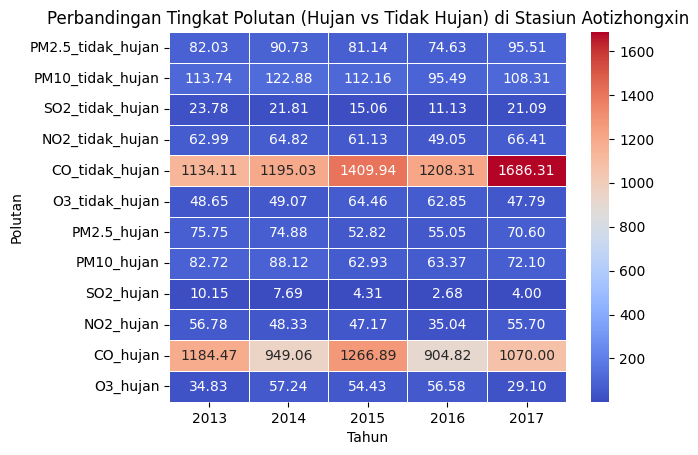

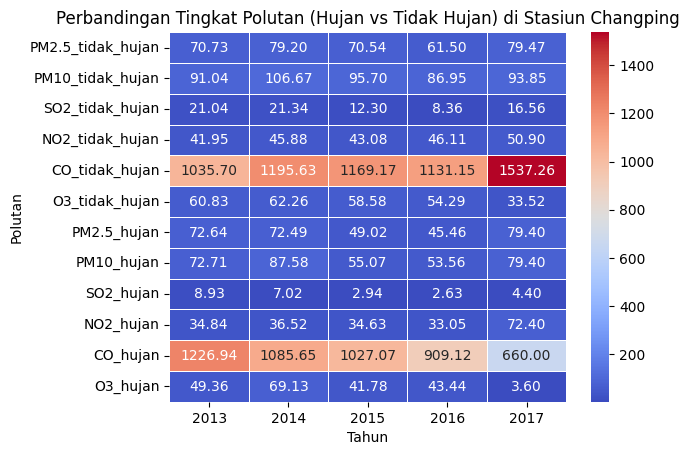

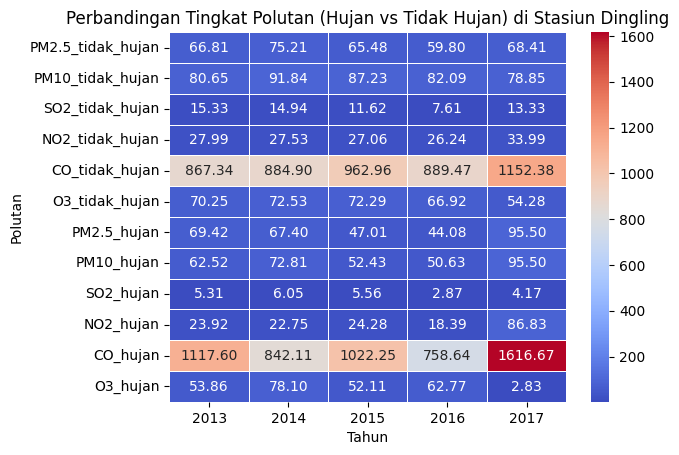

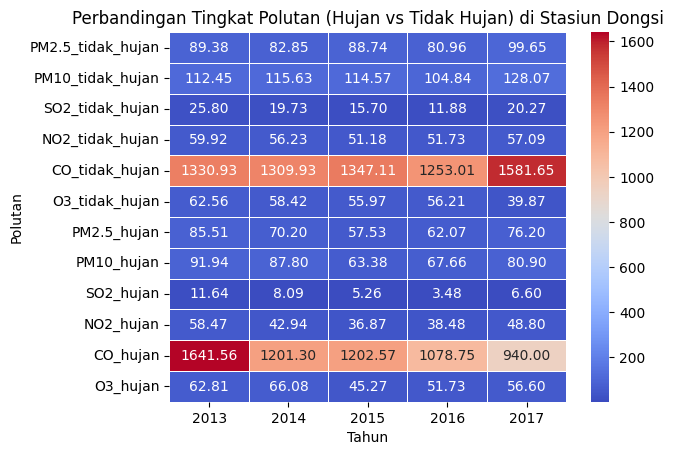

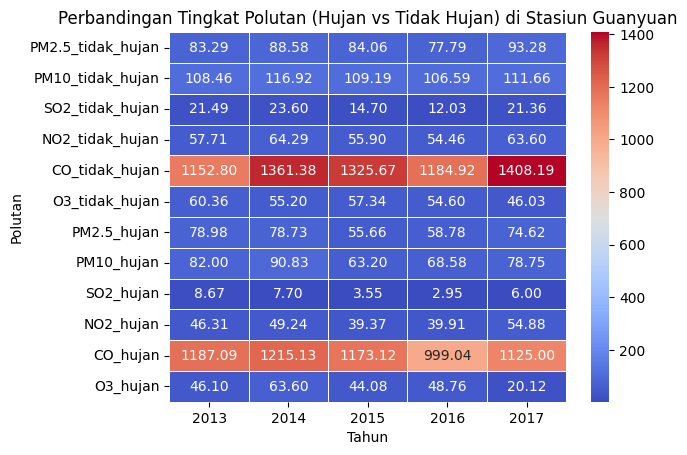

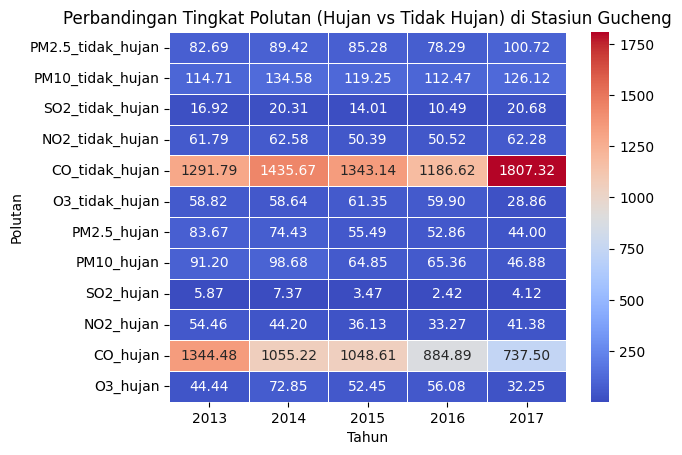

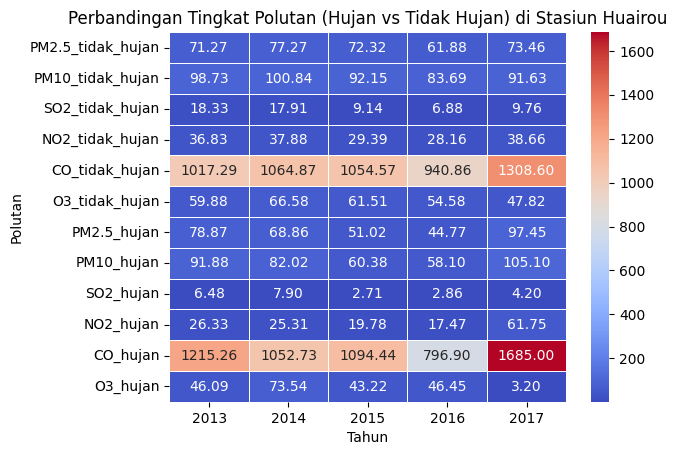

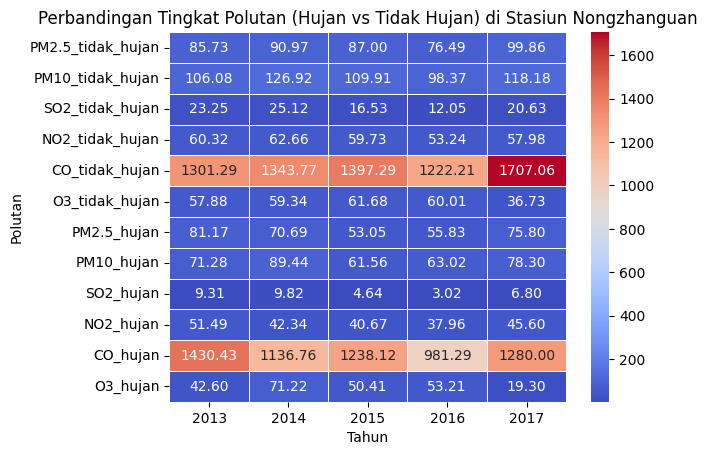

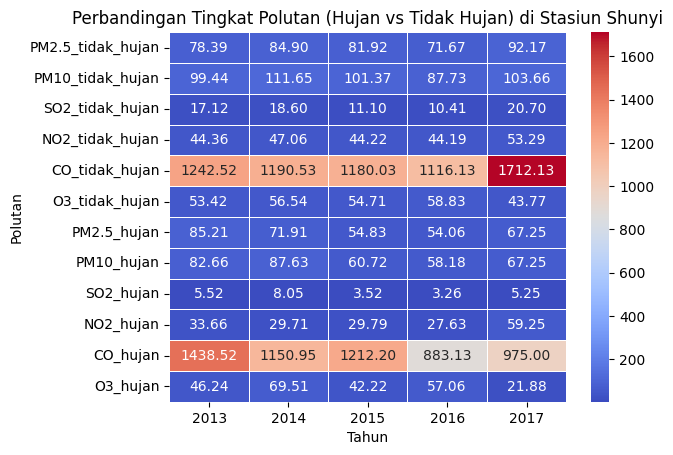

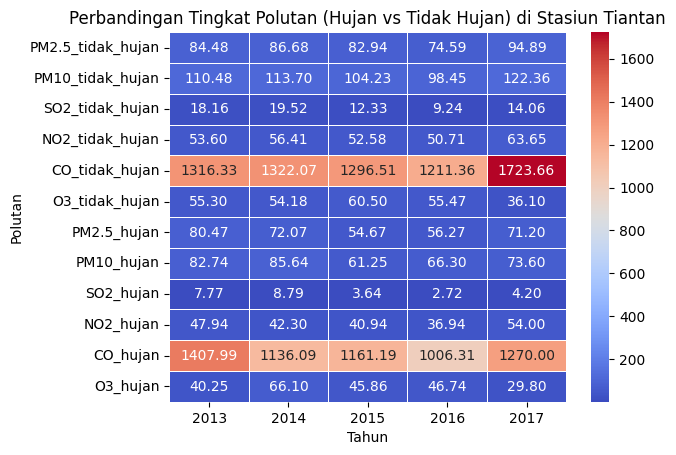

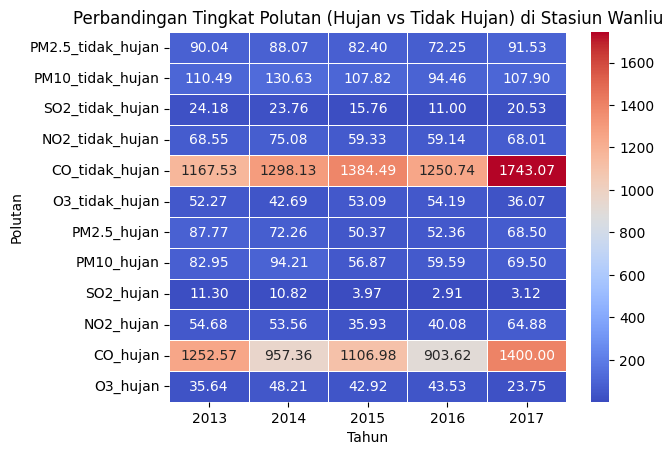

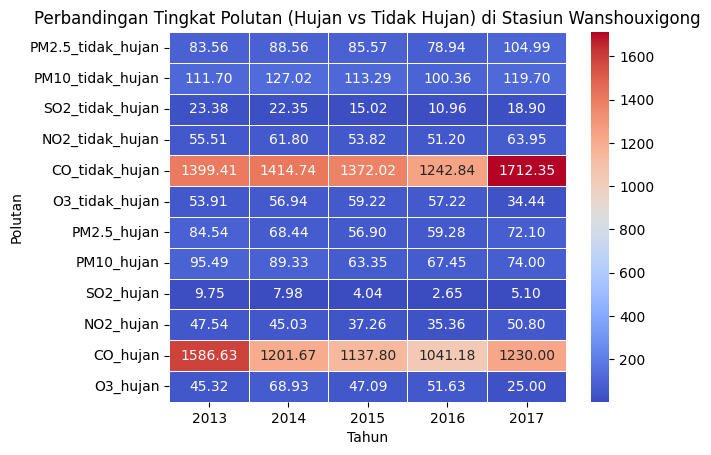

In [109]:
for station in stations:
    
    stationDataNotRainyYear = resultMeanNotRainyYear[resultMeanNotRainyYear['station'] == station]
    stationDataRainyYear = resultMeanRainyYear[resultMeanRainyYear['station'] == station]
    
    stationDataMerge = pd.merge(stationDataNotRainyYear, stationDataRainyYear, on='year', suffixes=('_tidak_hujan', '_hujan'))
    
    selectedColumns = [f'{pollutant}_{condition}' for condition in ['tidak_hujan', 'hujan'] for pollutant in pollutants]
    dataToPlot = stationDataMerge.set_index('year')[selectedColumns]

    sns.heatmap(dataToPlot.T, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
    plt.title(f'Perbandingan Tingkat Polutan (Hujan vs Tidak Hujan) di Stasiun {station}')
    plt.xlabel('Tahun')
    plt.ylabel('Polutan')
    plt.show()

Dari hasil visualisasi diatas berdasarkan data tahunan tingkat polutan pada saat hujan dan tidak hujan menunjukan bahwa hujan itu cukup mempengaruhi terhadap kualitas udara. Dapat dilihat tingkat partikel-partikel pada saat hujan turun beberapa persen dibandingkan pada saat tidak hujan. Tapi, jika dilihat dari partikel <i>CO</i> pada tahun 2013 selalu mengalami kenaikan pada saat hujan.

##### Perbandingan tingkat polutan per bulannya di setiap stasion

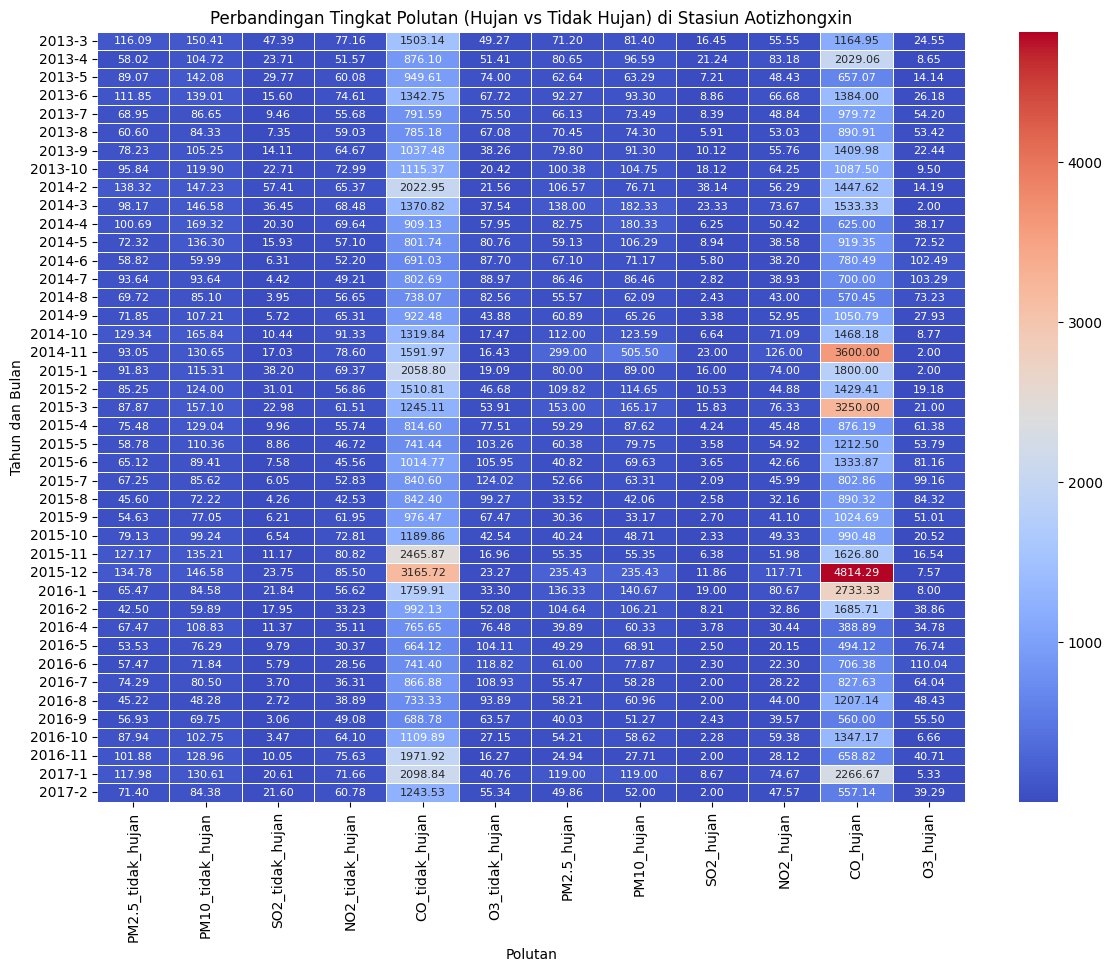

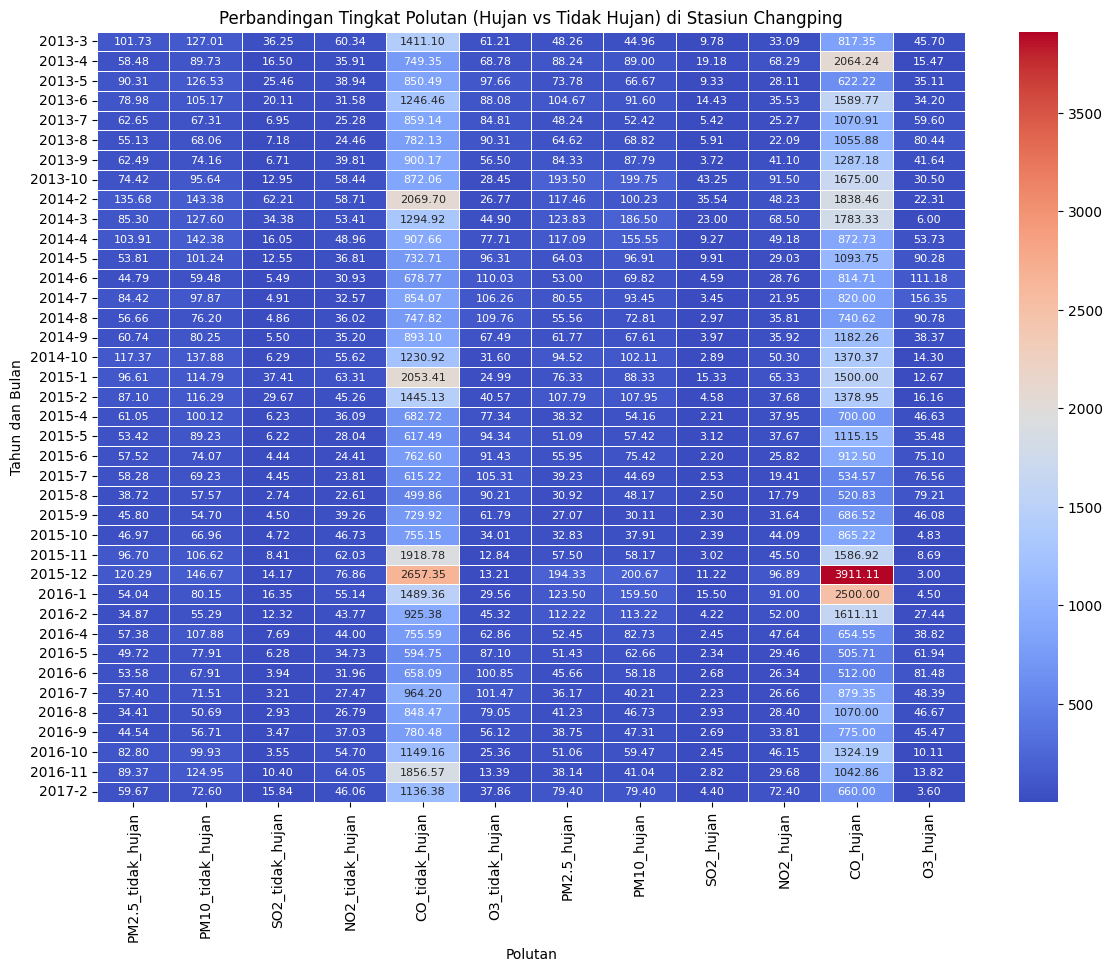

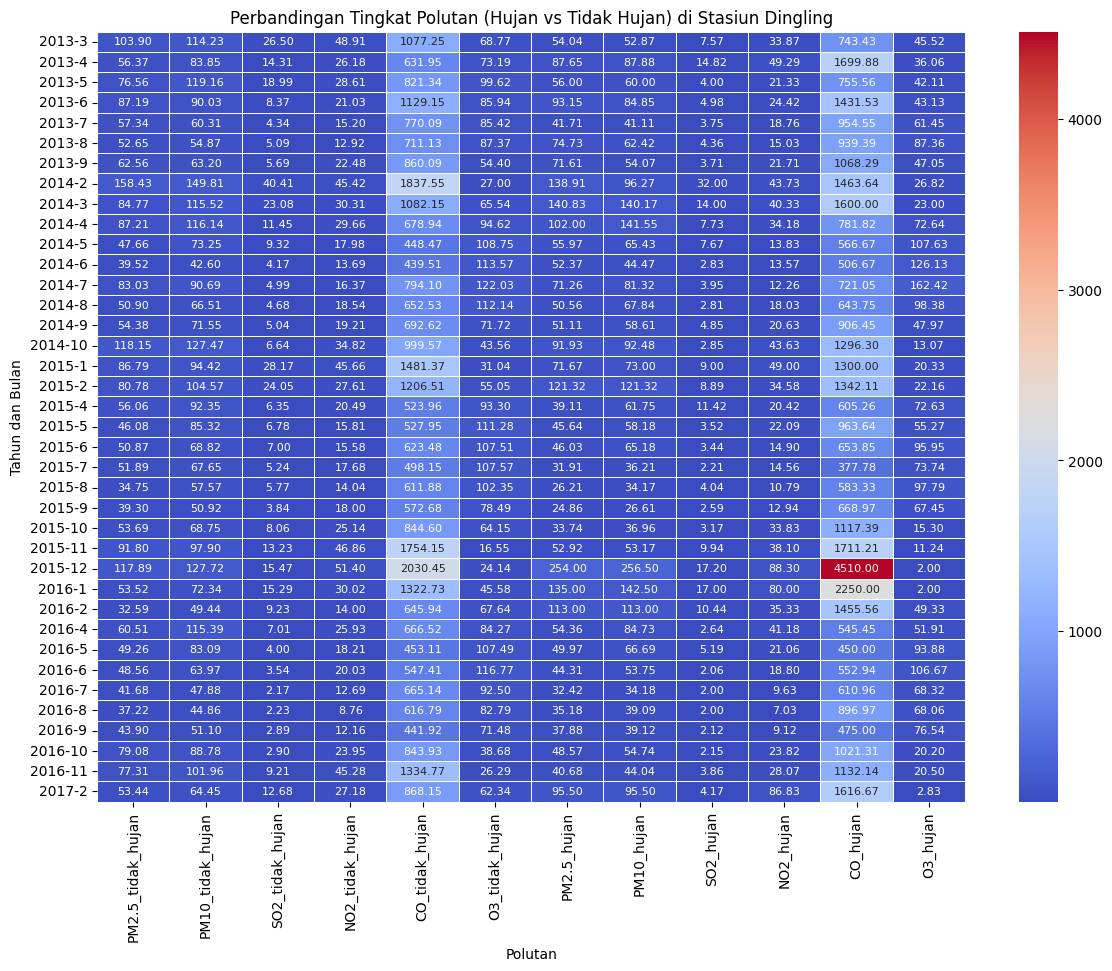

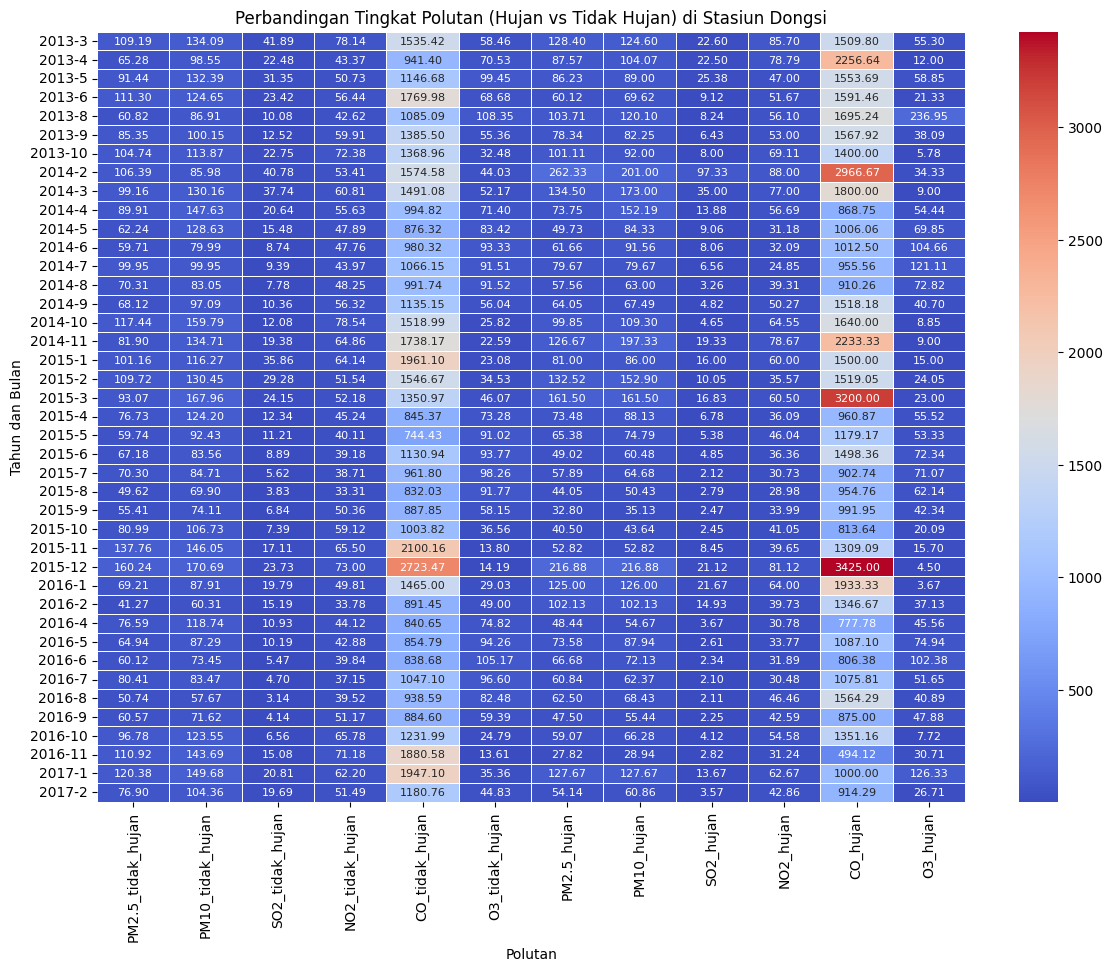

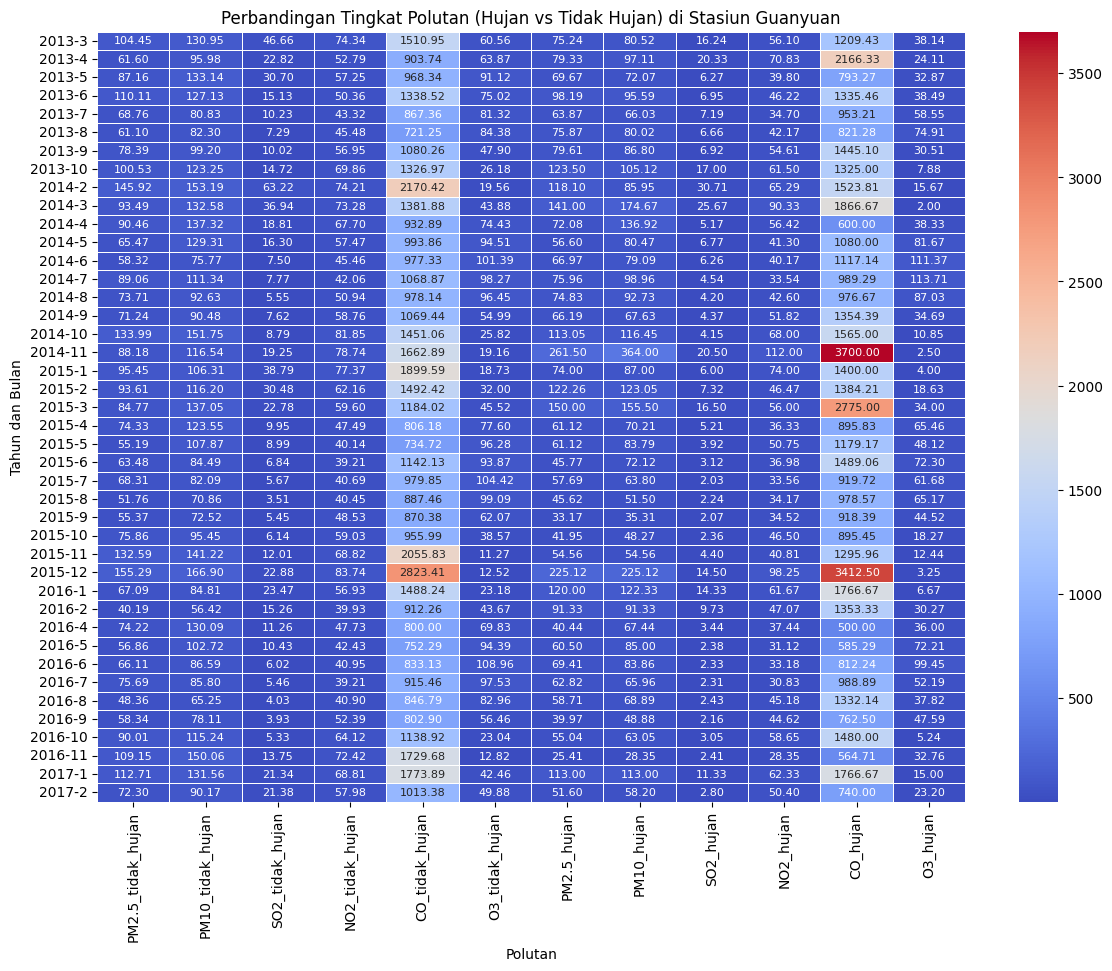

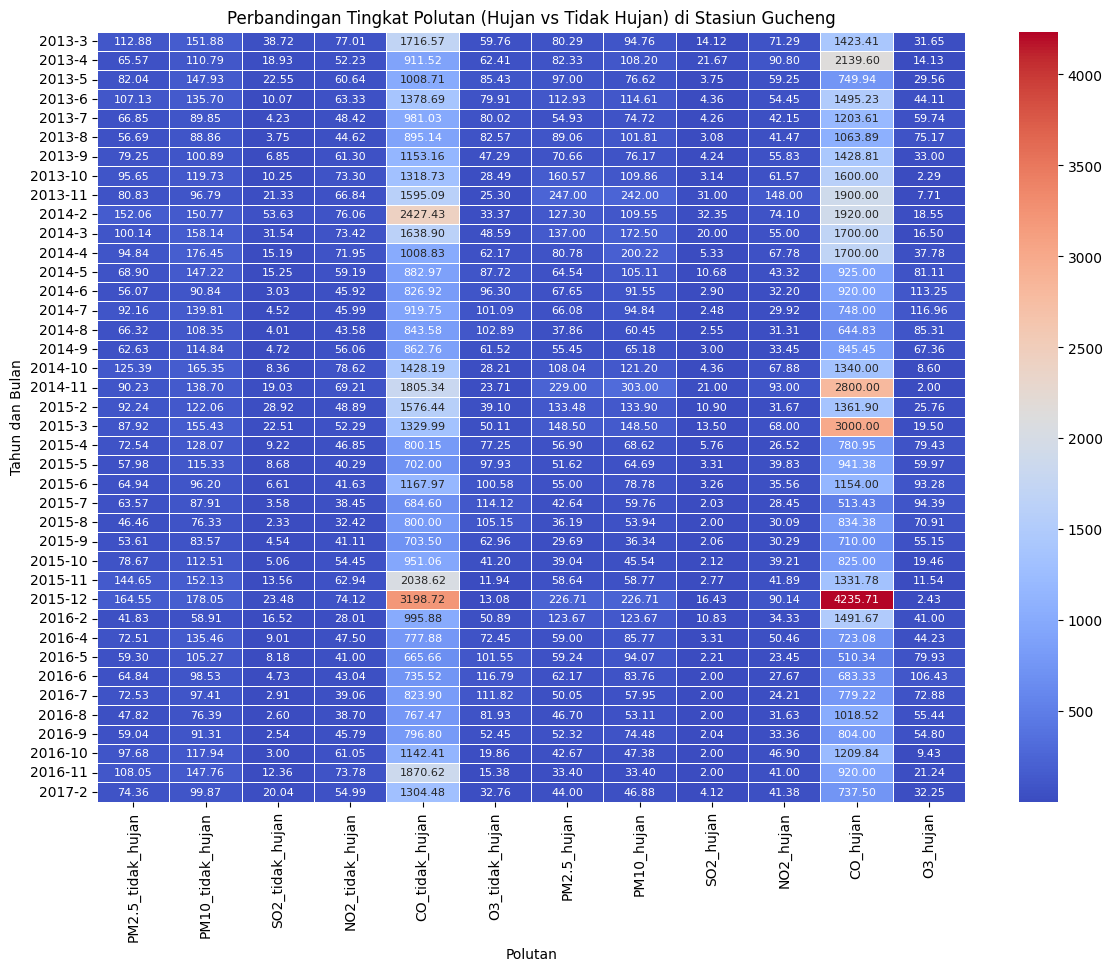

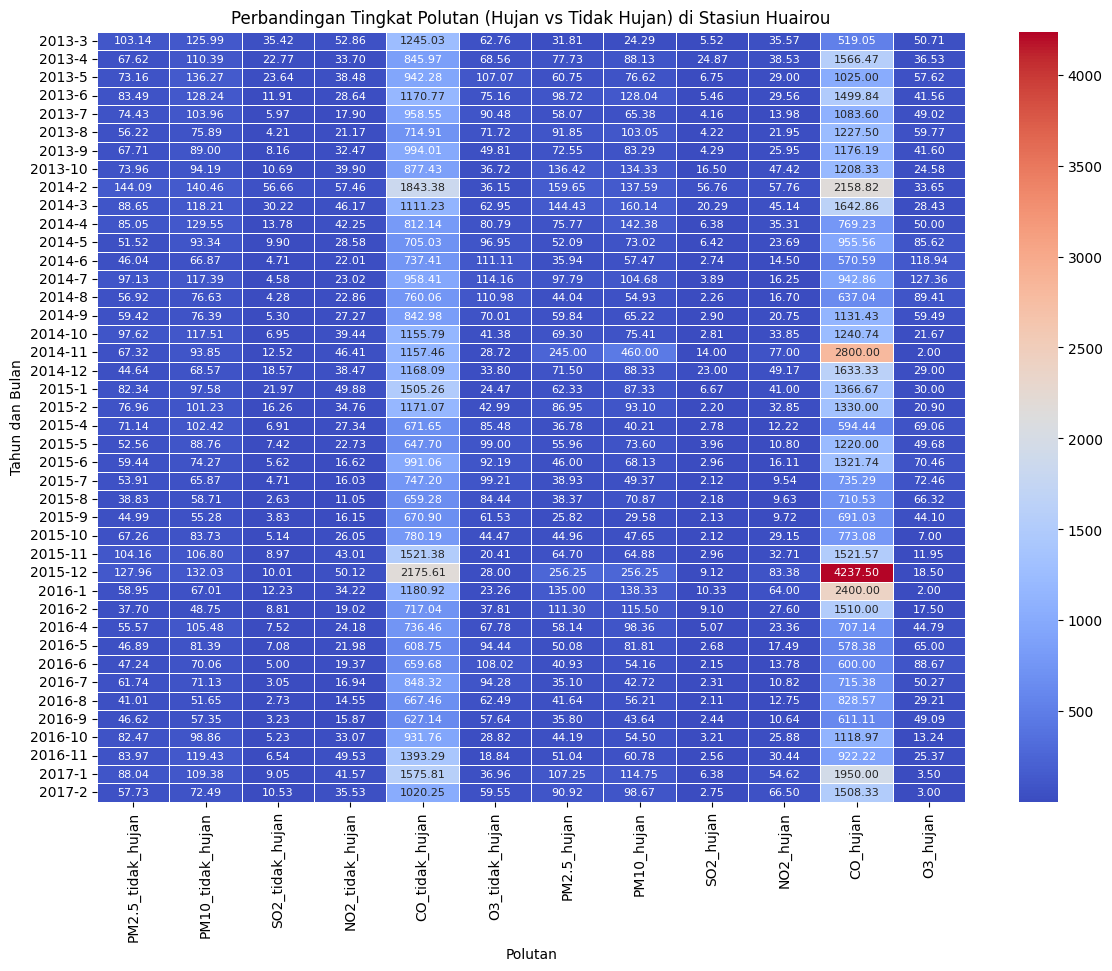

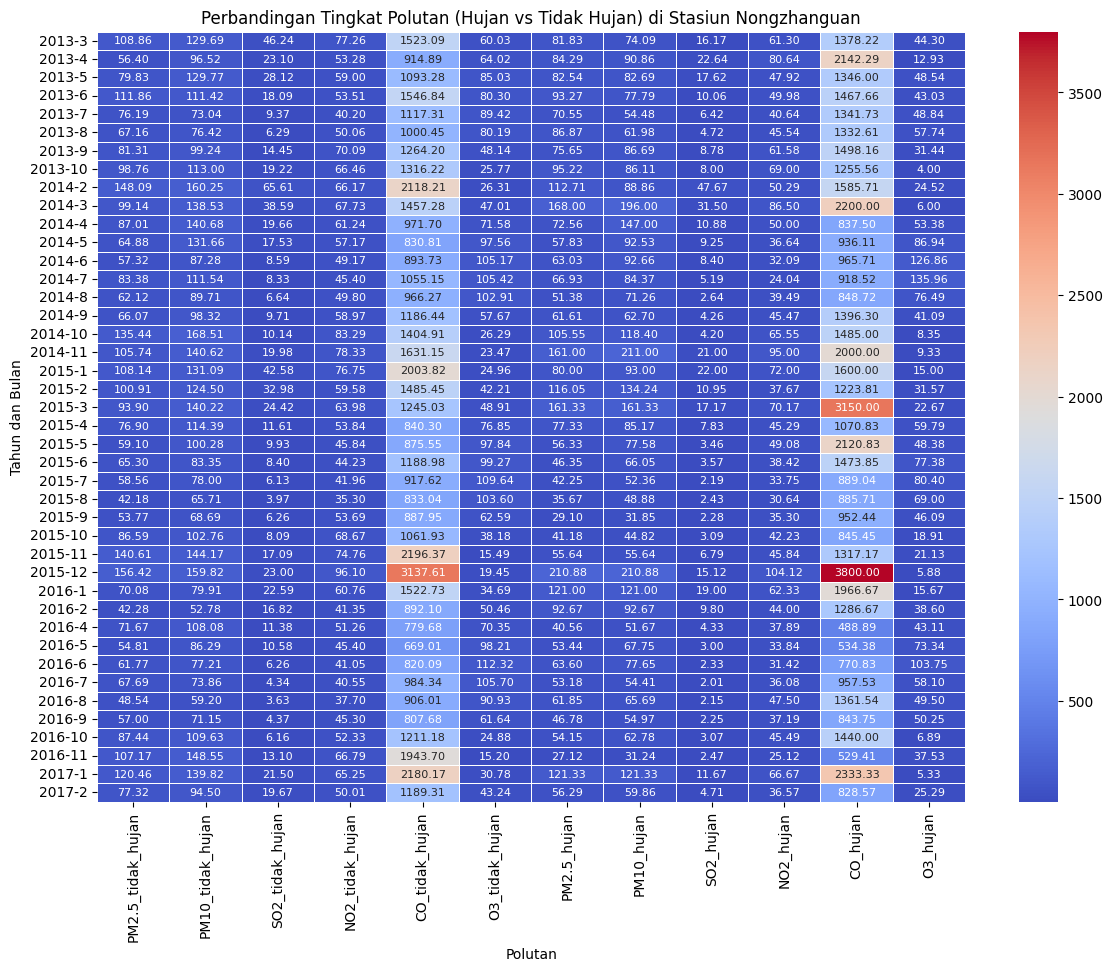

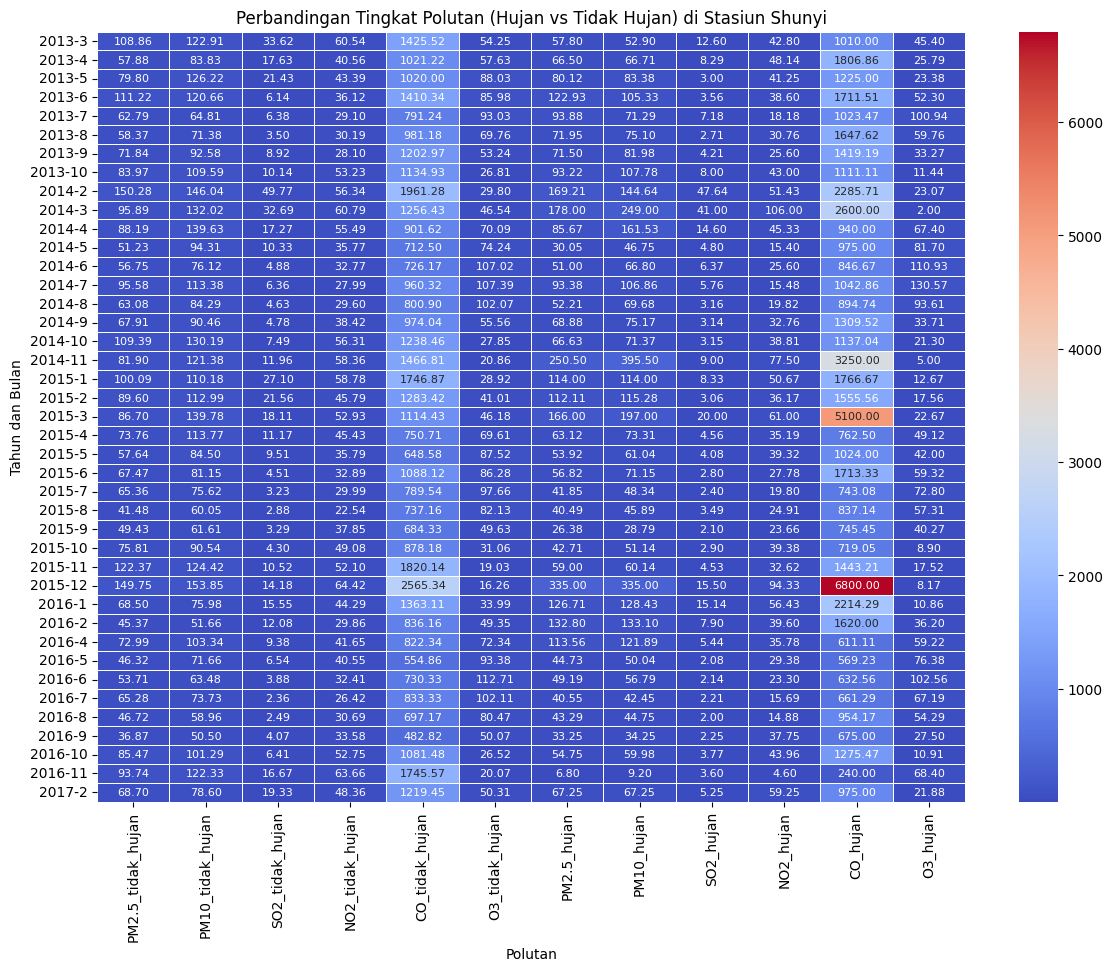

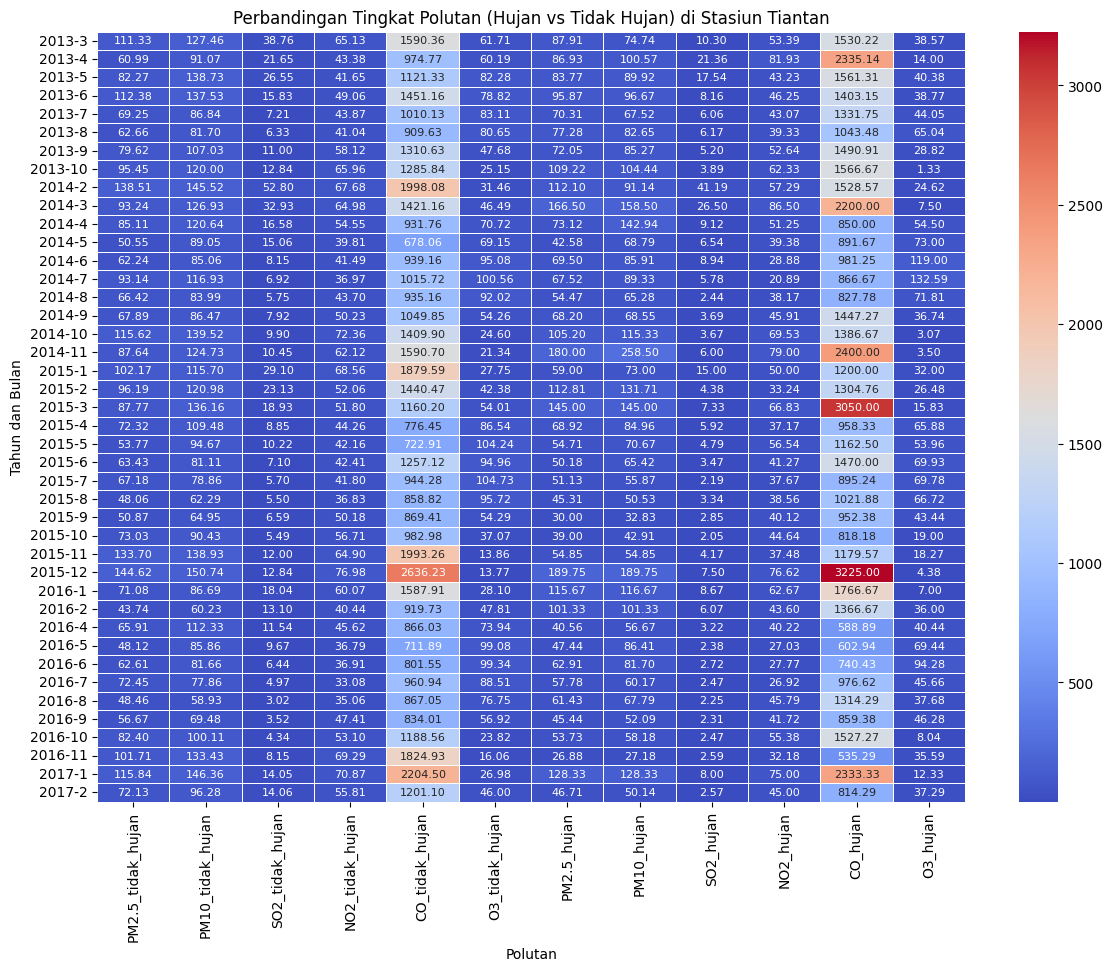

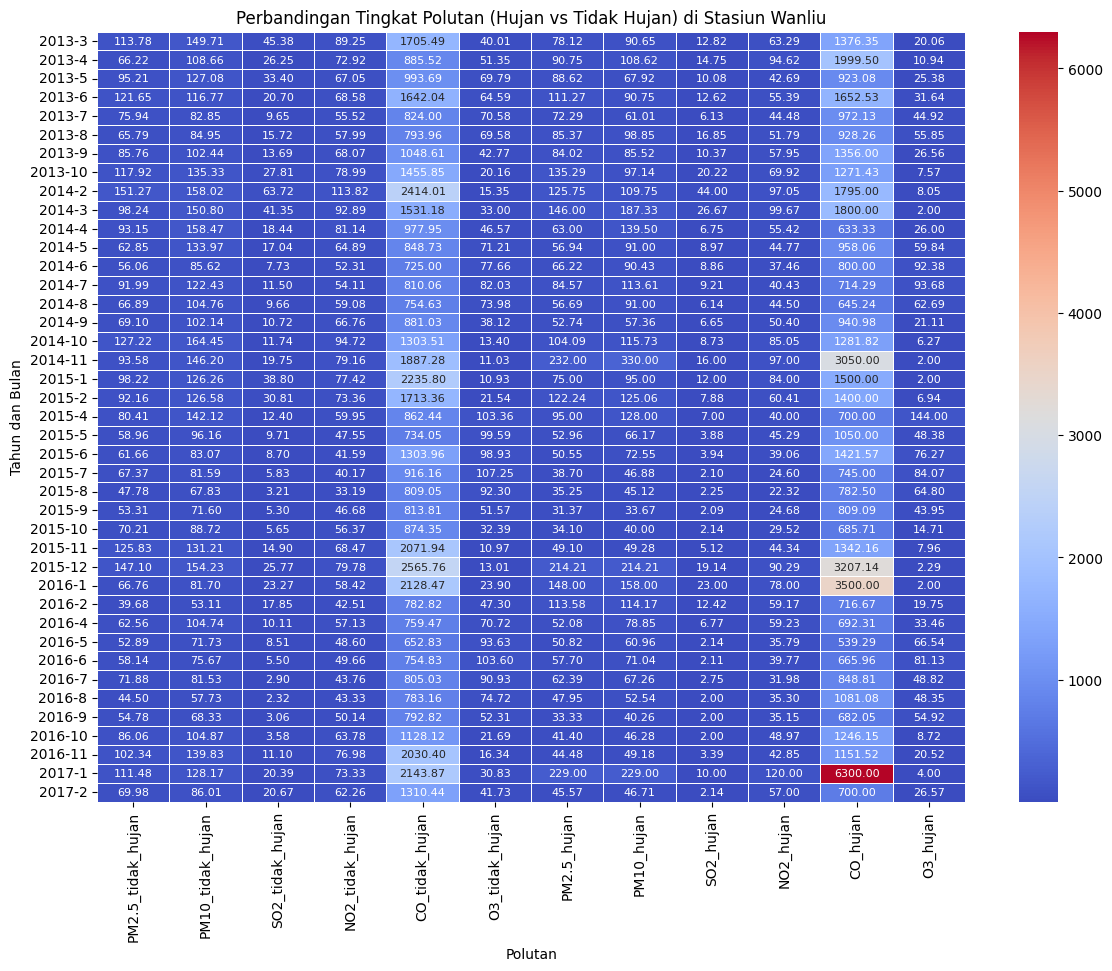

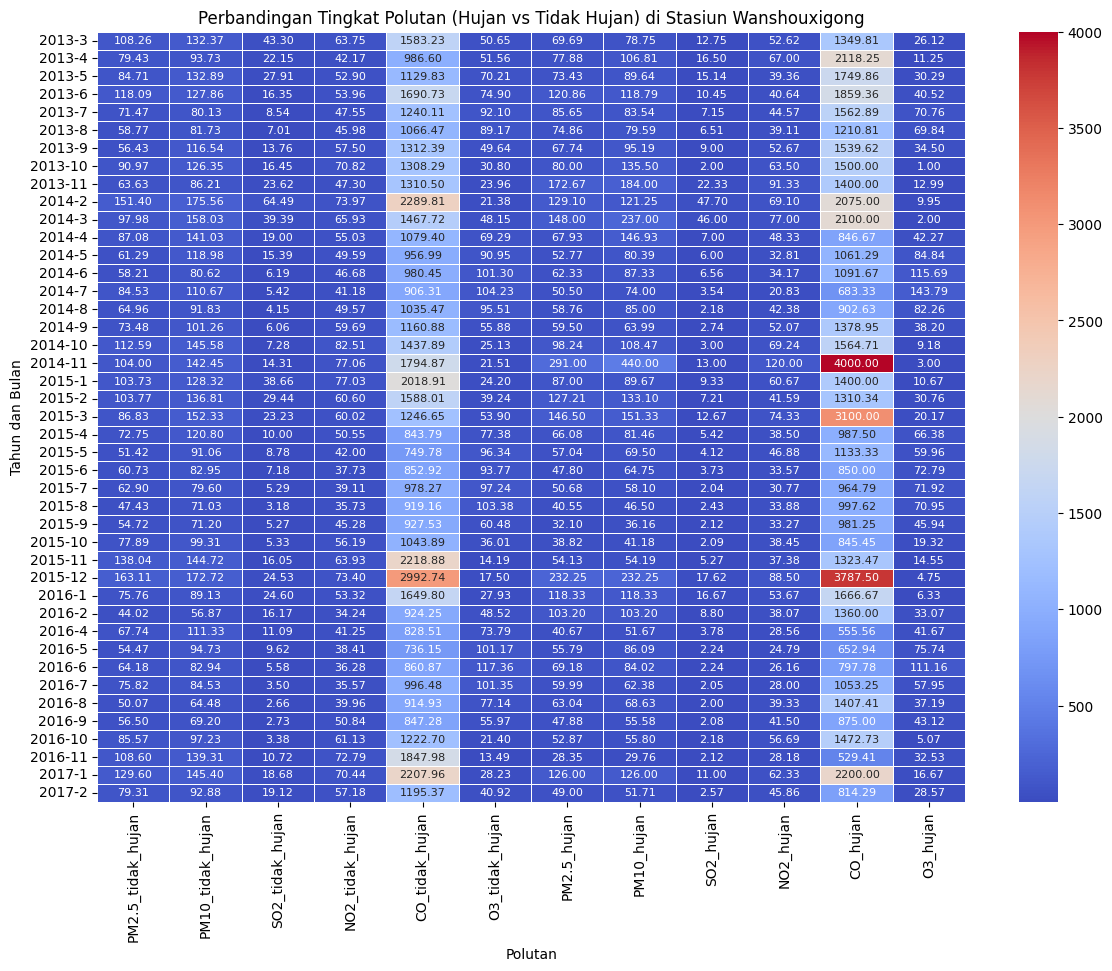

In [111]:
for station in stations:

    stationDataNotRainyMonth = resultMeanNotRainyMonth[resultMeanNotRainyMonth['station'] == station]
    stationDataRainyMonth = resultMeanRainyMonth[resultMeanRainyMonth['station'] == station]

    stationDataMerge = pd.merge(stationDataNotRainyMonth, stationDataRainyMonth, on=['year', 'month'], suffixes=('_tidak_hujan', '_hujan'))

    selectedData = [f'{pollutant}_{condition}' for condition in ['tidak_hujan', 'hujan'] for pollutant in pollutants]
    dataToPlot = stationDataMerge.set_index(['year','month'])[selectedData]

    plt.figure(figsize=(14,10))
    
    sns.heatmap(dataToPlot, cmap="coolwarm", annot=True ,fmt=".2f", linewidth=0.5, annot_kws={"fontsize":8})
    plt.title(f'Perbandingan Tingkat Polutan (Hujan vs Tidak Hujan) di Stasiun {station}')
    plt.xlabel("Polutan")
    plt.ylabel("Tahun dan Bulan")
    plt.show()


Jika dilihat dari heatmap diatas menunjukan bahwa tingkat polutan setiap bulannya tidak selalu signifikan menurun untuk beberapa jenis partikel di setiap stasionnya. Terutama pada tahun 2014 bulan ke 11 (2014-11), pada saat hujan terutama partikel <i>PM2.5, PM10, dan CO</i> mengalami lonjakan yang cukup tinggi. Mungkin untuk suatu kondisi hujan bisa saja memperburuk kondisi udara.

##### Persentase tingkat polutan setiap tahunnya pada saat hujan di station yang paling sering turun hujan (Nongzhangua)

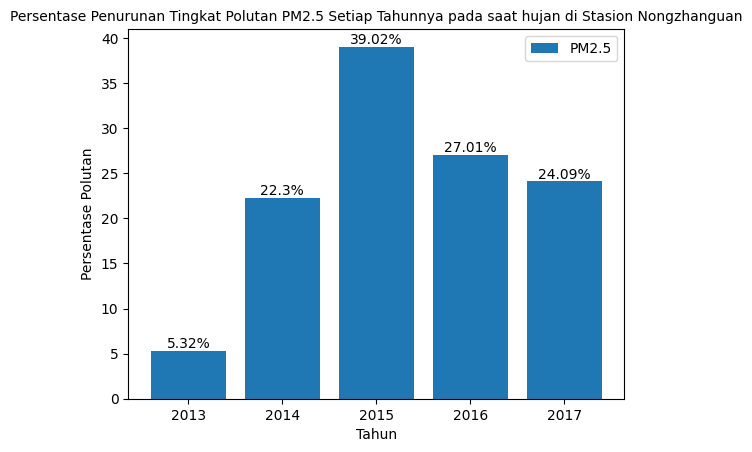

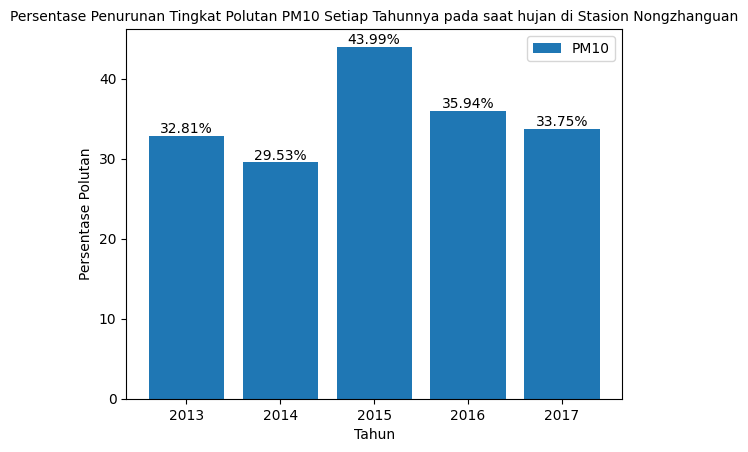

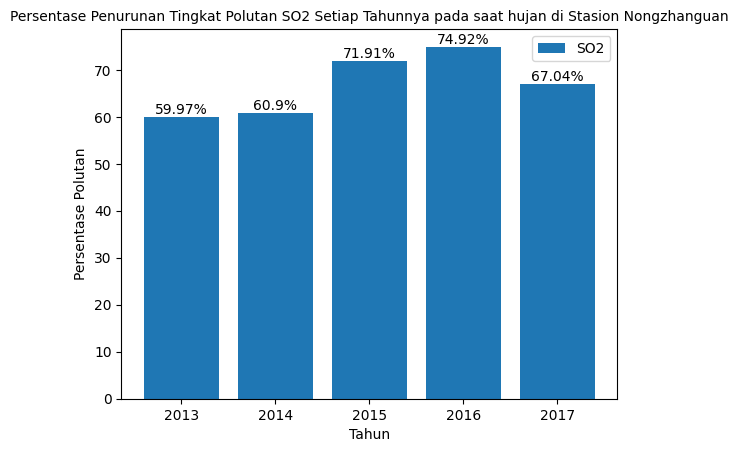

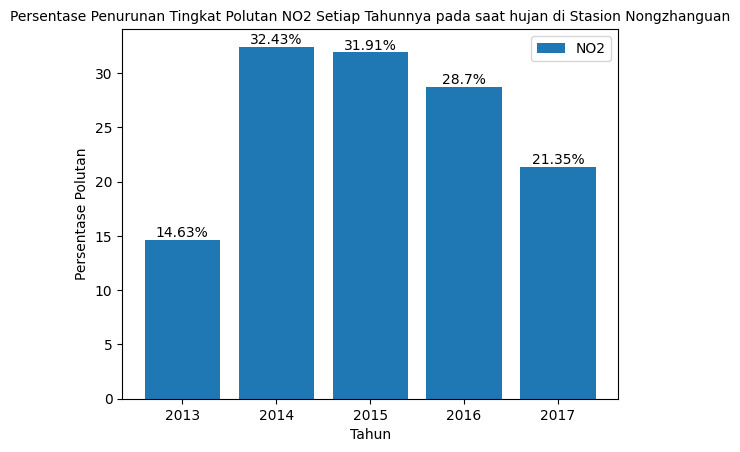

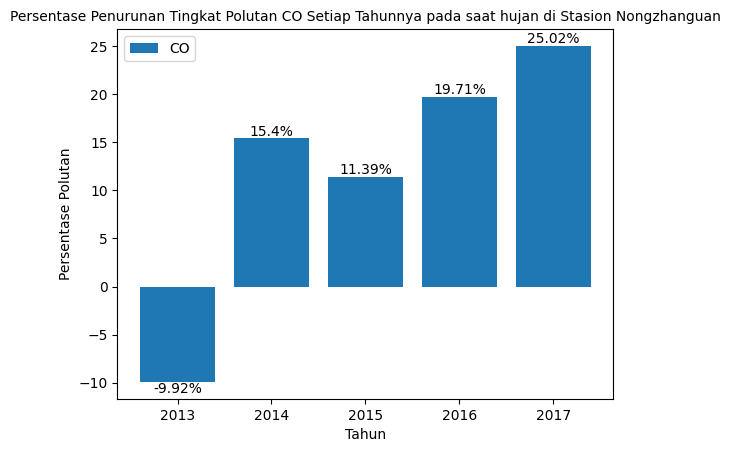

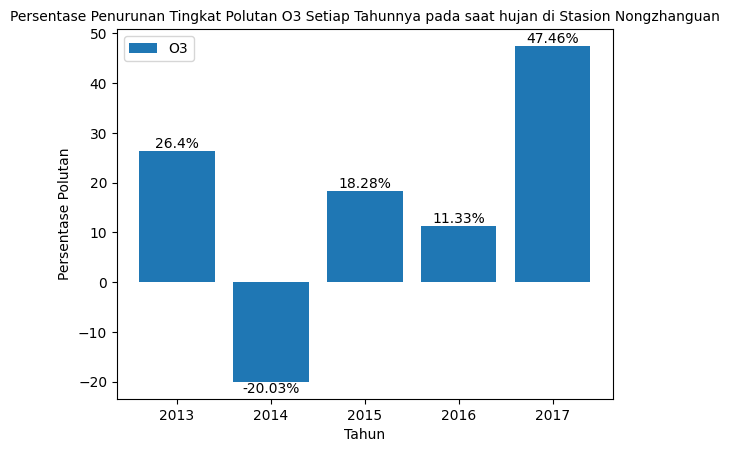

In [86]:
for pollutant in pollutants:
    
    barplot = plt.bar(years, round(reductionNongzhanguan[pollutant], 2), label=pollutant, data=reductionNongzhanguan[pollutant])
    
    plt.bar_label(barplot, labels=[f'{label}%' for label in round(reductionNongzhanguan[pollutant], 2) ], label_type="edge")
    plt.xlabel('Tahun')
    plt.ylabel('Persentase Polutan')
    plt.title(f'Persentase Penurunan Tingkat Polutan {pollutant} Setiap Tahunnya pada saat hujan di Stasion Nongzhanguan', fontdict={'fontsize':10})
    plt.legend()
    plt.show()


Dari visualisasi diatas menunjukan bahwa yang paling signifikan mengalami penurunan pada saat hujan adalah partikel <i>SO2, PM10, dan NO2</i> karena dilihat dari persentasenya yang dominan. Hujan masih cukup berpengaruh untuk 3 partikel lainnya yaitu PM2.5, CO, dan O3. Namun, tidak sesignifikan <i>SO2, PM10, dan NO2</i>. Bahkan, untuk partikel CO mengalami kenaikan di tahun 2013 dan O3 mengalami kenaikan di tahun 2014.

<b>Catatan :</b> <br>
- Persentase > 0 artinya penurunan tingkat partikel
- Persentase < 0 artinya kenaikan tingkat partikel

##### Persentase tingkat polutan setiap tahunnya pada saat hujan di station yang paling sedikit turun hujan (Shunyi)

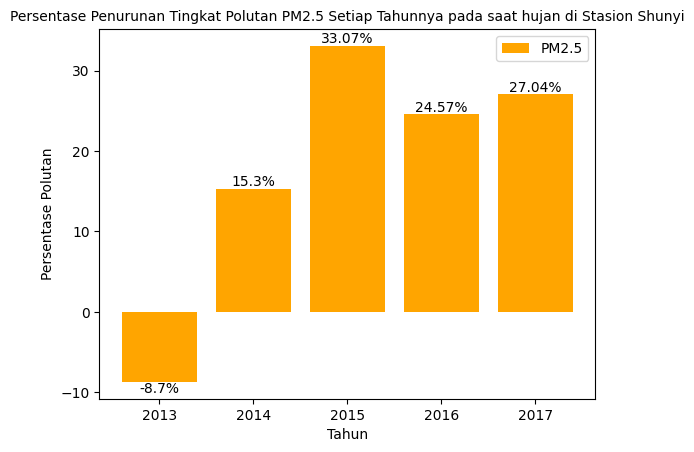

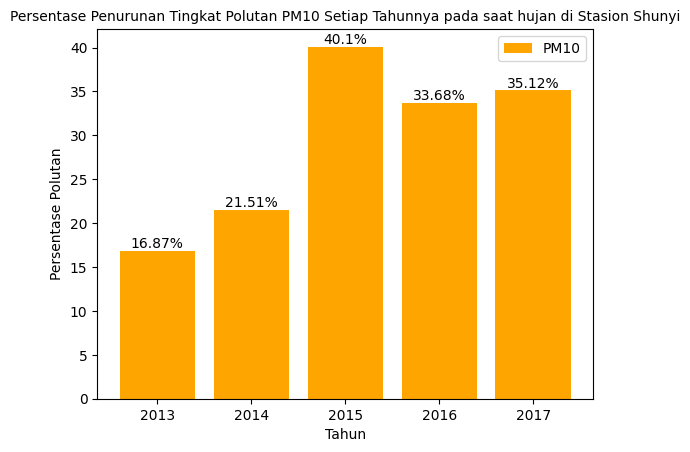

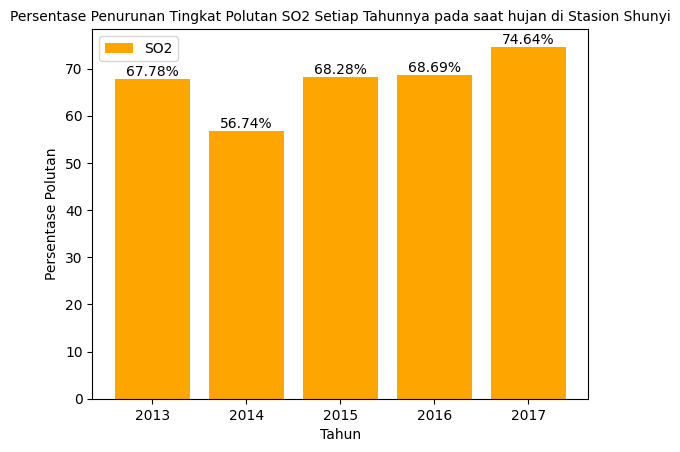

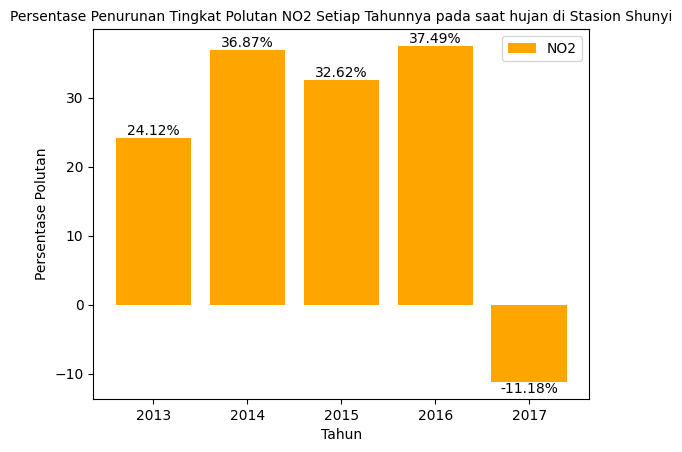

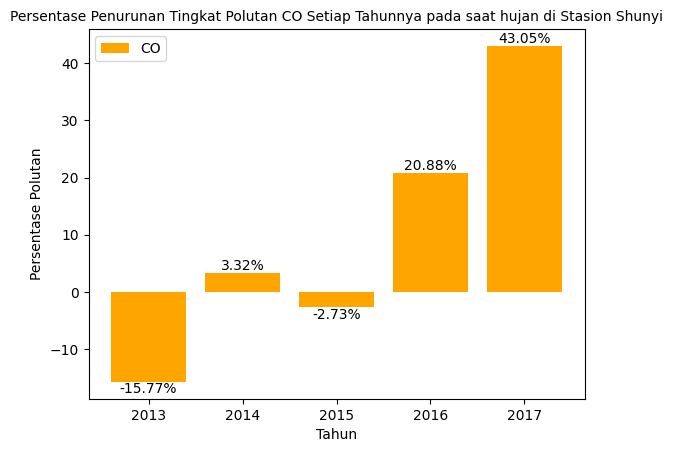

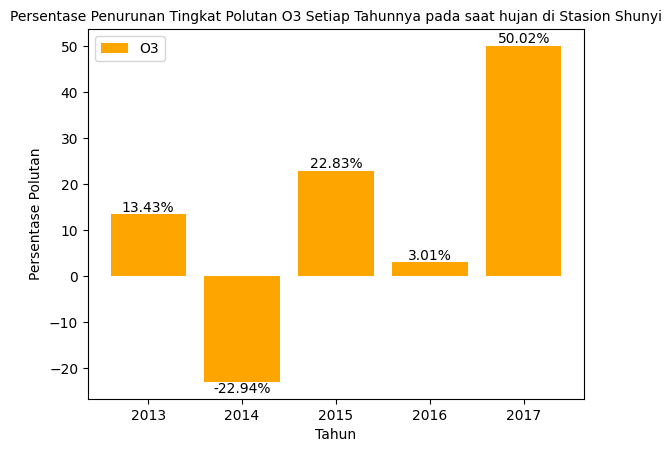

In [87]:
for pollutant in pollutants:
    
    barplot = plt.bar(years, round(reductionShunyi[pollutant], 2), label=pollutant, color='orange')
    
    plt.bar_label(barplot, labels=[f'{label}%' for label in round(reductionShunyi[pollutant], 2) ], label_type="edge")
    plt.xlabel('Tahun')
    plt.ylabel('Persentase Polutan')
    plt.title(f'Persentase Penurunan Tingkat Polutan {pollutant} Setiap Tahunnya pada saat hujan di Stasion Shunyi', fontdict={'fontsize':10})
    plt.legend()
    plt.show()

Jika dilihat dari hasil visualisasi diatas menunjukan bahwa pada station yang paling jarang turun hujan sekalipun, hujan sangat baik dalam mengurai partikel PM10 dan SO2. Hal tersebut ditunjukan dengan persentase penurunan yang sangat baik dari tahun ke tahun. Namun, untuk suatu kondisi hujan tidak dapat mengurai dengan baik seperti <i>PM2.5</i> di tahun 2013, <i>NO2</i> di tahun 2017, <i>CO</i> di tahun 2013 dan 2015, <i>O3</i> di tahun 2014.

<b>Catatan :</b> <br>
- Persentase > 0 artinya penurunan tingkat partikel
- Persentase < 0 artinya kenaikan tingkat partikel

### Pertanyaan 2:

##### Memanggil 5 Station Terburuk

In [88]:
#Memanggil 5 Station Terburuk
df_rekapstation = pd.DataFrame(rekapstation.values(), index = rekapstation.keys())
df_rekapstation = df_rekapstation.sort_values(by=0, ascending = False)
stationburuk = df_rekapstation.head(5)

##### Menampilkan Pie Chart

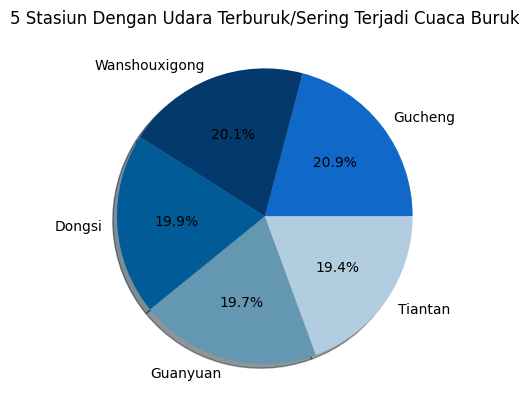

In [89]:
#Menampilkan Pie Chart

nama_station = ['Gucheng', 'Wanshouxigong', 'Dongsi', 'Guanyuan', 'Tiantan']
warna = ['#1068c9', '#03396c', '#005b96','#6497b1', '#b3cde0']
plt.title ('5 Stasiun Dengan Udara Terburuk/Sering Terjadi Cuaca Buruk')

plt.pie(
    stationburuk[0],
    labels=nama_station,
    autopct= '%1.1f%%',
    colors = warna,
    shadow = True,
    
)

plt.show()

### Pertanyaan 3:

##### Menampilkan Grouped Bar Chart

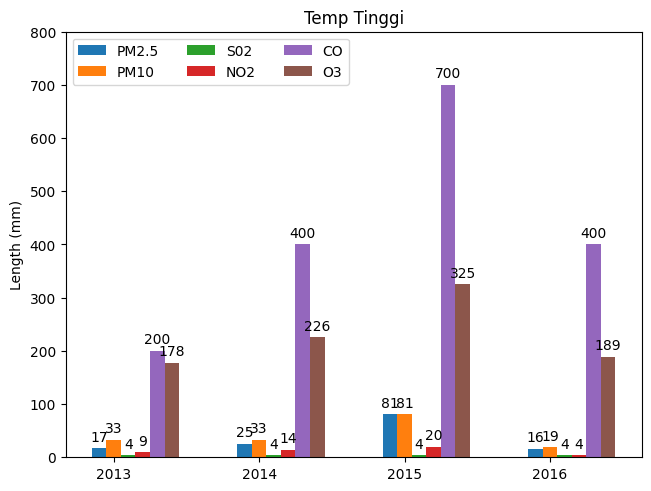

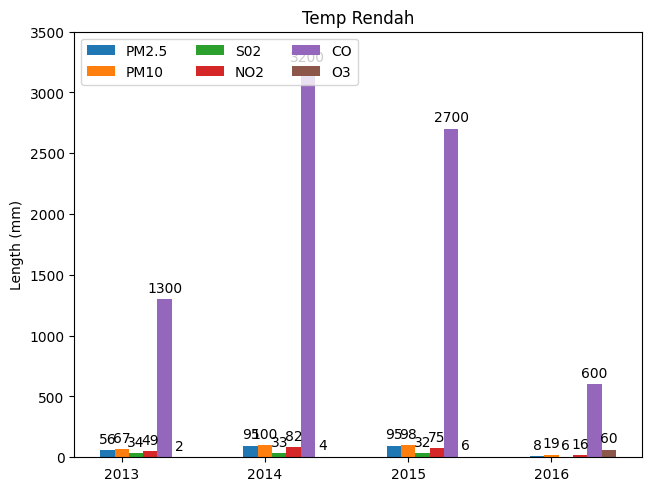

In [90]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

partikel = ("2013", "2014", "2015", '2016')
Temp_Tinggi = {
    'PM2.5': (17.0, 25.0, 81.0, 16.00),						 											
    'PM10': (33.0, 33.0, 81.0, 19.0),
    'S02': (4.0, 4.0, 4.0, 4.0),
    'NO2': (9.0, 14.0, 20.0, 4.0),
    'CO' : (200.0, 400.0, 700.0, 400.0),
    'O3' : (178.0, 226.0, 325.0, 189.0)
}

x = np.arange(len(partikel))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in Temp_Tinggi.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Temp Tinggi')
ax.set_xticks(x + width, partikel)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 800)

plt.show()


# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

partikel = ("2013", "2014", "2015", '2016')
Temp_Rendah = {
    'PM2.5': (56.0, 95.0, 95.0, 8.0),						 											
    'PM10': (67.0, 100.0, 98.0, 19.0),
    'S02': (34.0, 33.0, 32.0, 6.0),
    'NO2': (49.0, 82.0, 75.0, 16.0),
    'CO' : (1300.0, 3200.0, 2700.0, 600.0),
    'O3' : (2.0, 4.0, 6.0, 60.0)
}

x = np.arange(len(partikel))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in Temp_Rendah.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Temp Rendah')
ax.set_xticks(x + width, partikel)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 3500)

plt.show()

### Pertanyaan 4:

##### Perbandingan tingkat polutan per tahunnya di setiap station

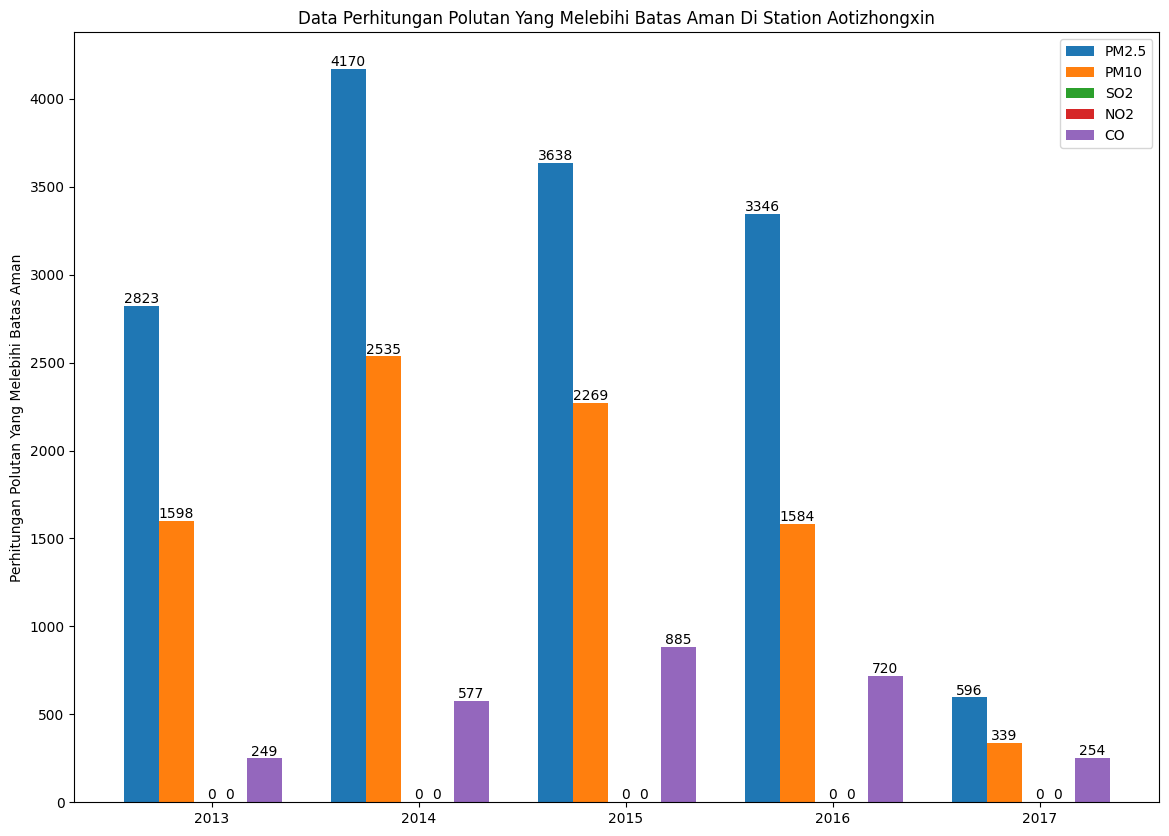

Terlihat pada Grouped Bar Chart diatas bahwa partikel udara yang paling sering mempengaruhi di station Aotizhongxin adalah partikel PM2.5.
Yaitu: 
- Pada tahun 2013 sebanyak 2823 kali melebihi ambang batas
- Pada tahun 2014 sebanyak 4170 kali melebihi ambang batas
- Pada tahun 2015 sebanyak 3638 kali melebihi ambang batas
- Pada tahun 2016 sebanyak 3346 kali melebihi ambang batas
- Pada tahun 2017 sebanyak 596 kali melebihi ambang batas


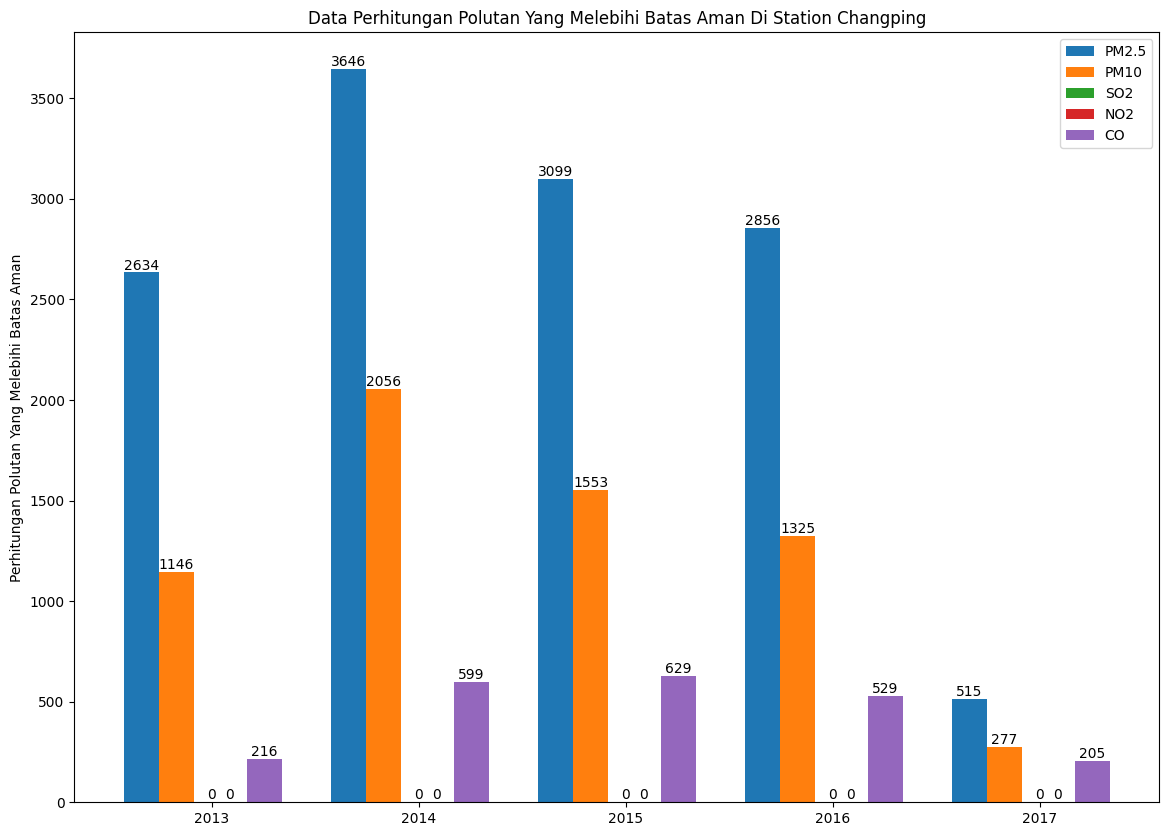

Terlihat pada Grouped Bar Chart diatas bahwa partikel udara yang paling sering mempengaruhi di station Changping adalah partikel PM2.5.
Yaitu: 
- Pada tahun 2013 sebanyak 2634 kali melebihi ambang batas
- Pada tahun 2014 sebanyak 3646 kali melebihi ambang batas
- Pada tahun 2015 sebanyak 3099 kali melebihi ambang batas
- Pada tahun 2016 sebanyak 2856 kali melebihi ambang batas
- Pada tahun 2017 sebanyak 515 kali melebihi ambang batas


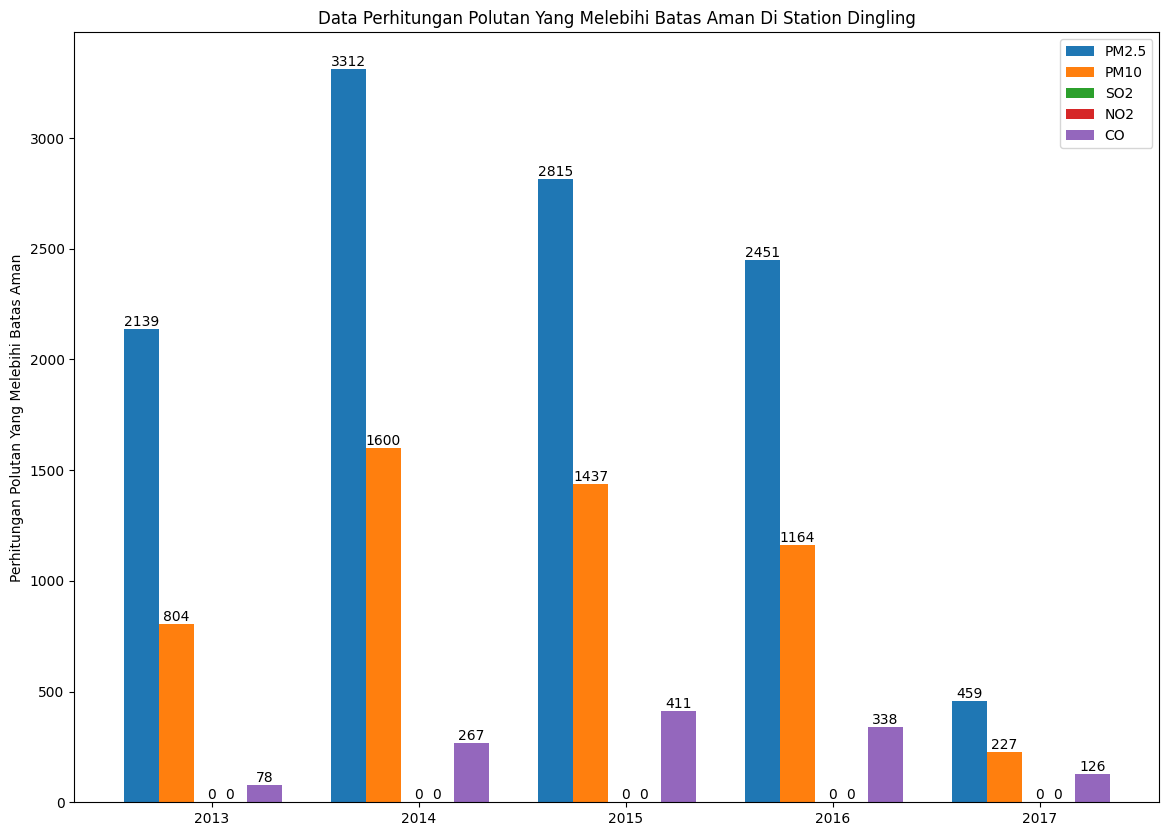

Terlihat pada Grouped Bar Chart diatas bahwa partikel udara yang paling sering mempengaruhi di station Dingling adalah partikel PM2.5.
Yaitu: 
- Pada tahun 2013 sebanyak 2139 kali melebihi ambang batas
- Pada tahun 2014 sebanyak 3312 kali melebihi ambang batas
- Pada tahun 2015 sebanyak 2815 kali melebihi ambang batas
- Pada tahun 2016 sebanyak 2451 kali melebihi ambang batas
- Pada tahun 2017 sebanyak 459 kali melebihi ambang batas


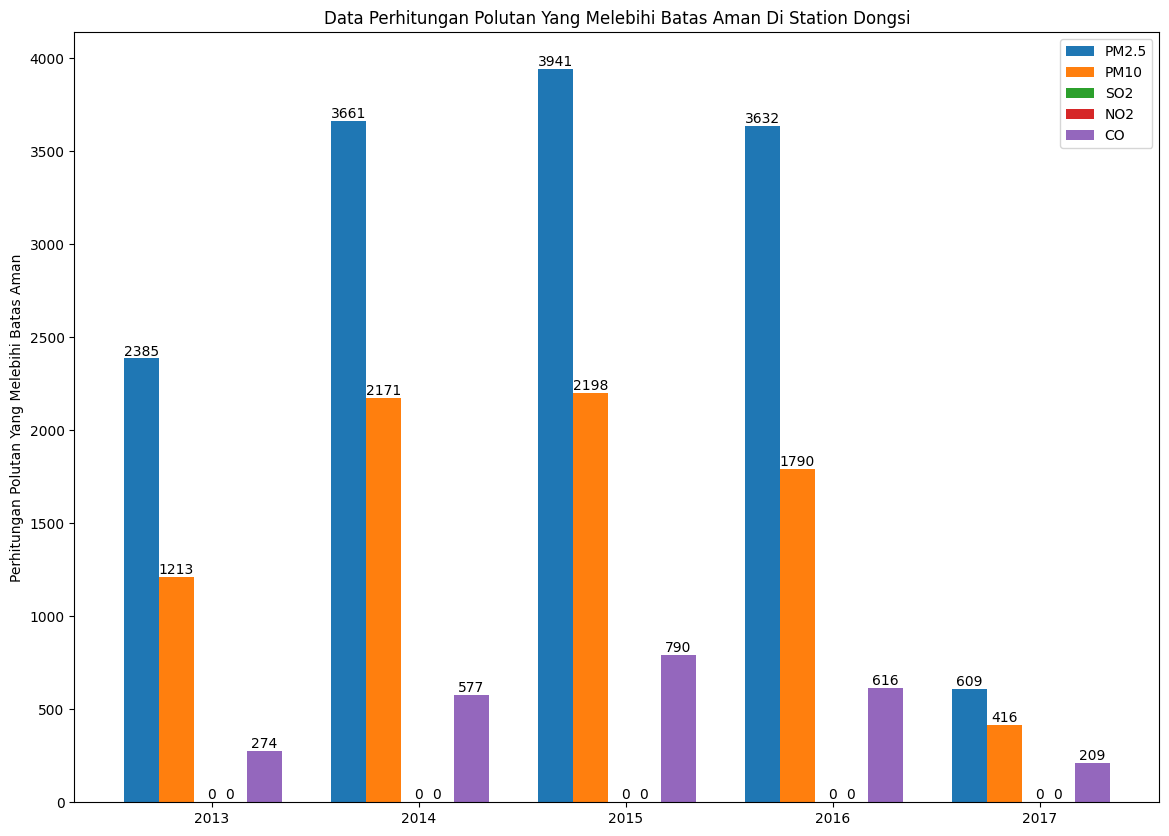

Terlihat pada Grouped Bar Chart diatas bahwa partikel udara yang paling sering mempengaruhi di station Dongsi adalah partikel PM2.5.
Yaitu: 
- Pada tahun 2013 sebanyak 2385 kali melebihi ambang batas
- Pada tahun 2014 sebanyak 3661 kali melebihi ambang batas
- Pada tahun 2015 sebanyak 3941 kali melebihi ambang batas
- Pada tahun 2016 sebanyak 3632 kali melebihi ambang batas
- Pada tahun 2017 sebanyak 609 kali melebihi ambang batas


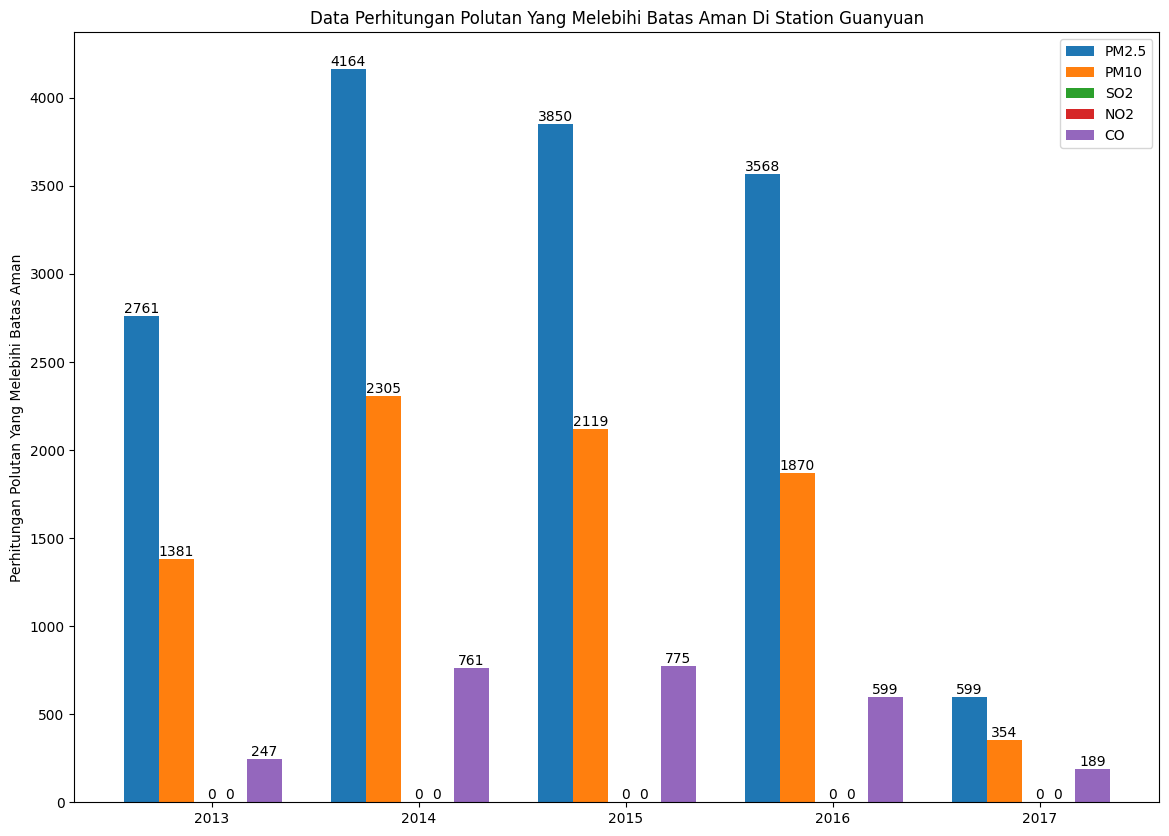

Terlihat pada Grouped Bar Chart diatas bahwa partikel udara yang paling sering mempengaruhi di station Guanyuan adalah partikel PM2.5.
Yaitu: 
- Pada tahun 2013 sebanyak 2761 kali melebihi ambang batas
- Pada tahun 2014 sebanyak 4164 kali melebihi ambang batas
- Pada tahun 2015 sebanyak 3850 kali melebihi ambang batas
- Pada tahun 2016 sebanyak 3568 kali melebihi ambang batas
- Pada tahun 2017 sebanyak 599 kali melebihi ambang batas


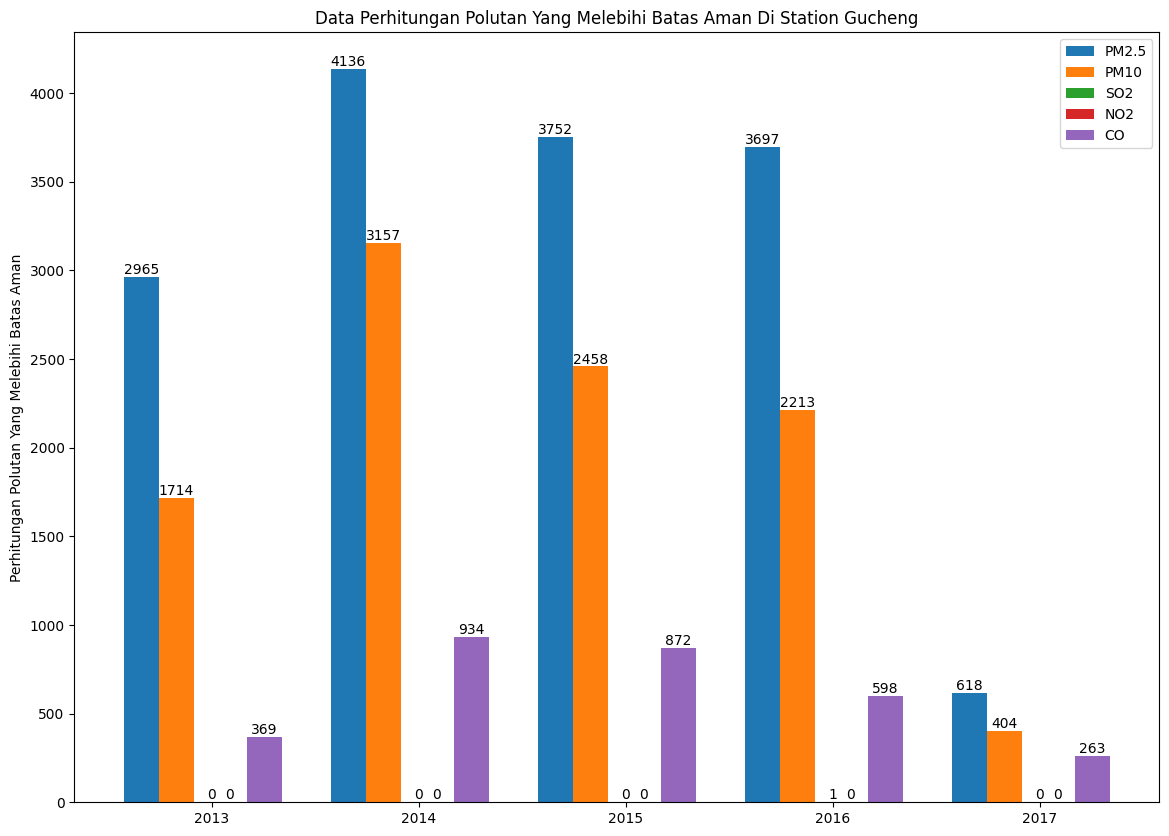

Terlihat pada Grouped Bar Chart diatas bahwa partikel udara yang paling sering mempengaruhi di station Gucheng adalah partikel PM2.5.
Yaitu: 
- Pada tahun 2013 sebanyak 2965 kali melebihi ambang batas
- Pada tahun 2014 sebanyak 4136 kali melebihi ambang batas
- Pada tahun 2015 sebanyak 3752 kali melebihi ambang batas
- Pada tahun 2016 sebanyak 3697 kali melebihi ambang batas
- Pada tahun 2017 sebanyak 618 kali melebihi ambang batas


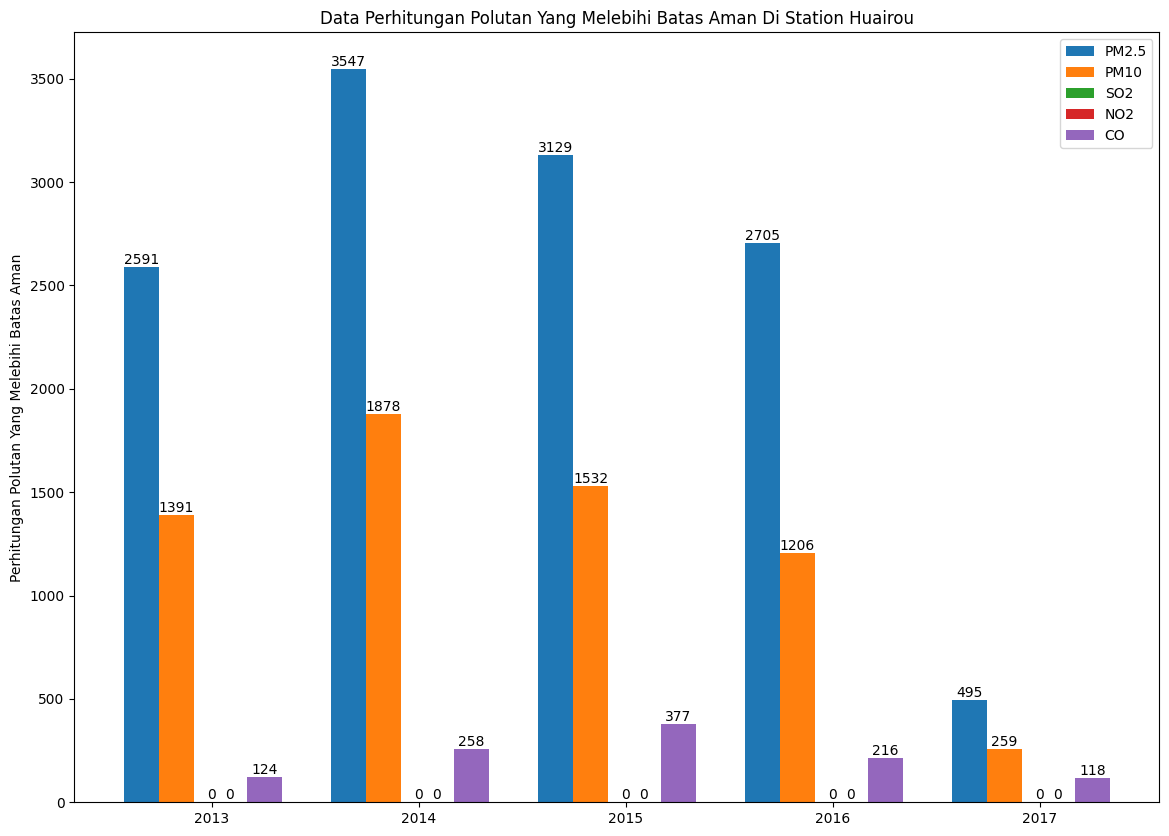

Terlihat pada Grouped Bar Chart diatas bahwa partikel udara yang paling sering mempengaruhi di station Huairou adalah partikel PM2.5.
Yaitu: 
- Pada tahun 2013 sebanyak 2591 kali melebihi ambang batas
- Pada tahun 2014 sebanyak 3547 kali melebihi ambang batas
- Pada tahun 2015 sebanyak 3129 kali melebihi ambang batas
- Pada tahun 2016 sebanyak 2705 kali melebihi ambang batas
- Pada tahun 2017 sebanyak 495 kali melebihi ambang batas


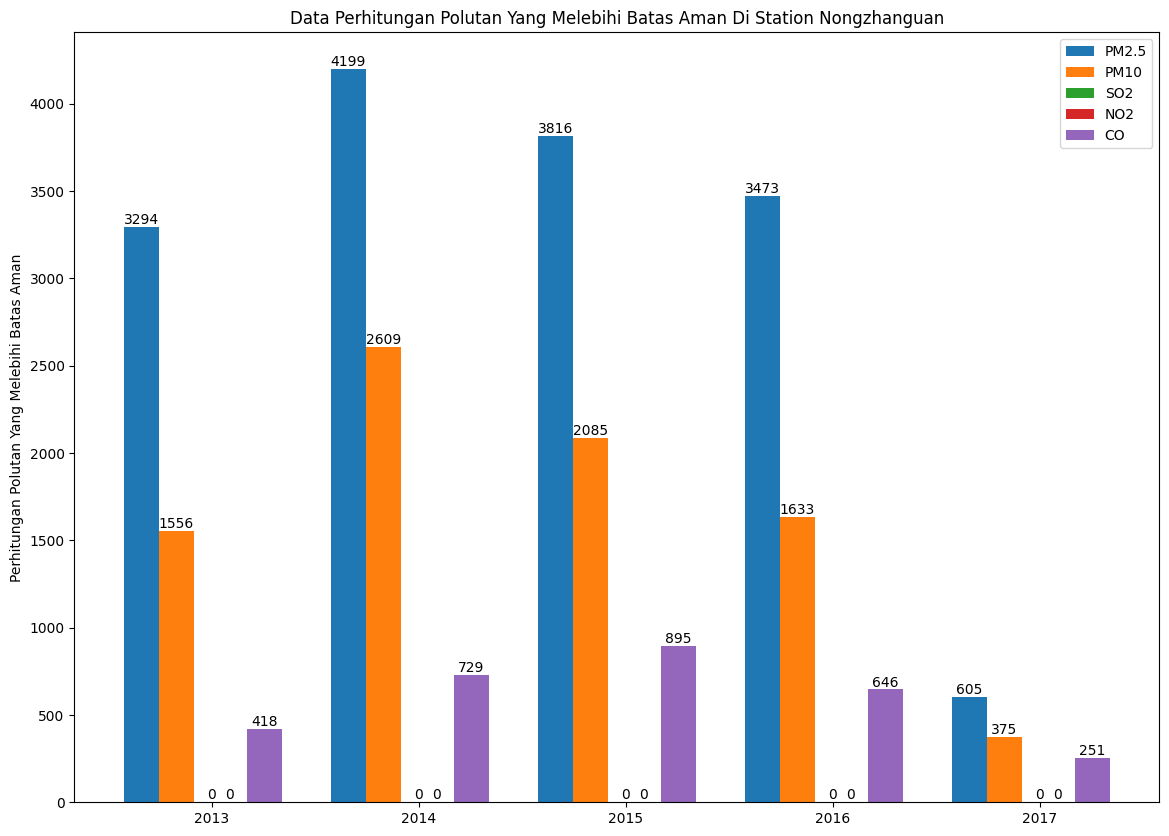

Terlihat pada Grouped Bar Chart diatas bahwa partikel udara yang paling sering mempengaruhi di station Nongzhanguan adalah partikel PM2.5.
Yaitu: 
- Pada tahun 2013 sebanyak 3294 kali melebihi ambang batas
- Pada tahun 2014 sebanyak 4199 kali melebihi ambang batas
- Pada tahun 2015 sebanyak 3816 kali melebihi ambang batas
- Pada tahun 2016 sebanyak 3473 kali melebihi ambang batas
- Pada tahun 2017 sebanyak 605 kali melebihi ambang batas


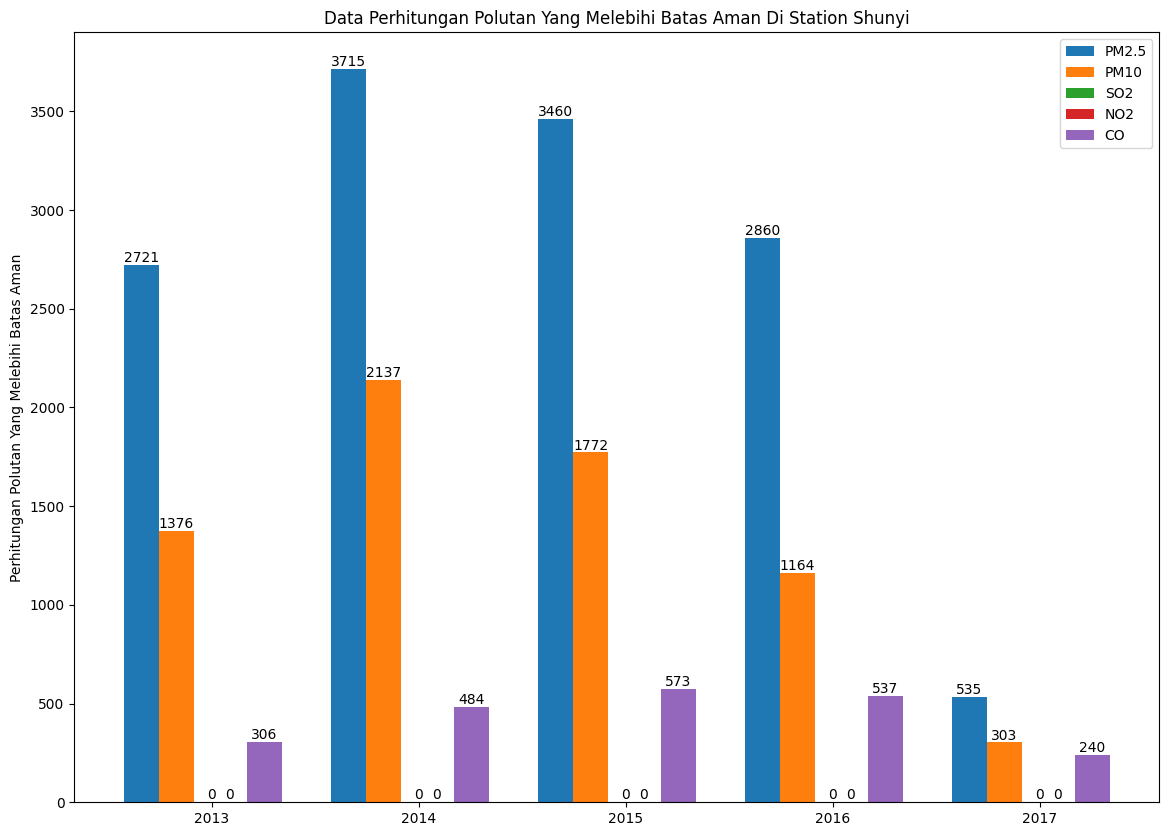

Terlihat pada Grouped Bar Chart diatas bahwa partikel udara yang paling sering mempengaruhi di station Shunyi adalah partikel PM2.5.
Yaitu: 
- Pada tahun 2013 sebanyak 2721 kali melebihi ambang batas
- Pada tahun 2014 sebanyak 3715 kali melebihi ambang batas
- Pada tahun 2015 sebanyak 3460 kali melebihi ambang batas
- Pada tahun 2016 sebanyak 2860 kali melebihi ambang batas
- Pada tahun 2017 sebanyak 535 kali melebihi ambang batas


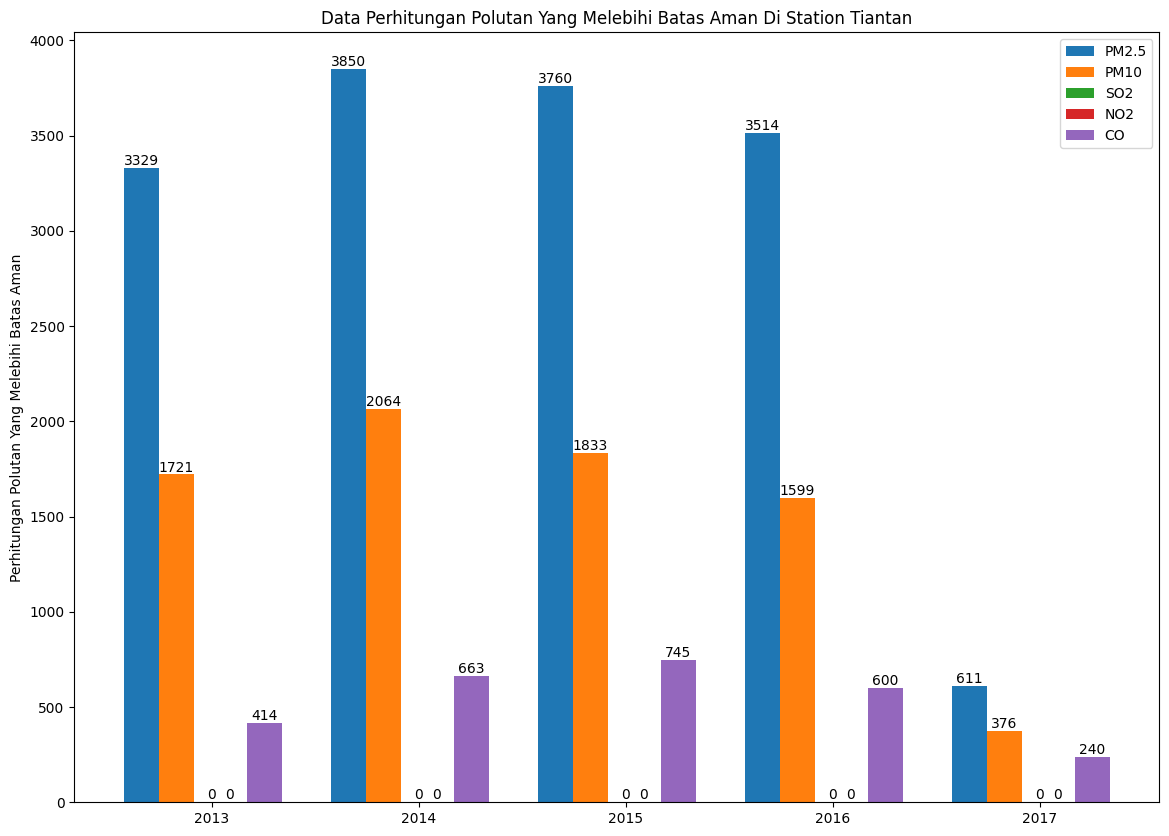

Terlihat pada Grouped Bar Chart diatas bahwa partikel udara yang paling sering mempengaruhi di station Tiantan adalah partikel PM2.5.
Yaitu: 
- Pada tahun 2013 sebanyak 3329 kali melebihi ambang batas
- Pada tahun 2014 sebanyak 3850 kali melebihi ambang batas
- Pada tahun 2015 sebanyak 3760 kali melebihi ambang batas
- Pada tahun 2016 sebanyak 3514 kali melebihi ambang batas
- Pada tahun 2017 sebanyak 611 kali melebihi ambang batas


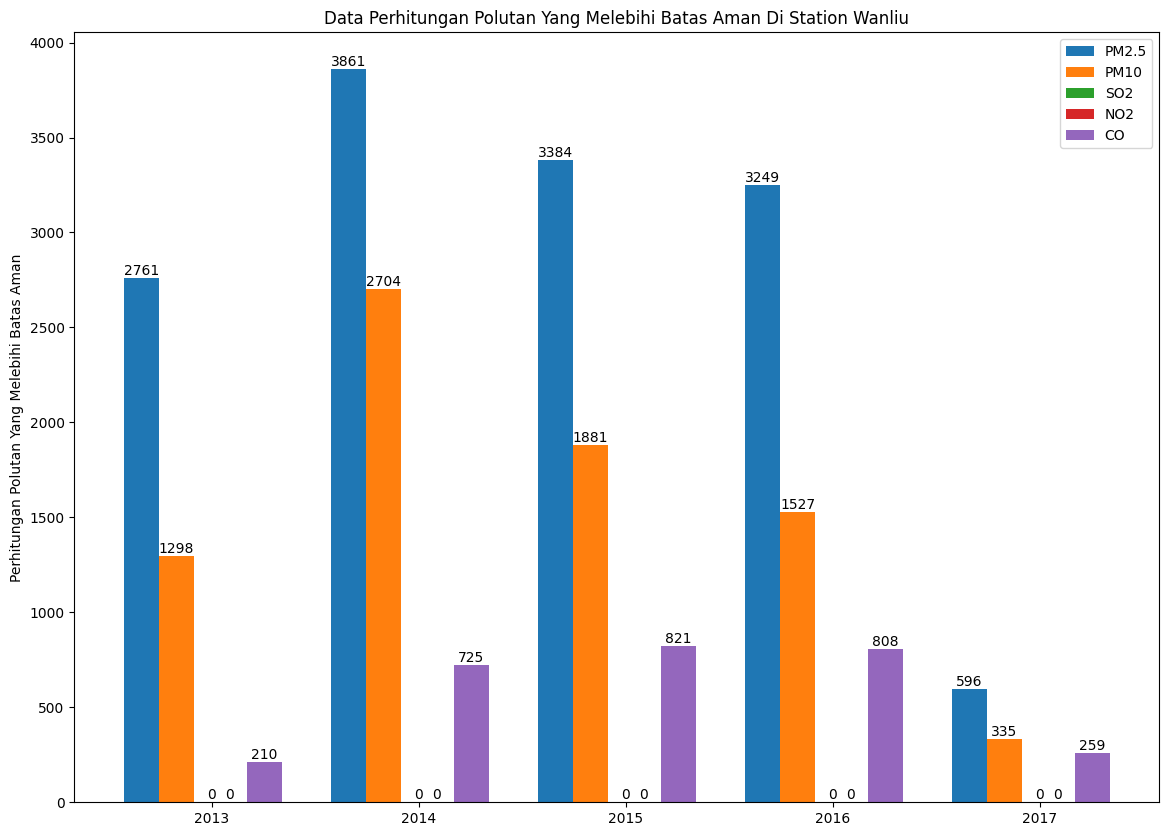

Terlihat pada Grouped Bar Chart diatas bahwa partikel udara yang paling sering mempengaruhi di station Wanliu adalah partikel PM2.5.
Yaitu: 
- Pada tahun 2013 sebanyak 2761 kali melebihi ambang batas
- Pada tahun 2014 sebanyak 3861 kali melebihi ambang batas
- Pada tahun 2015 sebanyak 3384 kali melebihi ambang batas
- Pada tahun 2016 sebanyak 3249 kali melebihi ambang batas
- Pada tahun 2017 sebanyak 596 kali melebihi ambang batas


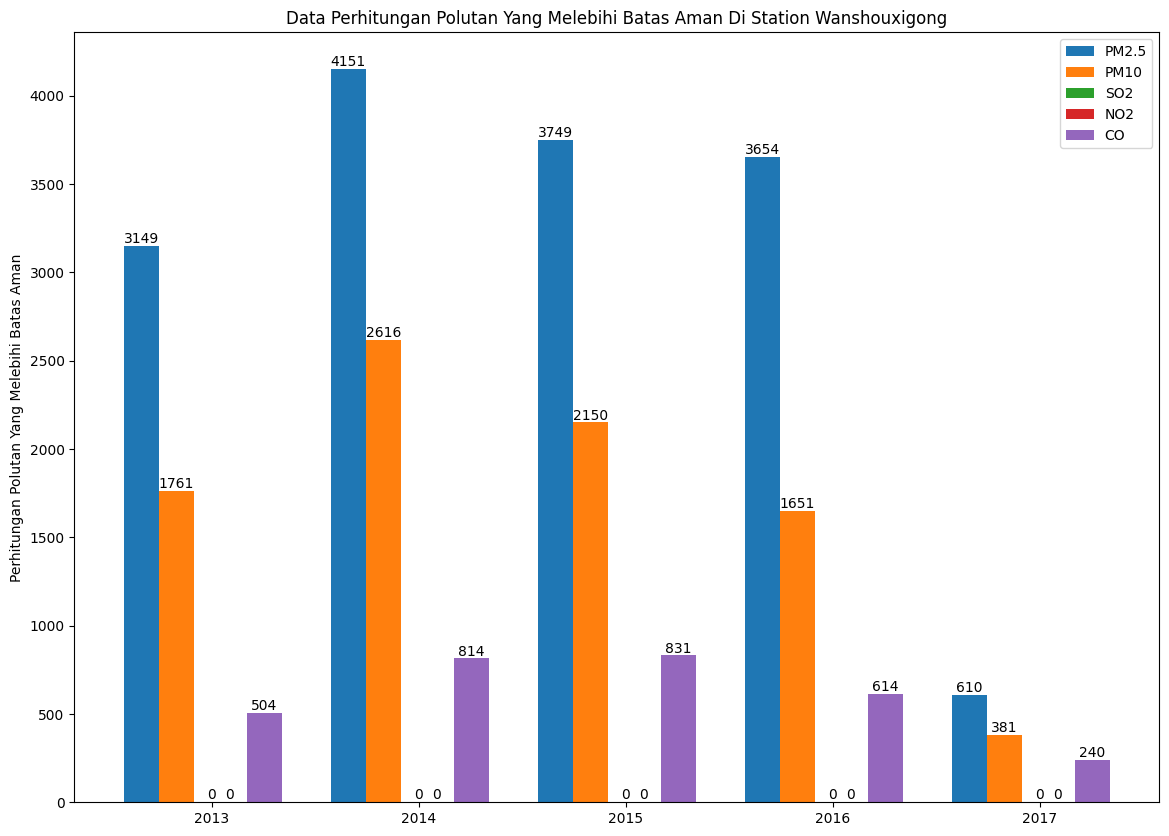

Terlihat pada Grouped Bar Chart diatas bahwa partikel udara yang paling sering mempengaruhi di station Wanshouxigong adalah partikel PM2.5.
Yaitu: 
- Pada tahun 2013 sebanyak 3149 kali melebihi ambang batas
- Pada tahun 2014 sebanyak 4151 kali melebihi ambang batas
- Pada tahun 2015 sebanyak 3749 kali melebihi ambang batas
- Pada tahun 2016 sebanyak 3654 kali melebihi ambang batas
- Pada tahun 2017 sebanyak 610 kali melebihi ambang batas


In [112]:
stations = dataUdaraBuruk['station'].unique()
polutans = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
tahun = [2013, 2014, 2015, 2016, 2017]
for station in stations:
    getStation = dataUdaraBuruk[dataUdaraBuruk['station'] == station]
    getStation.set_index('year')

    x = np.arange(len(tahun))
    w = 0.17
    plt.subplots(figsize=(14,10))
    barplotPM25 = plt.bar(x-w*2, getStation['PM2.5'], w, label="PM2.5")
    barplotPM10 = plt.bar(x-w, getStation['PM10'], w, label="PM10")
    barplotSO2 = plt.bar(x, getStation['SO2'], w, label="SO2")
    barplotNO2 = plt.bar(x+w*0.5, getStation['NO2'], w, label="NO2")
    barplotCO = plt.bar(x+w*1.5, getStation['CO'], w, label="CO")

    plt.bar_label(barplotPM25, labels=getStation['PM2.5'].astype(int))
    plt.bar_label(barplotPM10, labels=getStation['PM10'].astype(int))
    plt.bar_label(barplotSO2, labels=getStation['SO2'].astype(int))
    plt.bar_label(barplotNO2, labels=getStation['NO2'].astype(int))
    plt.bar_label(barplotCO, labels=getStation['CO'].astype(int))

    plt.title(f'Data Perhitungan Polutan Yang Melebihi Batas Aman Di Station {station}')
    plt.ylabel('Perhitungan Polutan Yang Melebihi Batas Aman')
    plt.legend()
    plt.xticks(x, tahun)
    plt.show()
    
    print(f'Terlihat pada Grouped Bar Chart diatas bahwa partikel udara yang paling sering mempengaruhi di station {station} adalah partikel PM2.5.')
    print('Yaitu: ')
    for i in range(len(tahun)):
        print(f'- Pada tahun {tahun[i]} sebanyak {getStation["PM2.5"].reset_index()["PM2.5"][i]} kali melebihi ambang batas')

### Pertanyaan 5:

##### Menampilkan perbandingan banyaknya kualitas udara yang buruk berdasarkan arah anginnya

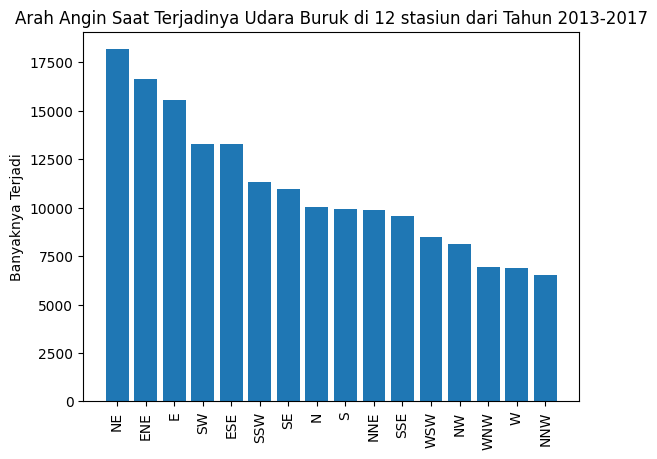

In [92]:
plt.bar(
    sortArahAngin.keys(),
    sortArahAngin.values()
)

plt.xticks(rotation=90)
plt.ylabel("Banyaknya Terjadi")
plt.title("Arah Angin Saat Terjadinya Udara Buruk di 12 stasiun dari Tahun 2013-2017")
plt.show()

## Conclusion

- <b>Bagaimana pengaruh hujan terhadap kualitas udara? apa pengaruh nya? Jika partikel polutan mengalami penurunan partikel mana yang mengalami penurunan secara signifikan pada saat hujan ? </b><br>
  Tentu, dari hasil analisis bahwa hujan berpengaruh terhadap kualitas udara. Dimana seperti yang ditunjukan pada diagram station Nongzhanguan (station sering turun hujan) semakin sering hujan maka dapat menurunkan kadar/tingkat polutan dengan cukup sangat baik untuk mengurai partikel <i>PM2.5, PM10, SO2, dan NO2</i> tanpa adanya kenaikan kadar/tingkat polutan di tahun-tahun tertentu. Namun, semakin jarang adanya hujan maka ada kemungkinan besar kadar polutan meningkat. Ditunjukan pada diagram station shunyi (station yang jarang hujan) terlihat bahwa ditahun tertentu partikel polutan seperti <i>PM2.5, NO2, CO, dan O3</i> meningkat, tetapi partikel <i>PM10 dan SO2</i> setiap tahunnya selalu ada penurunan pada saat hujan.   <br><br>
  Artinya dari hal tersebut sudah cukup membuktikan bahwa hujan mampu untuk mengurai/membersihkan kadar/tingkat polutan terutama partikel <i>PM10 dan SO2</i>. Mungkin terdapat alasan untuk beberapa kondisi mengapa hujan dapat menyebabkan meningkatnya beberapa partikel polutan di udara. Jadi, agar lebih efektif dalam penurunan tingkat polutan alangkah baiknya station selalu menjaga kebersihan udara terutama pada saat hujan dan lebih baik lagi jika pihak station bekerjasama dengan pemerintah setempat untuk mengedukasi masyarakat sekitar station untuk turut membantu menjaga kebersihan udara.

- <b>Mengapa 5 Station itu mendapatkan Kualitas udara Terburuk pada Tahun 2016? </b><br>
    Dikarenakan Partikel PM2.5 dan PM10 serta Senyawa SO2, NO2, CO, O3 selalu naik melebihi batas normal sampai 65 µgram/m^3 dan 150 µgram/m^3 bagi PM2.5 dan PM10. Penyebab dari Partikel udara dan Senyawa tersebut meningkat yaitu udara panas, kebakaran dan polusi lingkungan. Jadi alangkah baiknya untuk menjaga lingkungan station tetap bersih, menanam lebih banyak tanaman dan vegetasi di sekitar area station untuk membantu menyaring udara dan menyerap polutan, mengurangi penggunaan kendaraan di area station, serta mengedukasi masyarakat untuk menggunakan kendaraan ramah lingkungan seperti sepeda atau minimal menghimbau kepada calon penumpang untuk menggunakan kendaraan umum ketika datang station sehingga kedua Partikel udara dan Senyawa tersebut tidak meningkat sampai melebihi batas normalnya.

- <b> Apakah di Station Tiantan Temp mempengaruhi kualitas udara? </b><br>
  Bahwa Temp tidak terlalu mempengaruhi partikel PM2.5 dan PM10 pada tahun 2015 dan 2016. Tetapi, jika dilihat dari visualisasi diatas menunjukan bahwa pada suhu dingin tingkat polutan mengalami lebih banyak peningkatan yang melebihi ambang batas terutama partikel <i>CO</i>. Namun, khusus partikel <i>O3</i> pada suhu tinggi justru mengalami peningkatan yang jauh lebih tinggi dibandingkan suhu rendah. Pada musim dingin, polusi udara dapat menjadi masalah karena dapat menyebabkan penumpukan partikel polutan di udara. Oleh karena itu, melakukan pembersihan dan perawatan berkala pada peralatan di sekitar stasiun kereta untuk mengurangi debu dan partikel lain yang dapat menyebabkan polusi udara serta untuk pihak station agar menghimbau calon penumpangnya khususnya pada musim dingin agar tidak membawa kendaraan pribadi ke area station (untuk kondisi tertentu seperti kepadatan station) atau pihak station membatasi jumlah kendaraan pribadi calon penumpang.

- <b>Partikel apa yang paling sering mempengaruhi kualitas udara menjadi buruk di setiap station pertahunya?</b><br>
    Dilihat dari grouped bar chart di atas partikel yang paling sering mempengaruhi kualitas udara menjadi buruk di setiap statio ialah <b>Partikel <i>PM2.5</i></b>. Hal tersebut dapat dikuatkan dengan chart pada bagian partikel PM2.5 yang selalu lebih tinggi di setiap tahunya diantara chart yang lain. Selain partikel <i>PM2.5</i>, terlihat bahwa partikel <i>PM10</i> yang selalu tinggi walaupun tidak setinggi <i>PM2.5</i>.<br><br>
    Kemudian untuk partikel <i>SO2</i> dan <i>NO2</i> jarang sekali bahkan mungkin sama sekali tidak berpengaruh terhadap qualitas udara menjadi buruk terkecuali pada station <b>Gucheng</b> pada bagian partikel <i>SO2</i> di tahun <b>2016</b> hanya pernah satu kali melebihi ambang batas kualitas udara.

- <b>Arah angin yang paling sering mempengaruhi kualitas udara di semua stasiun</b>
  <p>Dilihat dari bar chart di atas terlihat bahwa ketika arah angin mengarah di antara <b>Timur</b> hingga <b>Utara</b> kualitas udara sering menurun.
  Maka dari itu ketika arah angin terasa mengarah ke sana di himbau untuk semua stasiun untuk bersiap untuk melakukan pencegahan menurunnya kualitas udara di stasiun